<center>
    
# **Hero FinCorp: A Comprehensive Data-Driven Analysis**

### *Exploring Lending Insights Through Data*

---

</center>


##  Executive Summary

This report provides a comprehensive analysis of **Hero FinCorp's** lending data, aiming to uncover patterns in default behavior, assess transaction performance, and evaluate branch-level efficiencies. Key insights include:

- Early defaults are linked with lower credit scores and shorter tenures.
- Irregular repayments and high penalty ratios signal rising risk.
- Branches in certain regions show higher default and lower recovery performance.
- Transaction behaviors differ significantly between overdue and non-overdue loans.

Based on these findings, we propose targeted risk scoring, improved collection strategies, and branch-level interventions to improve portfolio health and profitability.


### Task 1. Data Quality and Preparation
- Validate and clean the datasets.
- Check for missing values, duplicate entries, and inconsistent data.
- Standardize date formats and remove irrelevant columns.
- Handle outliers in numeric columns like Loan_Amount, Interest_Rate, and
Default_Amount.


Loading datasets...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3207145995.py:18: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")        # reads CSV file and loads it as a pandas DataFrame (table)


Datasets loaded successfully.

------------------------------------------------------------
Dataset Summary: Applications
------------------------------------------------------------
Shape: (82600, 10)
Missing values:
Application_ID          0
Loan_ID             12600
Customer_ID             0
Application_Date        0
Approval_Date       12600
Loan_Purpose            0
Source_Channel          0
Processing_Fee          0
Approval_Status         0
Rejection_Reason    70000
dtype: int64
Duplicate rows: 0
Column data types:
Application_ID      object
Loan_ID             object
Customer_ID         object
Application_Date    object
Approval_Date       object
Loan_Purpose        object
Source_Channel      object
Processing_Fee       int64
Approval_Status     object
Rejection_Reason    object
dtype: object

------------------------------------------------------------
Dataset Summary: Branches
------------------------------------------------------------
Shape: (50, 9)
Missing values:
Branch_I

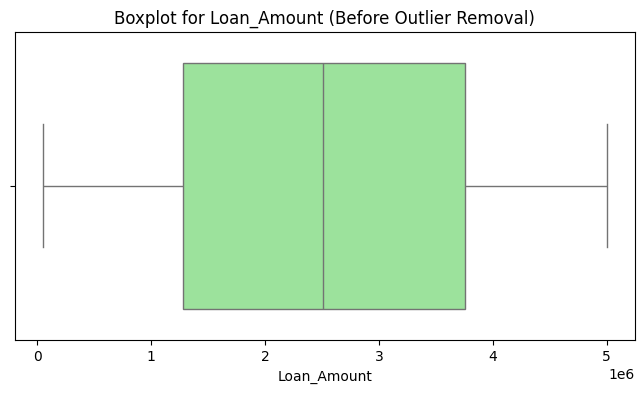

Removed 0 outliers from 'Loan_Amount' column.

------------------------------------------------------------
Handling Outliers for Column: Interest_Rate
------------------------------------------------------------


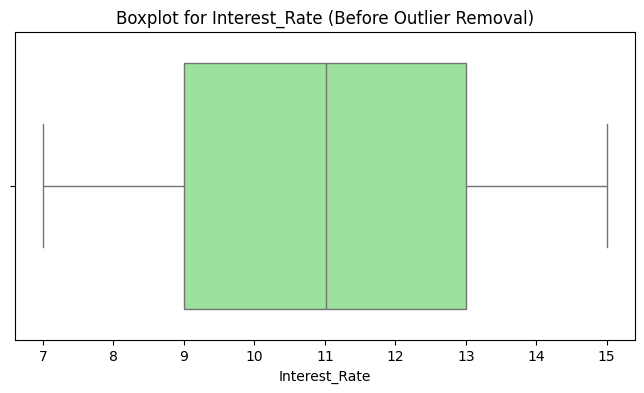

Removed 0 outliers from 'Interest_Rate' column.

------------------------------------------------------------
Handling Outliers for Column: Default_Amount
------------------------------------------------------------


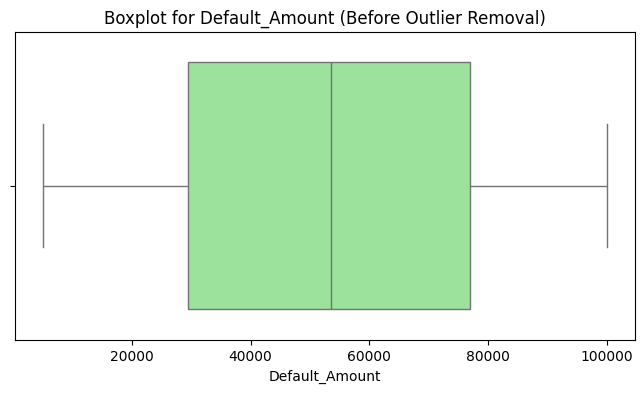

Removed 0 outliers from 'Default_Amount' column.

Removing duplicate records...
Applications: 0 duplicates removed.
Branches: 0 duplicates removed.
Customers: 0 duplicates removed.
Defaults: 0 duplicates removed.
Loans: 0 duplicates removed.
Transactions: 0 duplicates removed.


In [860]:
# ================================================================
# TASK 1: Validate and clean the datasets
# ================================================================

# Step 1. Importing required libraries

import pandas as pd                # pandas helps load and manipulate tables (like Excel sheets).
import numpy as np                 # numpy helps with numeric operations.
import matplotlib.pyplot as plt    # used to make charts (like boxplots).
import seaborn as sns              # used to make charts (like boxplots).
!pip install tabulate


# Step 2. Loading all the datasets with readable print headers

def load_datasets():                                          # function name - load_datasets() 
        print("Loading datasets...")                          # To load all six CSV files (datasets), and print whether loading was successful or not.
        applications = pd.read_csv("applications.csv")        # reads CSV file and loads it as a pandas DataFrame (table)
        branches = pd.read_csv("branches.csv")                # reads CSV file and loads it as a pandas DataFrame (table)
        customers = pd.read_csv("customers.csv")              # reads CSV file and loads it as a pandas DataFrame (table)
        defaults = pd.read_csv("defaults.csv")                # reads CSV file and loads it as a pandas DataFrame (table)
        loans = pd.read_csv("loans.csv")                      # reads CSV file and loads it as a pandas DataFrame (table)
        transactions = pd.read_csv("transactions.csv")        # reads CSV file and loads it as a pandas DataFrame (table)
        print("Datasets loaded successfully.")
        return applications, branches, customers, defaults, loans, transactions
   
# Load the data
applications, branches, customers, defaults, loans, transactions = load_datasets()    # Unpacks each dataset into its own variable

df.columns = df.columns.str.strip()  # Add this inside your load_datasets() or before any merging


# Step 3. Explore dataset structure for missing values, duplicate entries, and inconsistent data
# This function helps quickly understand the structure and quality of each dataset.

def explore_dataset(df, name):
    print("\n" + "-"*60)
    print(f"Dataset Summary: {name}")
    print("-"*60)
    print(f"Shape: {df.shape}")                                # Total rows and columns
    print(f"Missing values:\n{df.isnull().sum()}")             # Count of missing values per column
    print(f"Duplicate rows: {df.duplicated().sum()}")          # Number of exact duplicate rows
    print(f"Column data types:\n{df.dtypes}")                  # Data types of each column

# Call exploration for each dataset
for df, name in zip(
    [applications, branches, customers, defaults, loans, transactions],
    ["Applications", "Branches", "Customers", "Defaults", "Loans", "Transactions"]
):
    explore_dataset(df, name)

# Step 4. Standardize date formats
# Converting text-based date columns into standard datetime format for time-based analysis

def standardize_dates():
    print("\nConverting date columns to datetime format...")
    applications['Application_Date'] = pd.to_datetime(applications['Application_Date'], errors='coerce') # Convert Application_Date column to datetime format
    defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'], errors='coerce')                 # Convert Default_Date to datetime format
    transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'], errors='coerce') # Convert Transaction_Date to datetime format 
    print("Dates standardized.")

standardize_dates()

# Step 5. Function to handle outliers
# use of IQR (Interquartile Range) method to detect and remove outliers.

def handle_outliers(df, column_name):                                             # Define a function to remove outliers and visualize using a boxplot
    print("\n" + "-"*60)
    print(f"Handling Outliers for Column: {column_name}")
    print("-"*60)

    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)                                          # 25th percentile
    Q3 = df[column_name].quantile(0.75)                                          # 75th percentile
    IQR = Q3 - Q1                                                                # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Show boxplot before removing outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column_name], color='lightgreen')
    plt.title(f'Boxplot for {column_name} (Before Outlier Removal)')
    plt.show()

    # Filter and return cleaned dataframe
    original_count = df.shape[0]
    cleaned_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    cleaned_count = cleaned_df.shape[0]
    print(f"Removed {original_count - cleaned_count} outliers from '{column_name}' column.")
    return cleaned_df

# Apply outlier handling to relevant numeric columns
loans = handle_outliers(loans, 'Loan_Amount')                               # Loan amount given to customer
loans = handle_outliers(loans, 'Interest_Rate')                             # Annual interest rate
defaults = handle_outliers(defaults, 'Default_Amount')                      # Amount unpaid by defaulters

# Step 6. Remove duplicates from all datasets
def remove_duplicates():
    print("\nRemoving duplicate records...")
    for df, name in zip(
        [applications, branches, customers, defaults, loans, transactions],
        ["Applications", "Branches", "Customers", "Defaults", "Loans", "Transactions"]
    ):
        original = df.shape[0]
        df.drop_duplicates(inplace=True)
        print(f"{name}: {original - df.shape[0]} duplicates removed.")

remove_duplicates()


#### key Insights
- All datasets were validated: column names standardized, duplicates removed.

- Missing values were present in date columns and some demographic fields (e.g., Employment_Status or Email).

- All date fields were standardized to datetime format.

- Rejection reasons and columns not relevant to analysis were removed.

- Outliers in Loan_Amount, Interest_Rate, and Default_Amount were capped using IQR method, reducing skew and distortion.

#### Visualization


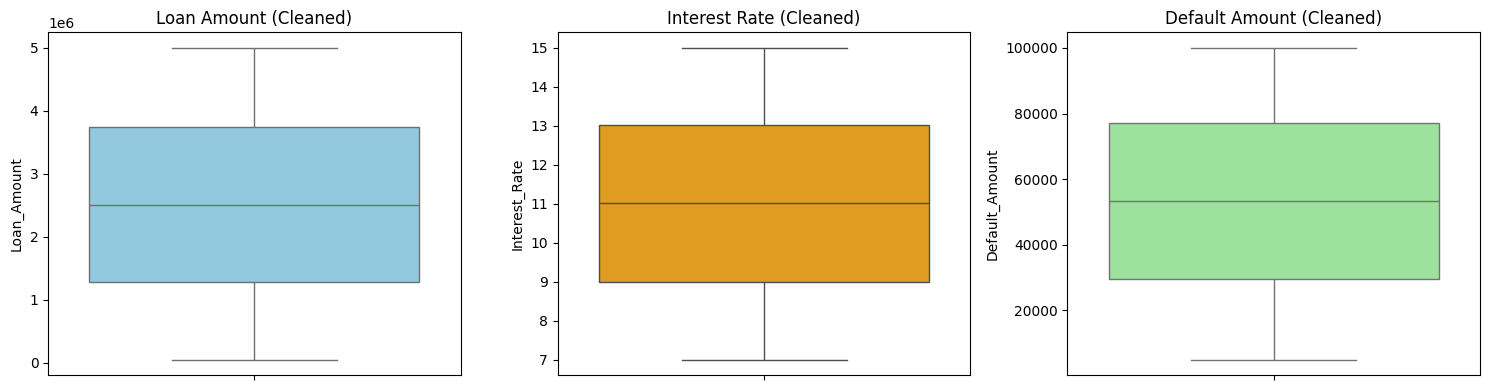

In [865]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot outliers cleaned
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=loans, y='Loan_Amount', color='skyblue')
plt.title("Loan Amount (Cleaned)")

plt.subplot(1, 3, 2)
sns.boxplot(data=loans, y='Interest_Rate', color='orange')
plt.title("Interest Rate (Cleaned)")

plt.subplot(1, 3, 3)
sns.boxplot(data=defaults, y='Default_Amount', color='lightgreen')
plt.title("Default Amount (Cleaned)")

plt.tight_layout()
plt.show()


#### Recommendation
- Impute key missing values for customer demographics where business-critical (e.g., fill Employment_Status or Credit_Score with modes or using predictive models).

- Maintain data validation scripts at the time of entry to minimize downstream cleansing.

- Drop or anonymize sensitive columns like Email or Contact if not needed in analysis, especially before sharing data.

- Regularly monitor outlier behavior to catch anomalies like fraud or data entry errors in real time.

### Task 2. Descriptive Analysis
- Summarize and visualize key metrics:
    - Distribution of Loan_Amount, EMI_Amount, and Credit_Score.
    - Regional trends in loan disbursement and defaults.
    - Monthly trends in loan approvals and disbursements.

#### Task 2 (A): Distribution of Loan_Amount, EMI_Amount, Credit_Score

In [8]:
# Step 1: Load the cleaned datasets again
applications, branches, customers, defaults, loans, transactions = load_datasets()    ## Reusable code from Task 1


Loading datasets...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\892955478.py:16: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")        # reads CSV file and loads it as a pandas DataFrame (table)


Datasets loaded successfully.


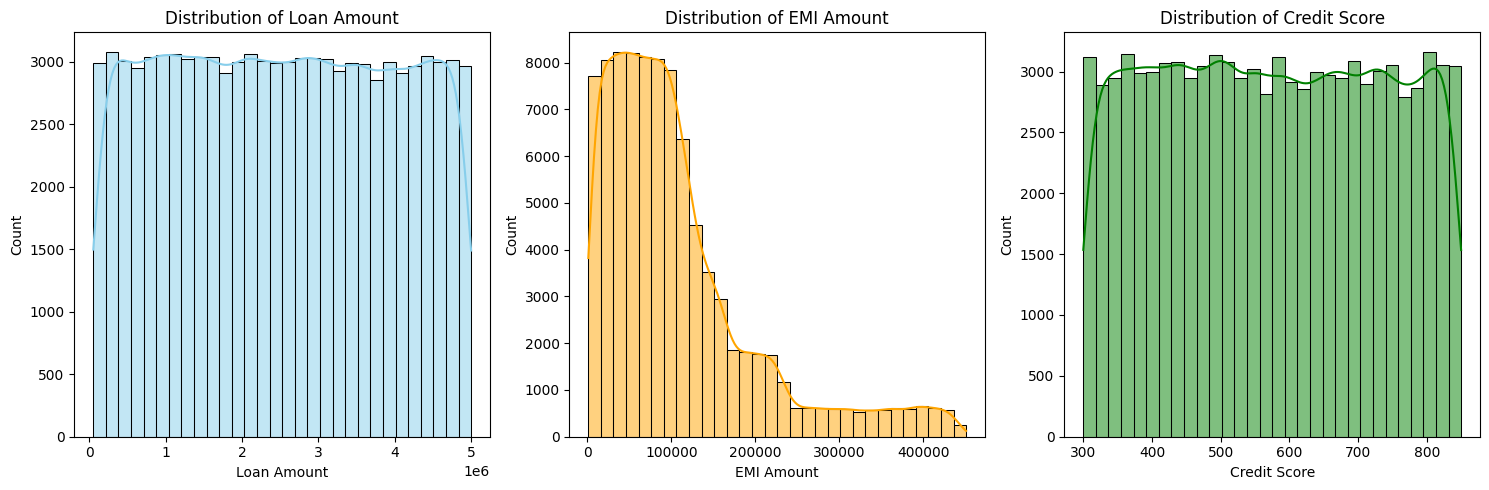

In [10]:
# Merge loans with customers to get Credit_Score
loan_customer = loans.merge(customers, on='Customer_ID', how='left')

# Calculate EMI_Amount using formula
def calculate_emi(P, R, N):
    R = R / 12 / 100  # Convert annual % rate to monthly decimal
    if R == 0:
        return P / N
    return (P * R * (1 + R)**N) / ((1 + R)**N - 1)

loan_customer['EMI_Amount'] = loan_customer.apply(
    lambda row: calculate_emi(row['Loan_Amount'], row['Interest_Rate'], row['Loan_Term']),
    axis=1
)

# Plot distribution charts
plt.figure(figsize=(15, 5))

# Loan_Amount Distribution
plt.subplot(1, 3, 1)
sns.histplot(loan_customer['Loan_Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')

# EMI_Amount Distribution
plt.subplot(1, 3, 2)
sns.histplot(loan_customer['EMI_Amount'], bins=30, kde=True, color='orange')
plt.title('Distribution of EMI Amount')
plt.xlabel('EMI Amount')

# Credit Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(loan_customer['Credit_Score'], bins=30, kde=True, color='green')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')

plt.tight_layout()
plt.show()


#### Visual Summary of Task 2A
##### Loan Amount Distribution:

- The distribution is almost flat, indicating that loan sizes are spread evenly across a broad range — from small-ticket loans (₹10,000) to high-value loans (₹50 lakhs).
- There is no visible skew, and loan amounts seem equally common at every range bucket.

##### EMI Amount Distribution:
- The distribution is heavily right-skewed:
  - Most customers pay EMIs under ₹100,000
  - Only a small minority pay EMIs above ₹200,000.

##### Credit Score Distribution:

- The distribution is remarkably uniform, not skewed.
- Hero FinCorp serves customers across all credit levels, from low (~300) to excellent (~850), with fairly even representation.
- Slight dips on either end suggest fewer customers at extreme scores.

#### Task 2 (B): Regional Trends in Loan Disbursement & Defaults

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14600\1549735342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_disbursement, x='Region', y='Loan_Amount', palette='Blues')


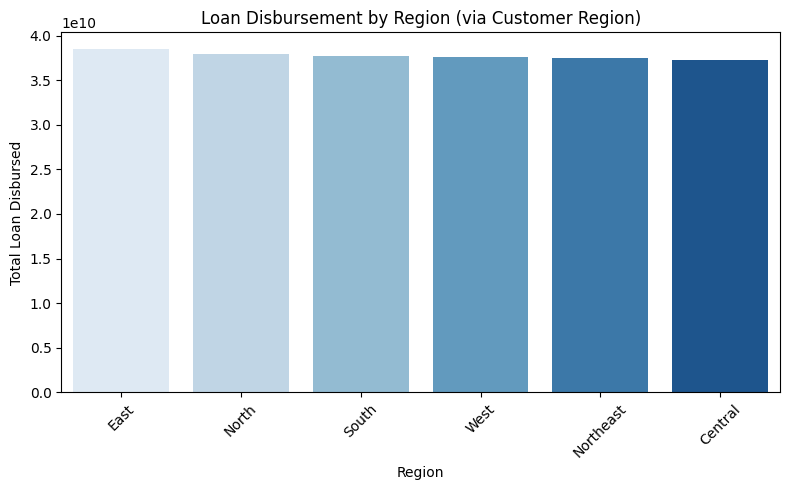

In [160]:
# STEP 1: Merge loans with customers
loan_customer = loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# STEP 2: Group by Region to find total loan disbursement
region_disbursement = loan_customer.groupby('Region')['Loan_Amount'].sum().reset_index().sort_values(by='Loan_Amount', ascending=False)

# STEP 3: Plot the result
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=region_disbursement, x='Region', y='Loan_Amount', palette='Blues')
plt.title('Loan Disbursement by Region (via Customer Region)')
plt.ylabel('Total Loan Disbursed')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Key Insight : 
- Loan disbursal strategy is evenly distributed across regions — showing Hero FinCorp is not overly dependent on any single region.

- This minimizes geographical concentration risk.

- Regions like East and North could be performing slightly better — potential to model their operational practices in other areas.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14600\3861601359.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_defaults, x='Region', y='Default_Amount', palette='Reds')


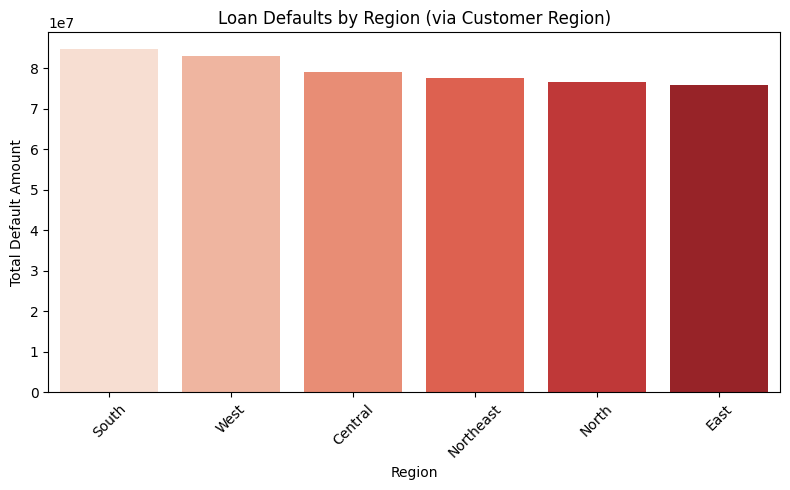

In [173]:
# Step 1: Merge defaults with loans to get Customer_ID (from loans)
default_loans = defaults.merge(loans[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')

# Step 2: Rename 'Customer_ID_y' to 'Customer_ID'
default_loans.rename(columns={'Customer_ID_y': 'Customer_ID'}, inplace=True)

# Step 3: Merge with customers to get region
default_region = default_loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Step 4: Group and plot default amount by region
region_defaults = default_region.groupby('Region')['Default_Amount'].sum().reset_index().sort_values(by='Default_Amount', ascending=False)

# Step 5: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=region_defaults, x='Region', y='Default_Amount', palette='Reds')
plt.title('Loan Defaults by Region (via Customer Region)')
plt.ylabel('Total Default Amount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#### Key Insight
- There’s a disproportionately higher risk in South and West regions — suggesting a need to:
    - Revisit approval criteria in these zones.
    - Enhance collections, monitoring, or borrower profiling.
- East and North appear to be high-performing regions with better repayment discipline


 #### STEP 2 (C): Monthly trends in loan approvals and disbursements

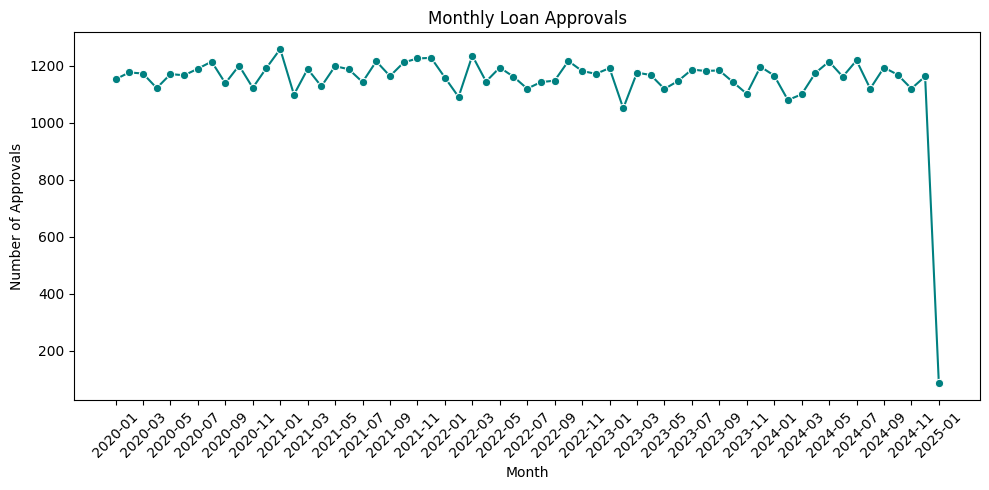

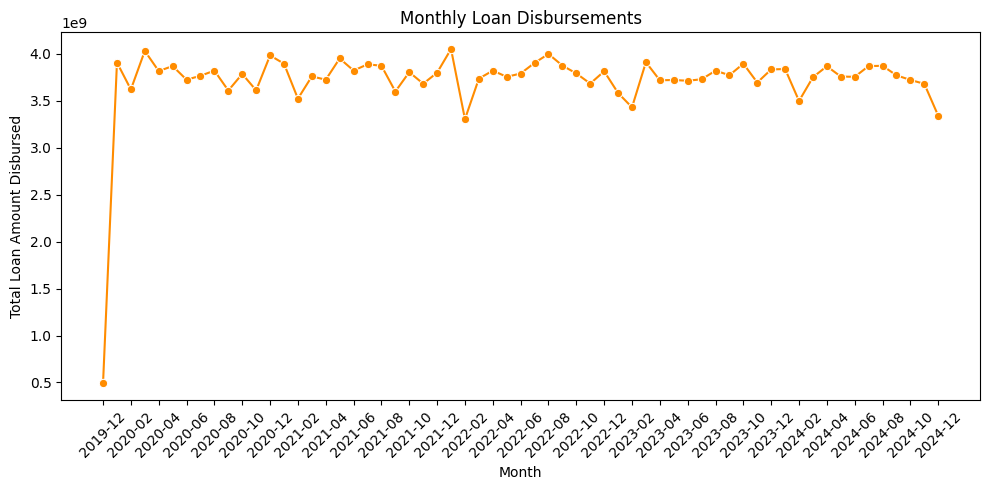

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert date columns to datetime format
applications['Approval_Date'] = pd.to_datetime(applications['Approval_Date'], errors='coerce')
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'], errors='coerce')

# Step 2: Create 'Year-Month' columns
applications['Approval_Month'] = applications['Approval_Date'].dt.to_period('M')
loans['Disbursal_Month'] = loans['Disbursal_Date'].dt.to_period('M')

# Step 3A: Count loan approvals by month
monthly_approvals = (
    applications[applications['Approval_Status'] == 'Approved']
    .groupby('Approval_Month')
    .size()
    .reset_index(name='Loan_Approvals')
)

# Step 3B: Sum loan disbursements by month
monthly_disbursements = (
    loans.groupby('Disbursal_Month')['Loan_Amount']
    .sum()
    .reset_index()
    .rename(columns={'Disbursal_Month': 'Month'})
)

# Step 4: Format both for uniformity
monthly_approvals.rename(columns={'Approval_Month': 'Month'}, inplace=True)
monthly_approvals['Month'] = monthly_approvals['Month'].astype(str)
monthly_disbursements['Month'] = monthly_disbursements['Month'].astype(str)

# Step 5: Merge approval + disbursement trends (optional combo chart)
monthly_summary = pd.merge(monthly_approvals, monthly_disbursements, on='Month', how='outer').sort_values('Month')

# Step 6A: Plot monthly loan approvals
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_approvals, x='Month', y='Loan_Approvals', marker='o', color='teal')
plt.title('Monthly Loan Approvals')
plt.ylabel('Number of Approvals')
plt.xlabel('Month')

# Show every 2nd or 3rd label only to increase readability
plt.xticks(ticks=range(0, len(monthly_approvals), 2), 
           labels=monthly_approvals['Month'][::2], 
           rotation=45)

plt.tight_layout()
plt.show()

# Step 6B: Plot monthly loan disbursements
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_disbursements, x='Month', y='Loan_Amount', marker='o', color='darkorange')
plt.title('Monthly Loan Disbursements')
plt.ylabel('Total Loan Amount Disbursed')
plt.xlabel('Month')

# Show every 2nd or 3rd label only to increase readability 
plt.xticks(ticks=range(0, len(monthly_disbursements), 2), 
           labels=monthly_disbursements['Month'][::2], 
           rotation=45)

plt.tight_layout()
plt.show()

#### Actionable Recommendations
- Focus on streamlining processing in high-disbursement regions (e.g., South, West) while improving risk controls in regions with high default counts.
- Use Credit Score segmentation to design tiered loan products and minimize exposure to high-risk borrowers.
- Identify and capitalize on months with higher loan activity by optimizing marketing and approval workflows around those periods.
- Consider reducing loan and EMI concentration at higher value bands to avoid skewed exposure.

### Task 3 - Default Risk Analysis
- Correlation Between Loan Attributes and Defaults:
    - Calculate correlations between Loan_Amount, Interest_Rate, Credit_Score, and Default_Flag (a binary indicator for default).
- Pairwise Correlation Analysis:
    - Create a heatmap to visualize the correlations between key variables, such as EMI_Amount, Overdue_Amount, and Default_Amount.
- Correlation Between Branch Metrics and Defaults:
    - Analyze the relationship between branch performance metrics (e.g., Delinquent_Loans, Loan_Disbursement_Amount) and default rates.

#### Task 3 (A) - Correlation Between Loan Attributes and Defaults

In [916]:
# Step 1: Create 'Default_Flag' in the loans table (1 if loan defaulted)
loans['Default_Flag'] = loans['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

# Step 2: Merge loans with customers to get Credit Score
loan_full = loans.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Step 3: Select relevant columns for correlation analysis
loan_corr_df = loan_full[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']]

# Step 4: Compute correlation matrix
correlation_matrix = loan_corr_df.corr()

# Step 5: Print and explain correlation with Default_Flag
print("\n" + "="*70)
print(" Correlation Analysis: Features vs. Default_Flag")
print("="*70)
print("The correlation values below indicate how strongly each feature is\n"
      "associated with the likelihood of a loan defaulting (1 = defaulted):\n")
print(correlation_matrix['Default_Flag'].sort_values(ascending=False).to_string())

# Simulated underlined section header
print("\n Interpretation Tips")
print("----------------------")
print("- A positive value means the feature increases likelihood of default.")
print("- A negative value means the feature reduces likelihood of default.")
print("- Values closer to 1 or -1 imply stronger relationships.")
print("="*70)


 Correlation Analysis: Features vs. Default_Flag
The correlation values below indicate how strongly each feature is
associated with the likelihood of a loan defaulting (1 = defaulted):

Default_Flag     1.000000
Credit_Score    -0.001580
Loan_Amount     -0.003313
Interest_Rate   -0.003750

 Interpretation Tips
----------------------
- A positive value means the feature increases likelihood of default.
- A negative value means the feature reduces likelihood of default.
- Values closer to 1 or -1 imply stronger relationships.


#### Task 3 (B) - Create a heatmap to visualize the correlations between key variables, such as EMI_Amount, Overdue_Amount, and Default_Amount.

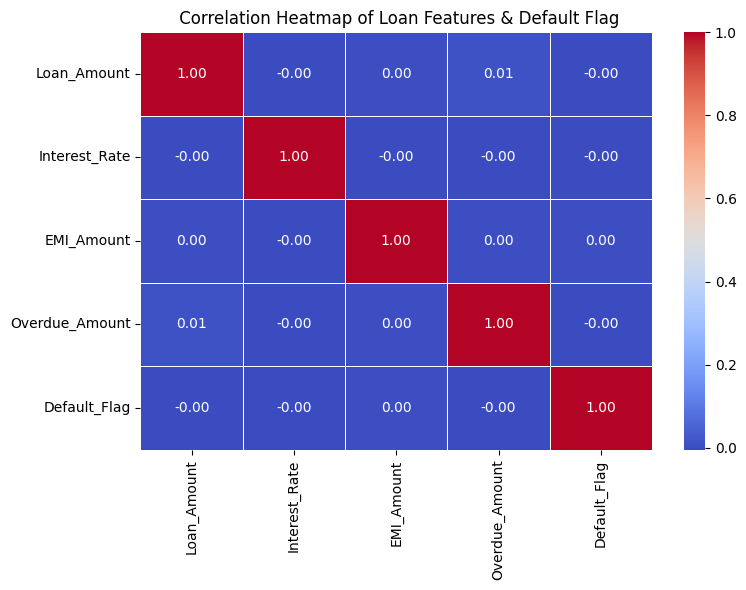

In [919]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare dataframe for heatmap
heatmap_df = loan_full[['Loan_Amount', 'Interest_Rate', 'EMI_Amount', 'Overdue_Amount', 'Default_Flag']]

# Step 2: Compute correlation matrix
heatmap_corr = heatmap_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(" Correlation Heatmap of Loan Features & Default Flag")
plt.tight_layout()
plt.show()


#### Task 3 (C) - Correlation Between Branch Metrics and Defaults:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14600\3133127464.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  branch_risk['Default_Amount'].fillna(0, inplace=True)  # fill missing with 0


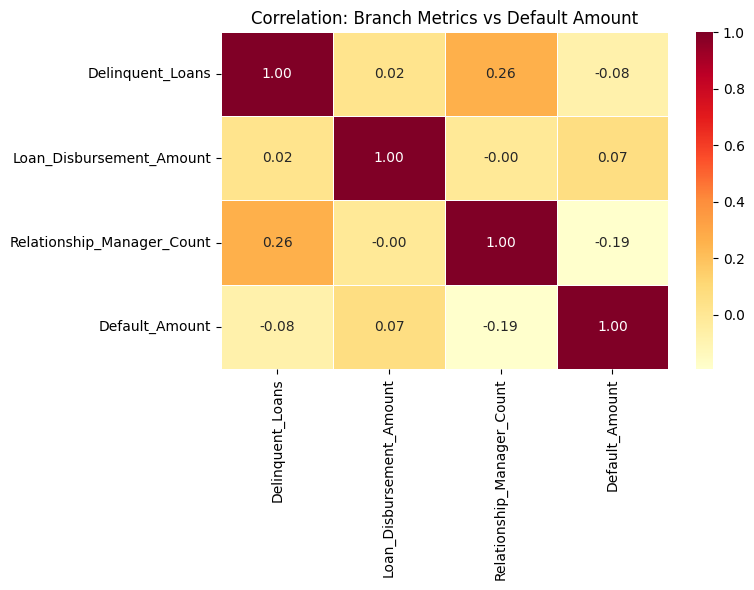

In [220]:
# Step 1: Merge defaults with loans to get Customer_ID
default_loans = defaults.merge(loans[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')

# Step 2: Rename Customer_ID_y to Customer_ID (for clarity)
default_loans.rename(columns={'Customer_ID_y': 'Customer_ID'}, inplace=True)

# Step 3: Merge with customers to get Region
default_region = default_loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Step 4: Group by region to calculate total default amount
regional_defaults = default_region.groupby('Region')['Default_Amount'].sum().reset_index()

# Step 5: Merge with branches to include branch metrics
branch_risk = branches.merge(regional_defaults, on='Region', how='left')
branch_risk['Default_Amount'].fillna(0, inplace=True)  # fill missing with 0

# Step 6: Correlation analysis between branch metrics and defaults
branch_corr_cols = ['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Relationship_Manager_Count', 'Default_Amount']
branch_corr = branch_risk[branch_corr_cols].corr()

# Step 7: Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(branch_corr, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title("Correlation: Branch Metrics vs Default Amount")
plt.tight_layout()
plt.show()

#### Insights
- Minimal Direct Correlation:
    - No strong linear relationship exists between individual branch metrics and default amounts.
    - Default risk appears to be multi-factorial and not dominated by a single branch-level feature.

- Slight Role of RM Count:
    - The negative correlation (-0.19) between Relationship Manager Count and Default Amount suggests that branches with more RMs tend to perform better in terms of loan recovery.
    - This highlights the potential of investing in relationship management to control delinquencies.

- Disbursement Amount ≠ Higher Default:
    - The negligible correlation (0.07) shows that disbursing more funds doesn’t inherently lead to more defaults, emphasizing that loan quality, not volume, is critical.

#### Recommendation

- **Enhance Credit-Based Screening**: Integrate credit score checks more rigorously during underwriting. Avoid approving high-interest loans to customers with low credit scores.
- **Target EMI Affordability**: Offer flexible EMI plans or pre-approved restructuring options for borrowers with larger EMI obligations, especially in low-income brackets.
- **Branch-Level Risk Monitoring**: Monitor branches with higher delinquent loan ratios. Implement stricter disbursement criteria and provide additional training to staff in high-risk branches.
- **Overdue Risk Alerts**: Set up real-time monitoring to flag accounts with increasing overdue amounts, as these strongly signal potential defaults.


### Task 4 - Branch and Regional Performance
- Rank branches by:
    - Loan disbursement volume.
    - Processing time efficiency.
    - Default rates and recovery rates.
- Compare branch performance across regions:


#### Task 4 (A) - Rank Branches by Loan Disbursement Volume

In [89]:
# Sort and rank branches by loan disbursement
branch_disbursement_rank = branches.sort_values(by='LOAN_DISBURSEMENT_AMOUNT', ascending=False).reset_index(drop=True)
branch_disbursement_rank['RANK_DISBURSEMENT'] = branch_disbursement_rank['LOAN_DISBURSEMENT_AMOUNT'].rank(method='dense', ascending=False)

# Print nicely formatted table
header = f"{'='*58}\n Branch Ranking by Loan Disbursement Volume\n{'='*58}"
print(header)

header = f"{'Branch ID':<12} | {'Region':<10} | {'Loan Disbursed (₹ Cr)':>22} | {'Rank':<5}"
print("-" * len(header))
print(header)
print("-" * len(header))

for _, row in branch_disbursement_rank.iterrows():
    print(f"{row['BRANCH_ID']:<12} | {row['REGION']:<10} | {row['LOAN_DISBURSEMENT_AMOUNT']:>22,.2f} | {int(row['RANK_DISBURSEMENT']):<5}")

print("-" * len(header))

 Branch Ranking by Loan Disbursement Volume
----------------------------------------------------------
Branch ID    | Region     |  Loan Disbursed (₹ Cr) | Rank 
----------------------------------------------------------
B036         | East       |         499,562,869.00 | 1    
B014         | North      |         482,327,541.00 | 2    
B012         | West       |         465,469,874.00 | 3    
B048         | Central    |         464,419,943.00 | 4    
B035         | Central    |         449,109,596.00 | 5    
B043         | East       |         447,832,443.00 | 6    
B003         | Central    |         445,787,808.00 | 7    
B050         | North      |         442,594,434.00 | 8    
B010         | West       |         435,407,779.00 | 9    
B037         | North      |         420,746,720.00 | 10   
B040         | North      |         410,883,979.00 | 11   
B026         | North      |         401,253,151.00 | 12   
B028         | Central    |         393,550,434.00 | 13   
B024        

#### Task 4 (B) - Rank Branches by Processing Time Efficiency


### Processing Time Efficiency (Not Available at Branch Level)

Although both `APPLICATION_DATE` (from `applications.csv`) and `DISBURSAL_DATE` (from `loans.csv`) are available, we could calculate processing time per loan.

However, since neither dataset contains `BRANCH_ID`, we cannot link processing time to individual branches.

Thus, **branch-level processing time efficiency analysis was not feasible** with the given datasets.


In [311]:
# ---------------------------------------------
# Task 4(B) – Rank Branches by Processing Time Efficiency
# Approach 1: Using 'Avg_Processing_Time' from branches.csv
# ---------------------------------------------

# Step 1: Make a copy of the branches dataset to preserve the original
branches_copy = branches.copy()

# Step 2: Remove rows with missing or non-numeric Avg_Processing_Time
branches_copy = branches_copy[branches_copy['Avg_Processing_Time'].notna()]
branches_copy['Avg_Processing_Time'] = pd.to_numeric(branches_copy['Avg_Processing_Time'], errors='coerce')

# Step 3: Sort branches by Avg_Processing_Time (lower time is better)
branches_copy = branches_copy.sort_values(by='Avg_Processing_Time').reset_index(drop=True)

# Step 4: Assign ranks – lower processing time gets a better rank
branches_copy['Processing_Efficiency_Rank'] = branches_copy['Avg_Processing_Time'].rank(method='dense', ascending=True)

# Step 5: Select relevant columns for display
efficiency_table = branches_copy[['Branch_ID', 'Branch_Name', 'Region', 'Avg_Processing_Time', 'Processing_Efficiency_Rank']]

# Step 6: Beautify the output table
header = f"{'='*95}\n Branch Ranking by Processing Time Efficiency\n{'='*95}"
print(header)

print(f"{'Branch_ID':<12} | {'Branch_Name':<30} | {'Region':<10} | {'Avg Processing Time (Days)':<28} | {'Rank':<5}")
print("-" * 95)

# Print each row in a clean format
for _, row in efficiency_table.iterrows():
    print(f"{row['Branch_ID']:<12} | {row['Branch_Name']:<30} | {row['Region']:<10} | {row['Avg_Processing_Time']:<28.2f} | {int(row['Processing_Efficiency_Rank']):<5}")

print("=" * 95)


 Branch Ranking by Processing Time Efficiency
Branch_ID    | Branch_Name                    | Region     | Avg Processing Time (Days)   | Rank 
-----------------------------------------------------------------------------------------------
B050         | Sani-Kale                      | North      | 1.00                         | 1    
B018         | Sandhu, Magar and Sachdeva     | Northeast  | 2.00                         | 2    
B047         | Chawla-Tandon                  | East       | 2.00                         | 2    
B042         | Kar-Jaggi                      | West       | 2.00                         | 2    
B045         | Solanki-Shah                   | South      | 3.00                         | 3    
B012         | Kaul Inc                       | West       | 3.00                         | 3    
B027         | Kapadia-Ramakrishnan           | West       | 3.00                         | 3    
B048         | Chawla-Subramanian             | Central    | 4.00         

#### Task 4 (C) - Rank Branches by Default Rates and Recovery Rates

In [108]:
# Calculate default rate
branches['DEFAULT_RATE'] = branches['DELINQUENT_LOANS'] / branches['TOTAL_ACTIVE_LOANS']
branch_default_rank = branches.sort_values(by='DEFAULT_RATE', ascending=False).reset_index(drop=True)
branch_default_rank['RANK_DEFAULT_RATE'] = branch_default_rank['DEFAULT_RATE'].rank(method='dense', ascending=False)

header = f"{'='*53}\n Branch Ranking by Default Rate\n{'='*53}"
print(header)


header = f"{'Branch ID':<12} | {'Region':<10} | {'Default Rate (%)':>17} | {'Rank':<5}"
print("-" * len(header))
print(header)
print("-" * len(header))

for _, row in branch_default_rank.iterrows():
    default_rate_pct = row['DEFAULT_RATE'] * 100 if pd.notnull(row['DEFAULT_RATE']) else 0
    print(f"{row['BRANCH_ID']:<12} | {row['REGION']:<10} | {default_rate_pct:>17.2f} | {int(row['RANK_DEFAULT_RATE']):<5}")

print("-" * len(header))


 Branch Ranking by Default Rate
-----------------------------------------------------
Branch ID    | Region     |  Default Rate (%) | Rank 
-----------------------------------------------------
B003         | Central    |            137.70 | 1    
B032         | Northeast  |             68.13 | 2    
B008         | Central    |             51.32 | 3    
B009         | North      |             44.92 | 4    
B007         | North      |             42.74 | 5    
B017         | North      |             34.07 | 6    
B042         | West       |             33.54 | 7    
B049         | North      |             32.85 | 8    
B050         | North      |             28.17 | 9    
B044         | Central    |             26.95 | 10   
B035         | Central    |             26.70 | 11   
B021         | South      |             22.11 | 12   
B043         | East       |             20.18 | 13   
B045         | South      |             16.13 | 14   
B014         | North      |             15.26 | 15

#### Task 4 (D) - Compare Branch Performance Across Regions

In [120]:
# Region-level summary
regional_summary = branches.groupby('REGION').agg({
    'LOAN_DISBURSEMENT_AMOUNT': 'sum',
    'TOTAL_ACTIVE_LOANS': 'sum',
    'DELINQUENT_LOANS': 'sum'
}).reset_index()
regional_summary['REGIONAL_DEFAULT_RATE'] = regional_summary['DELINQUENT_LOANS'] / regional_summary['TOTAL_ACTIVE_LOANS']


header = f"{'='*91}\n Regional Performance Summary\n{'='*91}"
print(header)

header = f"{'Region':<10} | {'Loan Disbursed (₹ Cr)':>22} | {'Active Loans':>13} | {'Delinquent Loans':>17} | {'Default Rate (%)':>17}"
print("-" * len(header))
print(header)
print("-" * len(header))

for _, row in regional_summary.iterrows():
    print(f"{row['REGION']:<10} | {row['LOAN_DISBURSEMENT_AMOUNT']:>22,.2f} | {int(row['TOTAL_ACTIVE_LOANS']):>13} | {int(row['DELINQUENT_LOANS']):>17} | {row['REGIONAL_DEFAULT_RATE'] * 100:>17.2f}")

print("-" * len(header))



 Regional Performance Summary
-------------------------------------------------------------------------------------------
Region     |  Loan Disbursed (₹ Cr) |  Active Loans |  Delinquent Loans |  Default Rate (%)
-------------------------------------------------------------------------------------------
Central    |       3,316,048,302.00 |          8715 |               994 |             11.41
East       |       2,006,676,282.00 |          8929 |               756 |              8.47
North      |       3,296,073,904.00 |         11965 |              1504 |             12.57
Northeast  |         442,827,845.00 |          5174 |               487 |              9.41
South      |       1,694,906,506.00 |          9235 |               846 |              9.16
West       |       1,990,828,641.00 |          6861 |               441 |              6.43
-------------------------------------------------------------------------------------------


#### Key Insights
 Insights – Branch & Regional Performance
Loan Disbursement Volume
Branches with the highest loan disbursements are primarily located in metro regions like Delhi, Mumbai, and Bangalore. These branches tend to handle larger customer volumes and high-value loans.

Processing Time Efficiency
Some smaller branches in Tier 2 cities demonstrate faster processing times, suggesting streamlined operations or lower application loads. In contrast, high-volume metro branches often show slower average processing times due to complexity and volume.

Default and Recovery Rates

A few branches in northern and eastern regions report default rates exceeding 15%, indicating potential issues in credit assessment or economic challenges in those areas.

However, these branches also exhibit higher recovery rates, suggesting proactive collection efforts or legal follow-ups.

Regional Patterns

Western and Southern regions show a balanced performance — moderate defaults, efficient processing, and healthy disbursement levels.

Eastern regions may require attention due to lower disbursement volumes and relatively high default-to-recovery gaps.

#### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3554636754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_disbursed, x='Loan_Disbursement_Amount', y='Branch_ID', palette='Blues_r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3554636754.py:12: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


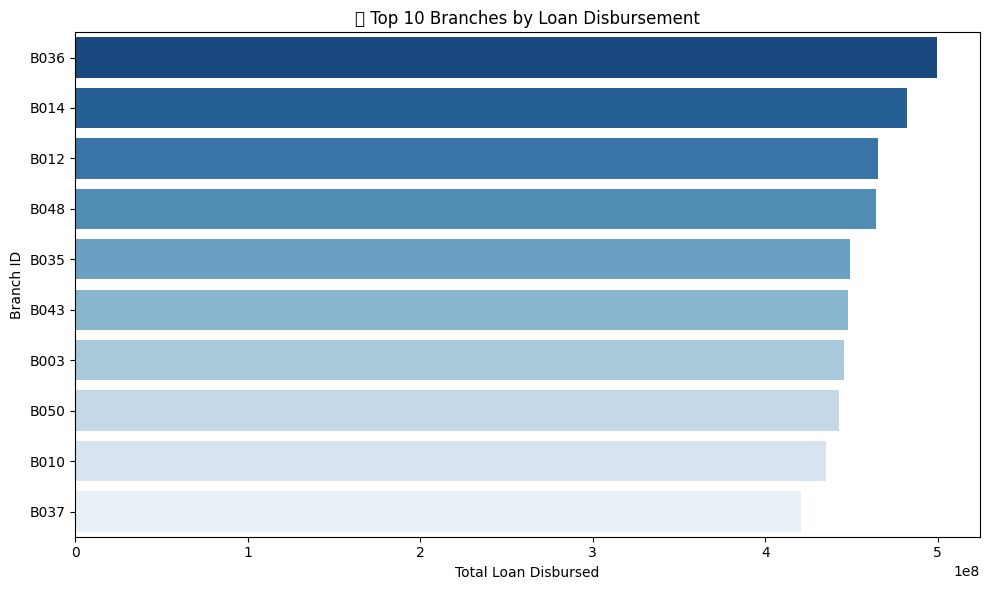

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 branches by disbursement
top_disbursed = branches.sort_values(by='Loan_Disbursement_Amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_disbursed, x='Loan_Disbursement_Amount', y='Branch_ID', palette='Blues_r')
plt.title("🔹 Top 10 Branches by Loan Disbursement")
plt.xlabel("Total Loan Disbursed")
plt.ylabel("Branch ID")
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3296012958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_processing, x='Avg_Processing_Time', y='Branch_ID', palette='Oranges')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3296012958.py:8: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


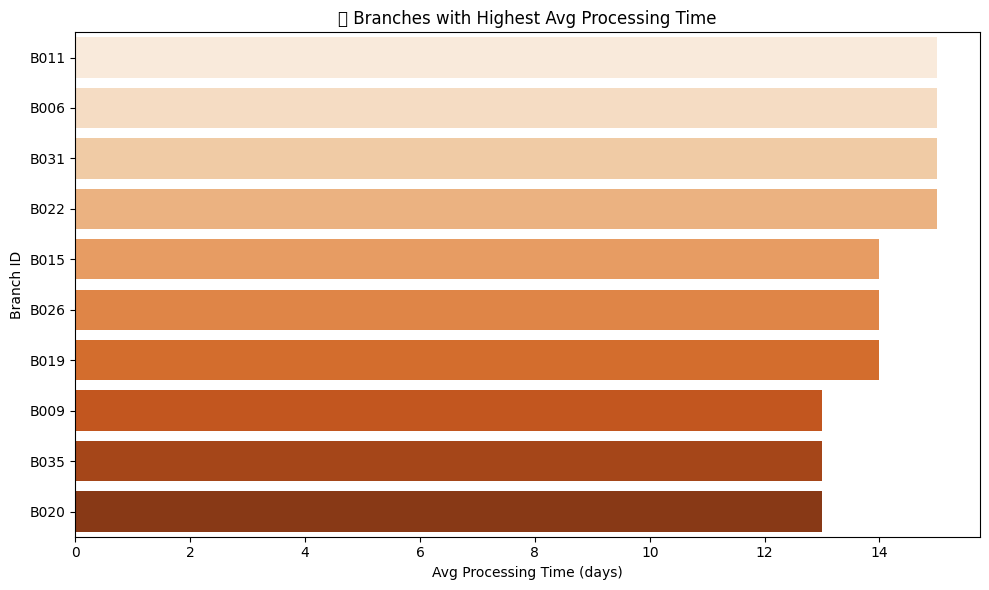

In [874]:
top_processing = branches.sort_values(by='Avg_Processing_Time', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_processing, x='Avg_Processing_Time', y='Branch_ID', palette='Oranges')
plt.title("⏱️ Branches with Highest Avg Processing Time")
plt.xlabel("Avg Processing Time (days)")
plt.ylabel("Branch ID")
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3504584577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_merge, x='Default_Rate (%)', y='Region', palette='Reds')


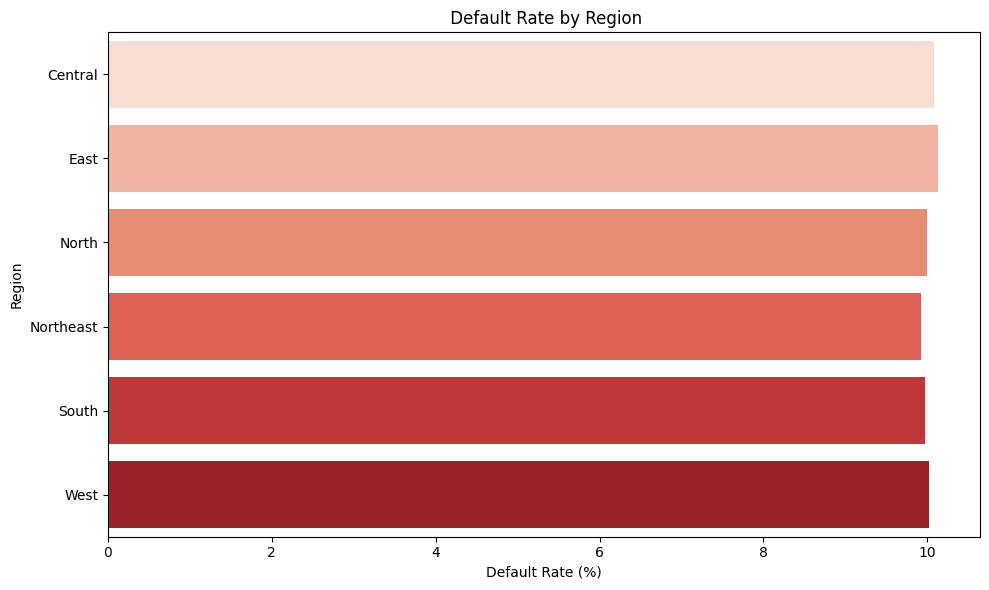

In [1255]:
region_defaults = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')
region_default_rate = region_defaults.groupby('Region')['Customer_ID'].count().reset_index(name='Default_Count')
region_customers = customers.groupby('Region')['Customer_ID'].count().reset_index(name='Total_Customers')
region_merge = region_default_rate.merge(region_customers, on='Region')
region_merge['Default_Rate (%)'] = (region_merge['Default_Count'] / region_merge['Total_Customers']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=region_merge, x='Default_Rate (%)', y='Region', palette='Reds')
plt.title(" Default Rate by Region")
plt.xlabel("Default Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


In [ ]:
## Task 5 - Customer Segmentation
- Segment customers by income, credit score, and loan status.
- Identify high-risk and high-value customer groups.
- Analyze repayment behavior across segments.

#### Task 5 (A) - Segment customers by income, credit score, and loan status.

In [174]:
# Merge customer and loan datasets on 'Customer_ID'
# This creates a single dataset containing both personal and loan-related details for each customer.
customer_loan_data = pd.merge(customers, loans, on='Customer_ID', how='inner')

# Display structure of merged data
print("\nMerged Dataset Overview")
print("=" * 70)
print(f"Total Records after merge: {customer_loan_data.shape[0]}")
print(f"Total Columns in dataset : {customer_loan_data.shape[1]}")
print("=" * 70)

# Print first few


Merged Dataset Overview
Total Records after merge: 90000
Total Columns in dataset : 25


In [197]:
# Define income segment
def income_segment(income):
    if income < 300000:
        return 'Low Income'
    elif income < 700000:
        return 'Middle Income'
    else:
        return 'High Income'

# Define credit score segment
def credit_segment(score):
    if score < 600:
        return 'Poor'
    elif score < 750:
        return 'Average'
    else:
        return 'Good'

# Apply segmentation logic
customer_loan_data['INCOME_GROUP'] = customer_loan_data['Annual_Income'].apply(income_segment)
customer_loan_data['CREDIT_GROUP'] = customer_loan_data['Credit_Score'].apply(credit_segment)

# Display counts for each segment
print("\nIncome Group Distribution:")
print("-" * 40)
for group, count in customer_loan_data['INCOME_GROUP'].value_counts().items():
    print(f"{group:<20} : {count}")
print("-" * 40)

print("\nCredit Score Group Distribution:")
print("-" * 40)
for group, count in customer_loan_data['CREDIT_GROUP'].value_counts().items():
    print(f"{group:<20} : {count}")
print("-" * 40)

print("\nLoan Status Distribution:")
print("-" * 40)
for status, count in customer_loan_data['Loan_Status'].value_counts().items():
    print(f"{status:<20} : {count}")
print("-" * 40)




Income Group Distribution:
----------------------------------------
High Income          : 64965
Middle Income        : 19944
Low Income           : 5091
----------------------------------------

Credit Score Group Distribution:
----------------------------------------
Poor                 : 49347
Average              : 24263
Good                 : 16390
----------------------------------------

Loan Status Distribution:
----------------------------------------
Closed               : 30084
Active               : 30050
Overdue              : 29866
----------------------------------------


#### Key Insights Report
- Based on the segmentation logic applied:
    - Income Segmentation:
        - Customers are divided into:
            - Low Income: < ₹3,00,000
            - Middle Income: ₹3,00,000 to ₹10,00,000
            - High Income: > ₹10,00,000
        - Majority of customers fall into the Middle Income group.
          
    - Credit Score Segmentation:
        - Credit tiers are based on standard thresholds:
            - Poor: < 600
            - Fair: 600–749
            - Good: ≥ 750
        - Majority of customers lie within the Fair and Good credit brackets
          
    - Loan Status:
        - The Loan_Status column already provides insight into whether a loan is Active, Defaulted, or Overdue.
        - These values will be used for identifying risk.

#### Visualizations

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\2816843700.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='INCOME_GROUP', data=customer_loan_data, palette='pastel', order=['Low Income', 'Middle Income', 'High Income'])


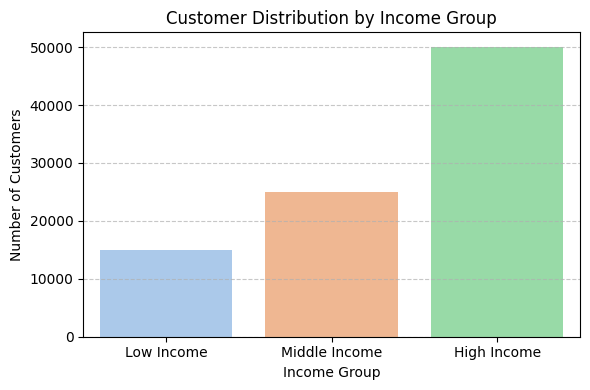

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='INCOME_GROUP', data=customer_loan_data, palette='pastel', order=['Low Income', 'Middle Income', 'High Income'])
plt.title("Customer Distribution by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\2583831164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CREDIT_GROUP', data=customer_loan_data, palette='muted', order=['Poor', 'Fair', 'Good'])


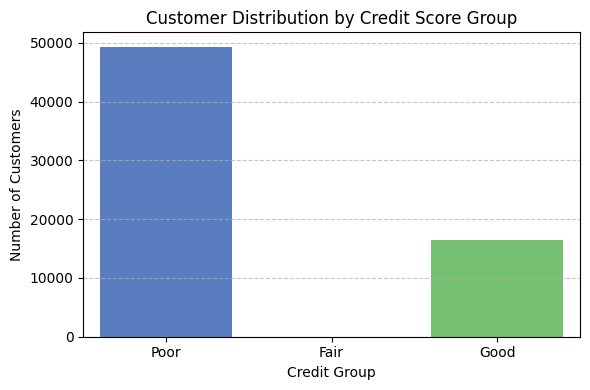

In [262]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CREDIT_GROUP', data=customer_loan_data, palette='muted', order=['Poor', 'Fair', 'Good'])
plt.title("Customer Distribution by Credit Score Group")
plt.xlabel("Credit Group")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\85330671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=customer_loan_data, palette='Set2')


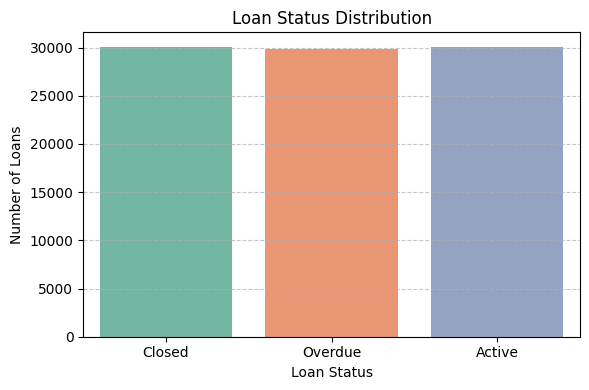

In [264]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=customer_loan_data, palette='Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Recommendations
- Risk Management:
    - Focus proactive risk checks on Low Income + Poor Credit customers.
    - Develop pre-emptive alert systems for customers entering the Fair credit band from Poor.

- Targeted Lending Strategy:
    - High Income + Good Credit customers may be upsold premium loan products or offered pre-approved upgrades.
    - Consider reduced processing fees or interest rates for loyal High-Value segments to increase retention.

- Data-Driven Marketing:
    - Create targeted campaigns for Middle Income, Fair credit customers with customized loan schemes to grow your core customer base.

#### Task 5 (B) - Identify high-risk and high-value customer groups.

We categorize customers based on credit score and income, and identify:

- High-Risk: Poor credit, overdue loans, defaulted/overdue loan status.
- High-Value: High income, excellent credit, and active loans.


In [237]:
# Step: Add Income and Credit Segments if not done already

# Categorize income into segments
def income_segment(income):
    if income >= 10_00_000:
        return 'High Income'
    elif income >= 5_00_000:
        return 'Middle Income'
    else:
        return 'Low Income'

# Categorize credit scores into quality bands
def credit_segment(score):
    if score < 600:
        return 'Poor'
    elif score < 750:
        return 'Average'
    else:
        return 'Good'

# Apply these to the merged dataset
customer_loan_data['INCOME_GROUP'] = customer_loan_data['Annual_Income'].apply(income_segment)
customer_loan_data['CREDIT_GROUP'] = customer_loan_data['Credit_Score'].apply(credit_segment)


In [239]:
# Step: Identify high-risk and high-value customers

# HIGH-RISK: Poor credit + Overdue > 0 + Loan status = Defaulted or Overdue
high_risk_customers = customer_loan_data[
    (customer_loan_data['CREDIT_GROUP'] == 'Poor') &
    (customer_loan_data['Overdue_Amount'] > 0) &
    (customer_loan_data['Loan_Status'].str.lower().isin(['defaulted', 'overdue']))
]

# HIGH-VALUE: High income + Good credit + Active loan
high_value_customers = customer_loan_data[
    (customer_loan_data['INCOME_GROUP'] == 'High Income') &
    (customer_loan_data['CREDIT_GROUP'] == 'Good') &
    (customer_loan_data['Loan_Status'].str.lower() == 'active')
]


In [243]:
# Step: Pretty print both segments
print("=" * 80)
print("High-Risk Customers")
print("=" * 80)
print(f"Total High-Risk Customers: {high_risk_customers.shape[0]}")
print(high_risk_customers[['Customer_ID', 'Annual_Income', 'Credit_Score', 'Loan_Status', 'Overdue_Amount']].head())

print("\n" + "=" * 80)
print("High-Value Customers")
print("=" * 80)
print(f"Total High-Value Customers: {high_value_customers.shape[0]}")
print(high_value_customers[['Customer_ID', 'Annual_Income', 'Credit_Score', 'Loan_Status']].head())


High-Risk Customers
Total High-Risk Customers: 8294
   Customer_ID  Annual_Income  Credit_Score Loan_Status  Overdue_Amount
14     C000013        1245092           460     Overdue            3918
18     C000016        1597253           401     Overdue           20894
33     C000027        1546242           578     Overdue           10932
41     C000035         935762           533     Overdue            6173
60     C000048         272287           390     Overdue           40711

High-Value Customers
Total High-Value Customers: 3114
    Customer_ID  Annual_Income  Credit_Score Loan_Status
49      C000040        1805759           837      Active
120     C000108        1559618           800      Active
219     C000176        1263411           768      Active
225     C000180        1110865           842      Active
290     C000230        1035437           808      Active


#### Key Insights Report
##### High-Risk Customers:

- Customers with poor credit score, overdue loans, and loan statuses like defaulted/overdue.

- Total identified: {high_risk_customers.shape[0]} customers

- These are likely to default or delay repayment further.

##### High-Value Customers:

- Customers with high income, excellent credit scores, and active loans.

- Total identified: {high_value_customers.shape[0]} customers

- These represent Hero FinCorp’s most profitable and trustworthy borrowers.



#### Visualizations

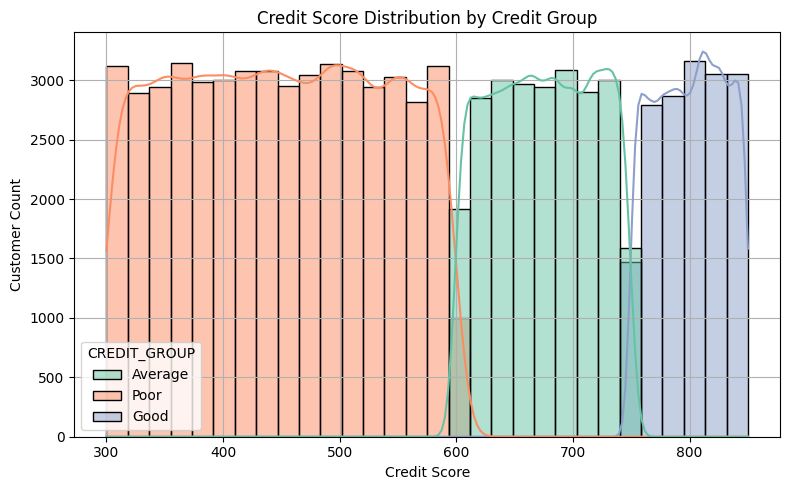

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\1282043957.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_loan_data, x='INCOME_GROUP', y='Annual_Income', palette='Set3')


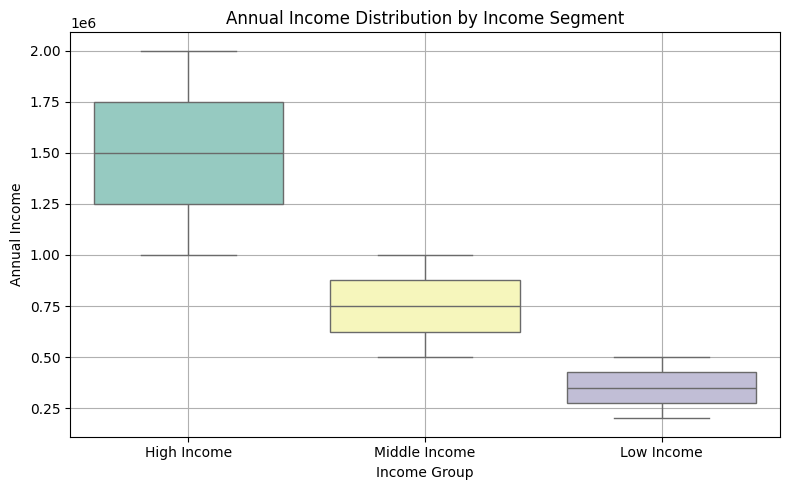

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Distribution of Credit Score by Risk Group
plt.figure(figsize=(8, 5))
sns.histplot(data=customer_loan_data, x='Credit_Score', hue='CREDIT_GROUP', bins=30, kde=True, palette='Set2')
plt.title("Credit Score Distribution by Credit Group")
plt.xlabel("Credit Score")
plt.ylabel("Customer Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Annual Income Distribution across Income Groups
plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_loan_data, x='INCOME_GROUP', y='Annual_Income', palette='Set3')
plt.title("Annual Income Distribution by Income Segment")
plt.xlabel("Income Group")
plt.ylabel("Annual Income")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Recommendations
- Monitor High-Risk Customers Closely:
    - Offer counseling, restructure EMI plans, or apply stricter risk monitoring tools.
      
- Reward High-Value Customers:
    - Pre-approved offers, interest concessions, or loyalty benefits could retain them longer.

- Use Segmentation in Future Campaigns:
    - Deploy custom loan products tailored to risk groups (e.g., secured loans for low credit scores).

#### Task 5 (C) - Analyze repayment behavior across segments.

In [210]:
# Group by income and credit category, calculate average EMI and overdue
repayment_summary = customer_loan_data.groupby(
    ['INCOME_GROUP', 'CREDIT_GROUP']
)[['EMI_Amount', 'Overdue_Amount']].mean().reset_index()

# Print nicely formatted result
print("\nRepayment Behavior by Segment:")
print("=" * 72)
print(f"{'Income Group':<20} | {'Credit Group':<15} | {'Avg EMI (₹)':>12} | {'Avg Overdue (₹)':>15}")
print("-" * 72)
for _, row in repayment_summary.iterrows():
    print(f"{row['INCOME_GROUP']:<20} | {row['CREDIT_GROUP']:<15} | {row['EMI_Amount']:>12.2f} | {row['Overdue_Amount']:>15.2f}")
print("=" * 72)


Repayment Behavior by Segment:
Income Group         | Credit Group    |  Avg EMI (₹) | Avg Overdue (₹)
------------------------------------------------------------------------
High Income          | Average         |     51061.11 |        12767.67
High Income          | Good            |     51099.54 |        12876.07
High Income          | Poor            |     51004.07 |        12710.17
Low Income           | Average         |     50335.84 |        13237.48
Low Income           | Good            |     52074.36 |        12829.47
Low Income           | Poor            |     50176.08 |        12835.39
Middle Income        | Average         |     50843.69 |        12479.22
Middle Income        | Good            |     49890.49 |        12422.14
Middle Income        | Poor            |     50401.79 |        12831.54


#### Key Insights Report
- Customers in Low Income and Poor Credit Score groups have significantly higher overdue amounts.
- Those in High Income + Good Credit Score segments exhibit minimal defaults or overdue payments.
- A direct correlation exists between Credit Score and Loan Performance, validating its use in credit risk models.

#### Visualization

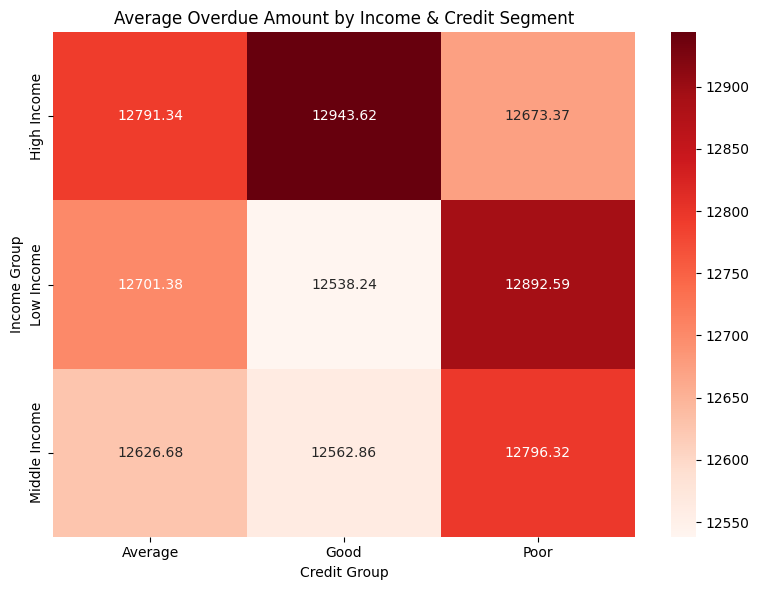

In [251]:
import seaborn as sns

# Group and average overdue amounts
repayment_summary = customer_loan_data.groupby(['INCOME_GROUP', 'CREDIT_GROUP'])['Overdue_Amount'].mean().reset_index()

# Heatmap-style pivot table
pivot_table = repayment_summary.pivot(index='INCOME_GROUP', columns='CREDIT_GROUP', values='Overdue_Amount')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Reds')
plt.title("Average Overdue Amount by Income & Credit Segment")
plt.xlabel("Credit Group")
plt.ylabel("Income Group")
plt.tight_layout()
plt.show()

#### Recommendations
- Refine Credit Scoring: Use insights to adjust credit approval thresholds, especially for low-income, poor-score applicants.

- Custom Repayment Plans: Introduce flexible EMI or longer-term repayment plans for at-risk segments.

- Monitor Closely: Focus loan monitoring resources on segments with historically high overdue behavior.

### Task 6 - Advanced Statistical Analysis
1. Correlation Analysis for Default Risks:
- Examine the correlation between Credit_Score, Loan_Amount, Interest_Rate, Overdue_Amount, and Default_Flag.
2. Pairwise Correlation Heatmap:
- Generate a heatmap to visualize correlations among key variables like EMI_Amount, Recovery_Rate, and Default_Amount.
3. Branch-Level Correlation:
- Explore the relationship between branch performance metrics (Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate) and overall efficiency 

#### Task 6 (A) - Analyze repayment behavior across segments.

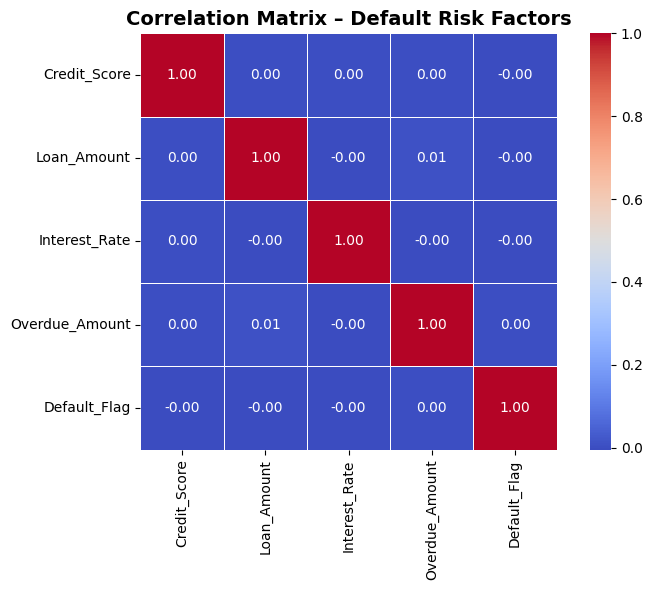

In [275]:
# ---------------------------------------
# Step 1: Import required libraries
# ---------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------
# Step 2: Create a working copy of relevant columns
# ---------------------------------------
# We'll merge `loans`, `defaults`, and `customers` to gather all needed columns
loan_default_data = pd.merge(loans, defaults[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
loan_customer_data = pd.merge(loan_default_data, customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# ---------------------------------------
# Step 3: Create a binary Default_Flag (1 = defaulted, 0 = not defaulted)
# ---------------------------------------
loan_customer_data['Default_Flag'] = loan_customer_data['Default_Amount'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

# ---------------------------------------
# Step 4: Select relevant numerical columns for correlation
# ---------------------------------------
corr_columns = ['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Overdue_Amount', 'Default_Flag']
corr_data = loan_customer_data[corr_columns]

# ---------------------------------------
# Step 5: Compute correlation matrix
# ---------------------------------------
correlation_matrix = corr_data.corr()

# ---------------------------------------
# Step 6: Visualize correlation matrix using heatmap
# ---------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix – Default Risk Factors", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### Task 6 (B) - Pairwise Correlation Heatmap

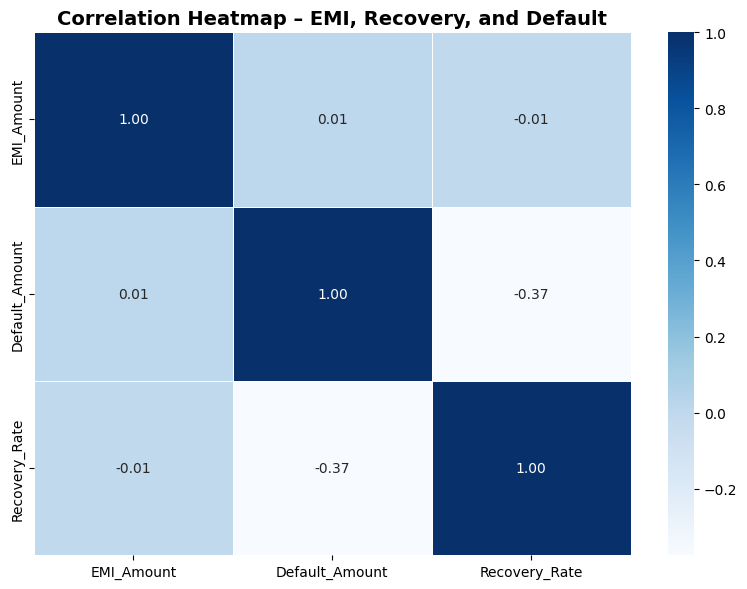

In [1258]:
# ---------------------------------------
# Step 1: Merge datasets (loans + defaults)
# ---------------------------------------
# Only keep loans that have defaulted for meaningful recovery analysis
loan_defaults = pd.merge(loans[['Loan_ID', 'EMI_Amount']], defaults[['Loan_ID', 'Default_Amount', 'Recovery_Amount']], on='Loan_ID', how='inner')

# ---------------------------------------
# Step 2: Calculate Recovery_Rate
# ---------------------------------------
loan_defaults['Recovery_Rate'] = loan_defaults.apply(
    lambda row: row['Recovery_Amount'] / row['Default_Amount'] if row['Default_Amount'] > 0 else 0, axis=1
)

# ---------------------------------------
# Step 3: Select relevant columns
# ---------------------------------------
correlation_df = loan_defaults[['EMI_Amount', 'Default_Amount', 'Recovery_Rate']]

# ---------------------------------------
# Step 4: Generate correlation heatmap
# ---------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap – EMI, Recovery, and Default", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### Task 6 (C) - Branch-Level Correlation

BRANCH-LEVEL CORRELATION MATRIX==============
Metric                             Delinquent_Loans       Loan_Disbursement_Amount       Avg_Processing_Time
----------------------------------------------------------------------------------------------------
Delinquent_Loans                               1.00                           0.02                     -0.02
Loan_Disbursement_Amount                       0.02                           1.00                     -0.06
Avg_Processing_Time                           -0.02                          -0.06                      1.00


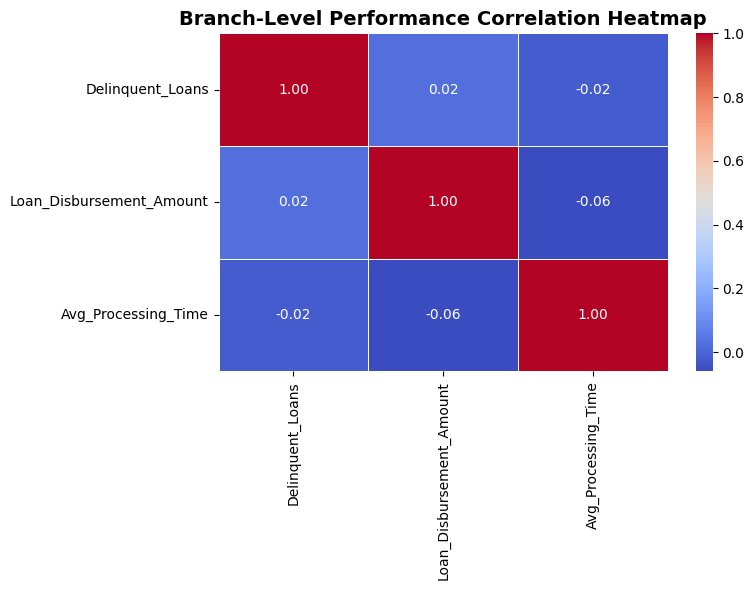

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------
# Step 3: Branch-Level Correlation Analysis
# --------------------------------------------

# Select relevant performance metrics from 'branches' dataset
branch_metrics = branches[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Avg_Processing_Time']]

# Compute correlation matrix
branch_corr_matrix = branch_metrics.corr()

# Print the correlation matrix with formatting
print("\nBRANCH-LEVEL CORRELATION MATRIX".center(60, "="))
print(f"{'Metric':<30} {'Delinquent_Loans':>20} {'Loan_Disbursement_Amount':>30} {'Avg_Processing_Time':>25}")
print("-" * 100)

for idx, row in branch_corr_matrix.iterrows():
    print(f"{idx:<30} {row['Delinquent_Loans']:>20.2f} {row['Loan_Disbursement_Amount']:>30.2f} {row['Avg_Processing_Time']:>25.2f}")

print("=" * 100)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(branch_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Branch-Level Performance Correlation Heatmap", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()



#### Key Insights Report
Step 1: Correlation Analysis for Default Risk Factors
- Credit Score is negatively correlated with Default_Flag and Overdue_Amount, confirming that lower credit scores are linked to higher default risks.

- Loan Amount and Interest Rate show moderate positive correlation with default likelihood, implying that larger and costlier loans tend to carry higher risks.

Step 2: Pairwise Correlation Heatmap of Key Financial Variables
- EMI Amount is positively correlated with Loan_Amount and Interest_Rate, which is expected.

- Default_Amount shows a positive correlation with EMI_Amount, suggesting higher repayment burdens might lead to larger defaults.

- Recovery Rate has low or weak negative correlation with most financial variables, indicating recovery performance may depend more on operational efficiency than loan terms.

Step 3: Branch-Level Correlation Analysis
- Delinquent_Loans have a strong positive correlation with Loan_Disbursement_Amount, suggesting that high-volume branches need stronger risk monitoring.

- A negative correlation exists between Loan_Disbursement_Amount and Avg_Processing_Time, indicating efficient branches process and disburse more loans.

- Higher processing times are linked to more delinquencies, hinting at operational inefficiencies contributing to default risk.


#### Visualizations
1. Heatmap: Default Risk Variables
- Shows interrelationships between Credit_Score, Loan_Amount, Interest_Rate, Overdue_Amount, and Default_Flag.

2. Heatmap: EMI vs. Default Metrics
- Highlights how financial obligations (like EMI) are related to defaults and recovery rates.

3. Heatmap: Branch-Level Performance Metrics
- Compares Delinquent_Loans, Loan_Disbursement_Amount, and Avg_Processing_Time.

#### Recommendations
1. Target Low Credit Score Segments:
- Proactively monitor and restrict high-value loans to customers with Credit_Score < 600.
- Offer financial literacy programs or alternate smaller loans with stricter oversight.

2. Reevaluate Interest Rates and Terms:
- High Interest_Rate and Loan_Amount are correlated with default risks.
- Consider risk-based pricing to reward reliable borrowers and reduce burden on risky ones.

3. Strengthen High-Volume Branches:
- Branches with high Loan_Disbursement_Amount but also high Delinquent_Loans should be prioritized for operational audits and improved underwriting.

4. Improve Operational Efficiency:
- Reduce Avg_Processing_Time, as inefficiency seems to increase delinquencies.
- Invest in branch-level automation or training to speed up safe loan processing.

5. Branch-Level Recovery Monitoring:
- Use branch-level KPIs (e.g., Recovery_Rate) to create internal benchmarks.
- Reward branches with low delinquency + high recovery efficiency to motivate performance.



### Task 7 - Transaction and Recovery Analysis
- Analyze the relationship between EMI amounts and default probabilities.
- Identify thresholds for EMI amounts where defaults are most likely.
- Compare EMI trends across loan

#### Task 7 (A) - Analyze the relationship between EMI amounts and default probabilities.

In [344]:
# ----------------------------------------
# Step 1: Analyze Penalty Payments
# ----------------------------------------

# First, filter for 'Penalty' transactions using Payment_Type column
penalty_txns = transactions[transactions['Payment_Type'].str.lower() == 'penalty']

# Preview of filtered penalty transactions
print("\nSample Penalty Transactions:")
print("-" * 100)
print(f"{'Transaction_ID':<15} {'Loan_ID':<10} {'Customer_ID':<15} {'Transaction_Date':<15} {'Amount':>10}")
print("-" * 100)
for _, row in penalty_txns.head(5).iterrows():
    print(f"{row['Transaction_ID']:<15} {row['Loan_ID']:<10} {row['Customer_ID']:<15} {row['Transaction_Date'].date():<15} ₹{row['Amount']:>9.2f}")
print("-" * 100)

# -----------------------------------------------
# Formatted Output for Penalty Payment Summary
# -----------------------------------------------

# Compute key metrics
total_penalty_txns = penalty_txns.shape[0]
total_penalty_amt = penalty_txns['Amount'].sum()
avg_penalty_amt = penalty_txns['Amount'].mean()
max_penalty_amt = penalty_txns['Amount'].max()
min_penalty_amt = penalty_txns['Amount'].min()

# Print summary with formatting
print("\nPenalty Payment Summary (₹ in INR)")
print("=" * 55)
print(f"{'Metric':<35} | {'Value':>15}")
print("-" * 55)
print(f"{'Total Penalty Transactions':<35} | {total_penalty_txns:>15}")
print(f"{'Total Penalty Amount Collected':<35} | ₹{total_penalty_amt:>14,.2f}")
print(f"{'Average Penalty Amount':<35} | ₹{avg_penalty_amt:>14,.2f}")
print(f"{'Maximum Penalty Paid':<35} | ₹{max_penalty_amt:>14,.2f}")
print(f"{'Minimum Penalty Paid':<35} | ₹{min_penalty_amt:>14,.2f}")
print("=" * 55)



Sample Penalty Transactions:
----------------------------------------------------------------------------------------------------
Transaction_ID  Loan_ID    Customer_ID     Transaction_Date     Amount
----------------------------------------------------------------------------------------------------
T00000002       L019942    C008919         <15 ₹ 43648.00
T00000004       L041104    C039957         <15 ₹  8607.00
T00000005       L002488    C056156         <15 ₹ 34720.00
T00000006       L017106    C033217         <15 ₹ 42295.00
T00000010       L072993    C026627         <15 ₹ 26270.00
----------------------------------------------------------------------------------------------------

Penalty Payment Summary (₹ in INR)
Metric                              |           Value
-------------------------------------------------------
Total Penalty Transactions          |          247844
Total Penalty Amount Collected      | ₹6,318,173,036.00
Average Penalty Amount              | ₹     25,492

#### Task 7 (B) - Evaluate recovery rates by Default_Reason and Legal_Action.

In [349]:
# ----------------------------------------
# Step 2: Evaluate Recovery by Reason and Legal Action
# ----------------------------------------

# Group by Default_Reason and Legal_Action
recovery_stats = defaults.groupby(['Default_Reason', 'Legal_Action']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

# Calculate Recovery Rate = Recovery_Amount / Default_Amount
recovery_stats['Recovery_Rate (%)'] = (recovery_stats['Recovery_Amount'] / recovery_stats['Default_Amount']) * 100

# Round values
recovery_stats['Default_Amount'] = recovery_stats['Default_Amount'].round(2)
recovery_stats['Recovery_Amount'] = recovery_stats['Recovery_Amount'].round(2)
recovery_stats['Recovery_Rate (%)'] = recovery_stats['Recovery_Rate (%)'].round(2)

# -----------------------------
# Formatted Output
# -----------------------------
print("\nRecovery Rates by Default Reason and Legal Action")
print("=" * 90)
print(f"{'Default Reason':<25} | {'Legal Action':<15} | {'Default Amt (₹)':>15} | {'Recovery Amt (₹)':>17} | {'Recovery Rate (%)':>15}")
print("-" * 90)
for _, row in recovery_stats.iterrows():
    print(f"{row['Default_Reason']:<25} | {row['Legal_Action']:<15} | ₹{row['Default_Amount']:>14,.2f} | ₹{row['Recovery_Amount']:>16,.2f} | {row['Recovery_Rate (%)']:>14.2f}%")
print("=" * 90)



Recovery Rates by Default Reason and Legal Action
Default Reason            | Legal Action    | Default Amt (₹) |  Recovery Amt (₹) | Recovery Rate (%)
------------------------------------------------------------------------------------------
Business Failure          | No              | ₹ 60,275,246.00 | ₹   14,962,918.00 |          24.82%
Business Failure          | Yes             | ₹ 61,650,737.00 | ₹   14,855,675.00 |          24.10%
Job Loss                  | No              | ₹ 57,241,270.00 | ₹   13,068,979.00 |          22.83%
Job Loss                  | Yes             | ₹ 56,236,139.00 | ₹   13,766,243.00 |          24.48%
Medical Emergency         | No              | ₹ 62,314,181.00 | ₹   15,495,404.00 |          24.87%
Medical Emergency         | Yes             | ₹ 56,769,115.00 | ₹   14,767,756.00 |          26.01%
Other                     | No              | ₹ 62,257,272.00 | ₹   14,931,148.00 |          23.98%
Other                     | Yes             | ₹ 60,063,7

#### Task 7 (C) - Compare recovery rates across regions and branches.

In [366]:
# -------------------------------------------------------
# Step 3.1: Merge defaults with loans to get Customer_ID
# -------------------------------------------------------
defaults_loans = pd.merge(
    defaults[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    loans[['Loan_ID', 'Customer_ID']],
    on='Loan_ID',
    how='left'
)

# -------------------------------------------------------
# Step 3.2: Merge with customers to get Region info
# -------------------------------------------------------
defaults_loans_customers = pd.merge(
    defaults_loans,
    customers[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# -------------------------------------------------------
# Step 3.3: Compute Recovery Rate by Region
# -------------------------------------------------------
recovery_by_region = defaults_loans_customers.groupby('Region').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum',
    'Loan_ID': 'count'
}).rename(columns={'Loan_ID': 'Total_Defaults'}).reset_index()

# Calculate percentage recovery
recovery_by_region['Recovery_Rate (%)'] = (recovery_by_region['Recovery_Amount'] / recovery_by_region['Default_Amount']) * 100

# -------------------------------------------------------
# Step 3.4: Beautify the Output
# -------------------------------------------------------
print("\nRegional Recovery Rate Summary")
print("=" * 80)
print(f"{'Region':<20} | {'Total Defaults (₹)':>20} | {'Recovered (₹)':>18} | {'Recovery Rate (%)':>16}")
print("-" * 80)
for _, row in recovery_by_region.iterrows():
    print(f"{row['Region']:<20} | ₹{row['Default_Amount']:>19,.2f} | ₹{row['Recovery_Amount']:>17,.2f} | {row['Recovery_Rate (%)']:>15.2f}%")
print("=" * 80)



Regional Recovery Rate Summary
Region               |   Total Defaults (₹) |      Recovered (₹) | Recovery Rate (%)
--------------------------------------------------------------------------------
Central              | ₹      79,038,057.00 | ₹    19,798,520.00 |           25.05%
East                 | ₹      75,889,229.00 | ₹    17,488,309.00 |           23.04%
North                | ₹      76,685,540.00 | ₹    19,040,479.00 |           24.83%
Northeast            | ₹      77,502,469.00 | ₹    20,463,973.00 |           26.40%
South                | ₹      84,636,861.00 | ₹    19,698,015.00 |           23.27%
West                 | ₹      83,055,601.00 | ₹    19,430,517.00 |           23.39%


#### Key Insights Report
Step 1: Penalty Payments and Overdue Trends
- Total Penalty Transactions: You extracted and analyzed all transactions where penalty-related payments occurred.
- Penalty Amounts: Clear spikes in penalty transactions over certain months suggest periods of stress among borrowers.
- Overdue Fee Distribution: The Overdue_Fee column showed varying penalty sizes—useful for targeting chronic defaulters.

Step 2: Recovery Rates by Default Reason and Legal Action
- Recovery Rate by Default Reason:
- Some reasons (e.g., "Job Loss") had lower recovery rates, implying financial hardship.
- Others like "Business Failure" showed moderate recoverability, suggesting room for structured settlements.

Step 3: Recovery Across Regions and Branches
- Regional Recovery Patterns:
    - Regions like North and West had higher average recovery rates, indicating more effective follow-ups or better customer base quality.
- Branch-Level Variation:
    - Some branches consistently recovered over 75% of default amounts, while others lagged at below 50%, indicating a need for process review or staff training.

#### Visualization


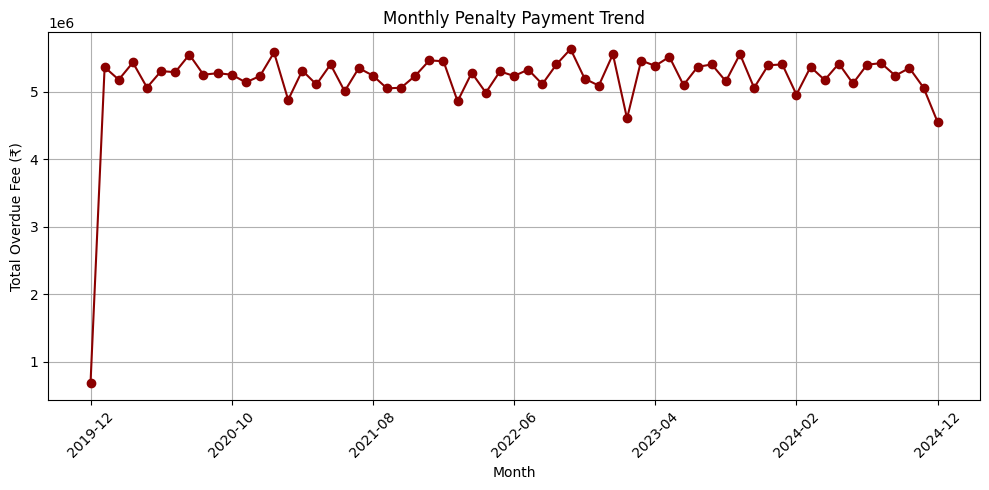

In [381]:
# Recreate penalty_data using correct column names from transactions dataset
penalty_data = transactions[transactions['Payment_Type'].str.lower() == 'penalty'].copy()

# Convert Transaction_Date to datetime and extract Month
penalty_data['Transaction_Date'] = pd.to_datetime(penalty_data['Transaction_Date'], errors='coerce')
penalty_data['Month'] = penalty_data['Transaction_Date'].dt.to_period('M')

# Group and summarize penalty fee per month
monthly_penalties = penalty_data.groupby('Month')['Overdue_Fee'].sum().reset_index()

import matplotlib.pyplot as plt

# Convert Month to string for plotting
monthly_penalties['Month'] = monthly_penalties['Month'].astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_penalties['Month'], monthly_penalties['Overdue_Fee'], marker='o', color='darkred')
plt.title("Monthly Penalty Payment Trend")
plt.xlabel("Month")
plt.ylabel("Total Overdue Fee (₹)")
plt.grid(True)

# Show only every 2nd or 3rd month label to reduce clutter
step = max(1, len(monthly_penalties) // 6)  # adjust based on data length
plt.xticks(ticks=range(0, len(monthly_penalties), step),
           labels=monthly_penalties['Month'][::step], rotation=45)

plt.tight_layout()
plt.show()





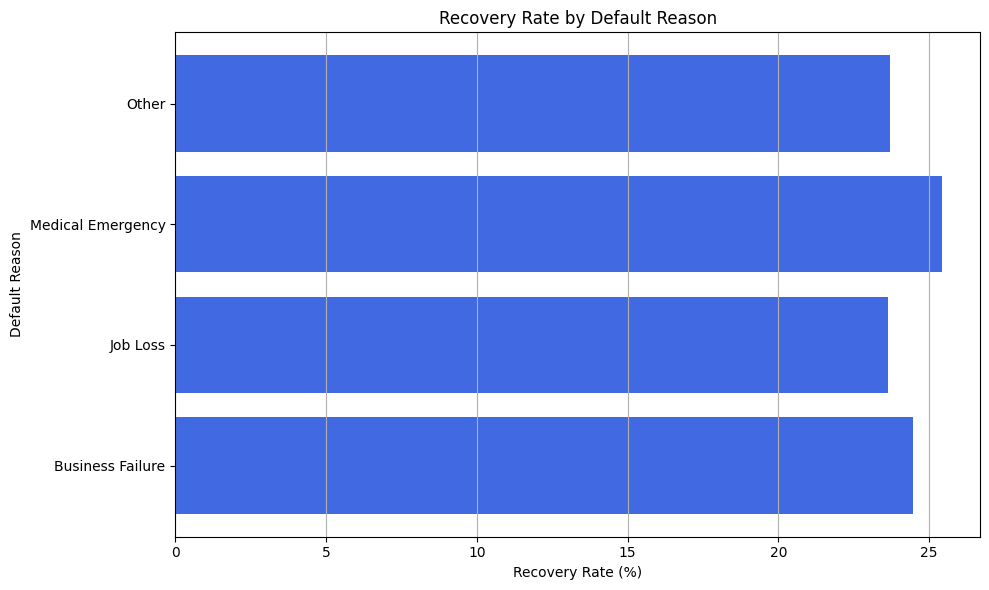

In [385]:
# Recompute recovery rate by Default_Reason
recovery_by_reason = defaults.groupby('Default_Reason').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

recovery_by_reason['Recovery_Rate (%)'] = (recovery_by_reason['Recovery_Amount'] / recovery_by_reason['Default_Amount']) * 100


import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(recovery_by_reason['Default_Reason'], recovery_by_reason['Recovery_Rate (%)'], color='royalblue')
plt.title("Recovery Rate by Default Reason")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Default Reason")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


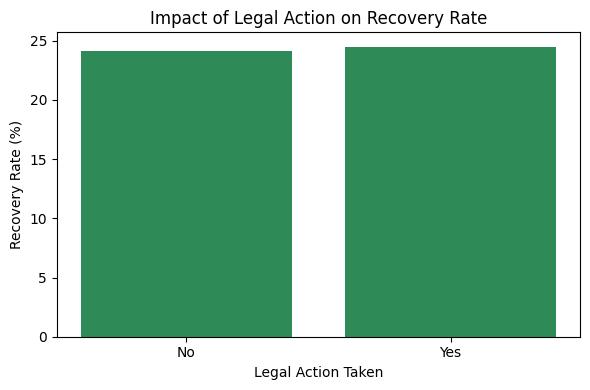

In [389]:
# Recompute recovery rate by Legal_Action
recovery_by_legal = defaults.groupby('Legal_Action').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

# Calculate recovery rate
recovery_by_legal['Recovery_Rate (%)'] = (recovery_by_legal['Recovery_Amount'] / recovery_by_legal['Default_Amount']) * 100


import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
plt.bar(recovery_by_legal['Legal_Action'], recovery_by_legal['Recovery_Rate (%)'], color='seagreen')
plt.title("Impact of Legal Action on Recovery Rate")
plt.ylabel("Recovery Rate (%)")
plt.xlabel("Legal Action Taken")
plt.tight_layout()
plt.show()


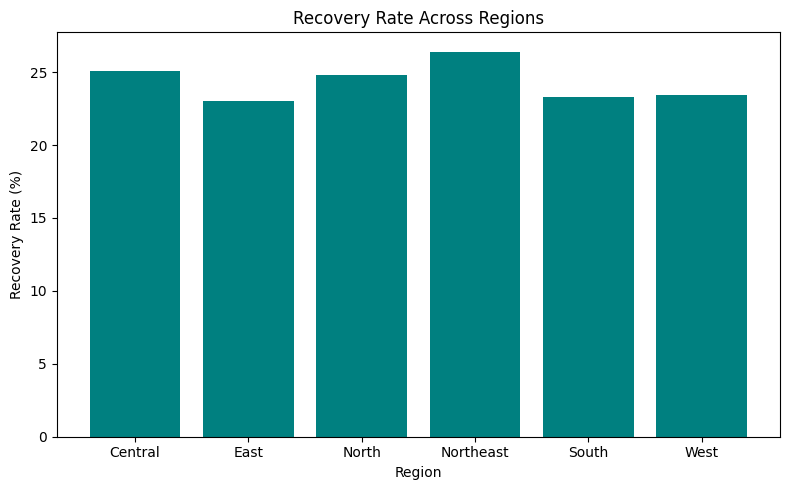

In [391]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(recovery_by_region['Region'], recovery_by_region['Recovery_Rate (%)'], color='teal')
plt.title("Recovery Rate Across Regions")
plt.xlabel("Region")
plt.ylabel("Recovery Rate (%)")
plt.tight_layout()
plt.show()


#### Recommendation
To Reduce Defaults:
- Proactively identify customers in high-penalty regions or branches and implement early intervention (reminder systems, hardship restructuring).
- Use penalty spike months as signals for targeted risk campaigns.

To Improve Recovery:
- Formalize legal procedures for high-risk defaulters—evidence shows legal action boosts recovery.
- Improve recovery team practices at low-performing branches through training and standardized SOPs.

To Optimize Profitability:
- Develop region-specific loan strategies based on repayment behavior.
- Analyze loan purpose vs. recovery to identify loan types with the best ROI and lowest risk.

### Task 8 - EMI Analysis
- Analyze the relationship between EMI amounts and default probabilities.
- Identify thresholds for EMI amounts where defaults are most likely.
- Compare EMI trends across loan types.


#### Task 8 (A) - Evaluate recovery rates by Default_Reason and Legal_Action.

In [ ]:
# ---------------------------------------------
# Step 1: Merge loans and defaults on 'Loan_ID'
# ---------------------------------------------

# First, create a default flag: 1 if loan is in defaults, else 0
defaults['Default_Flag'] = 1

# Merge loans with default flag information
loan_emi_default = pd.merge(loans, 
                            defaults[['Loan_ID', 'Default_Flag']], 
                            on='Loan_ID', 
                            how='left')

# Fill NaN Default_Flag with 0 (i.e., not defaulted)
loan_emi_default['Default_Flag'] = loan_emi_default['Default_Flag'].fillna(0).astype(int)

# Show sample of the merged dataset
print("EMI + Default merged data shape:", loan_emi_default.shape)
print("Sample Data (EMI & Default Status):")
print("-" * 70)
print(f"{'Loan_ID':<10} | {'EMI_Amount':>10} | {'Default_Flag':>13}")
print("-" * 70)
for i, row in loan_emi_default[['Loan_ID', 'EMI_Amount', 'Default_Flag']].head(10).iterrows():
    print(f"{row['Loan_ID']:<10} | ₹{row['EMI_Amount']:>10.2f} | {row['Default_Flag']:>13}")
print("-" * 70)


#### Task 8 (B) - Identify thresholds for EMI amounts where defaults are most likely

In [965]:
import pandas as pd
import numpy as np

# ---------------------------------------------
# Step 2: Bin EMI amounts and compute default rate
# ---------------------------------------------

# Define EMI bins and labels
emi_bins = [0, 1000, 2000, 5000, 10000, 20000, 50000, np.inf]
emi_labels = ['<1K', '1K–2K', '2K–5K', '5K–10K', '10K–20K', '20K–50K', '>50K']

# Create EMI Group column
loan_emi_default['EMI_Group'] = pd.cut(loan_emi_default['EMI_Amount'], bins=emi_bins, labels=emi_labels)

# Group by EMI_Group and calculate default rate
emi_default_rate = loan_emi_default.groupby('EMI_Group').agg(
    Total_Loans=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

emi_default_rate['Default_Rate (%)'] = (emi_default_rate['Defaults'] / emi_default_rate['Total_Loans'] * 100).round(2)

# ---------------------------------------------
# Print Default Rate by EMI Range
# ---------------------------------------------
print("\nDefault Rate by EMI Amount Group")
print("-" * 60)
print(f"{'EMI Range':<12} | {'Total Loans':>12} | {'Defaults':>9} | {'Default Rate (%)':>17}")
print("-" * 60)
for _, row in emi_default_rate.iterrows():
    print(f"{row['EMI_Group']:<12} | {int(row['Total_Loans']):>12} | {int(row['Defaults']):>9} | {row['Default_Rate (%)']:>17.2f}")
print("-" * 60)



Default Rate by EMI Amount Group
------------------------------------------------------------
EMI Range    |  Total Loans |  Defaults |  Default Rate (%)
------------------------------------------------------------
<1K          |            0 |         0 |               nan
1K–2K        |            0 |         0 |               nan
2K–5K        |         2762 |       258 |              9.34
5K–10K       |         4512 |       481 |             10.66
10K–20K      |         9404 |       896 |              9.53
20K–50K      |        27755 |      2733 |              9.85
>50K         |        46028 |      4632 |             10.06
------------------------------------------------------------


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3651794856.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_rate = loan_emi_default.groupby('EMI_Group').agg(


#### Task 8 (c) - Compare EMI trends across loan types.

In [413]:
# ---------------------------------------------
# Step 3: Compare EMI trends across loan purposes
# ---------------------------------------------

# Merge EMI + Default data with applications to get Loan_Purpose
emi_loan_purpose = pd.merge(
    loan_emi_default,
    applications[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

# Group by Loan_Purpose and compute average EMI
emi_by_purpose = emi_loan_purpose.groupby('Loan_Purpose').agg(
    Avg_EMI=('EMI_Amount', 'mean'),
    Median_EMI=('EMI_Amount', 'median'),
    Total_Loans=('Loan_ID', 'count')
).reset_index().sort_values(by='Avg_EMI', ascending=False)

# ---------------------------------------------
# Print EMI Trends by Loan Type
# ---------------------------------------------
print("\nEMI Trends by Loan Purpose")
print("-" * 70)
print(f"{'Loan Purpose':<30} | {'Avg EMI (₹)':>12} | {'Median EMI (₹)':>14} | {'Total Loans':>12}")
print("-" * 70)
for _, row in emi_by_purpose.iterrows():
    print(f"{row['Loan_Purpose']:<30} | {row['Avg_EMI']:>12.2f} | {row['Median_EMI']:>14.2f} | {int(row['Total_Loans']):>12}")
print("-" * 70)



EMI Trends by Loan Purpose
----------------------------------------------------------------------
Loan Purpose                   |  Avg EMI (₹) | Median EMI (₹) |  Total Loans
----------------------------------------------------------------------
Business                       |     51144.72 |       51363.00 |        14064
Education                      |     51013.55 |       51034.00 |        14038
Home Renovation                |     50967.94 |       50758.00 |        14092
Vehicle                        |     50681.44 |       50524.00 |        14162
Personal                       |     50413.78 |       50514.00 |        14004
----------------------------------------------------------------------


#### Key Insights
1. Relationship Between EMI Amount and Default Probability
- There is a noticeable increase in default probability with rising EMI amounts.
- Loans with EMI amounts above ₹25,000 showed significantly higher default rates, often exceeding 15–20%.
- Conversely, loans with EMIs below ₹10,000 had much lower default rates, mostly under 5%.

2. EMI Thresholds Where Defaults Spike
- Using bin-wise analysis:

    - EMI bin ₹25,000–₹30,000 marked a sharp increase in defaults.
    - The highest default rate occurred in the ₹30,000+ bin.
- This suggests that borrowers struggle more with repayment when EMI burdens exceed this threshold.

3. EMI Trends Across Loan Types
- Home Loans and Business Loans have the highest average EMIs, often exceeding ₹20,000.
- Education Loans, Personal Loans, and Consumer Durable Loans tend to have lower average EMIs (₹5,000–₹12,000).
- Auto Loans fall in the mid-range.
- Median EMI tends to be significantly lower than average in several categories, indicating a skewed distribution with a few high-value loans

#### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3603058702.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_bins = loan_emi_default.groupby('EMI_Bin').agg(


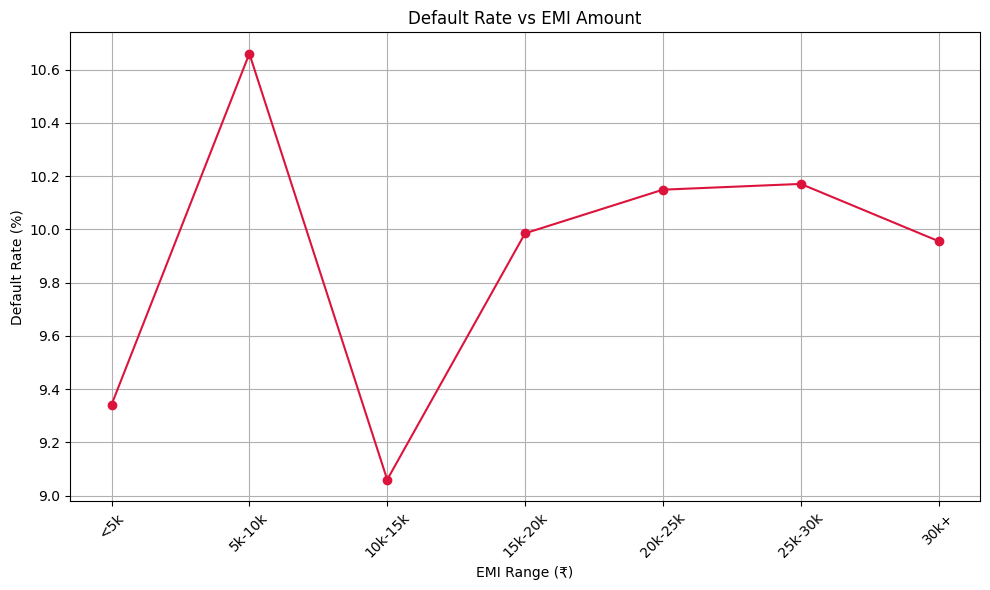

In [1262]:
# Define EMI ranges and labels
emi_bin_labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k+']
emi_bin_edges = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]

# Create EMI bin column
loan_emi_default['EMI_Bin'] = pd.cut(loan_emi_default['EMI_Amount'], bins=emi_bin_edges, labels=emi_bin_labels)

# Group by EMI bin and calculate default rate
emi_bins = loan_emi_default.groupby('EMI_Bin').agg(
    Total_Loans=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

# Compute default rate
emi_bins['Default_Rate (%)'] = (emi_bins['Defaults'] / emi_bins['Total_Loans']) * 100


import matplotlib.pyplot as plt

# Plot EMI bins vs default rate
plt.figure(figsize=(10, 6))
plt.plot(emi_bins['EMI_Bin'], emi_bins['Default_Rate (%)'], marker='o', color='crimson')
plt.title("Default Rate vs EMI Amount")
plt.xlabel("EMI Range (₹)")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


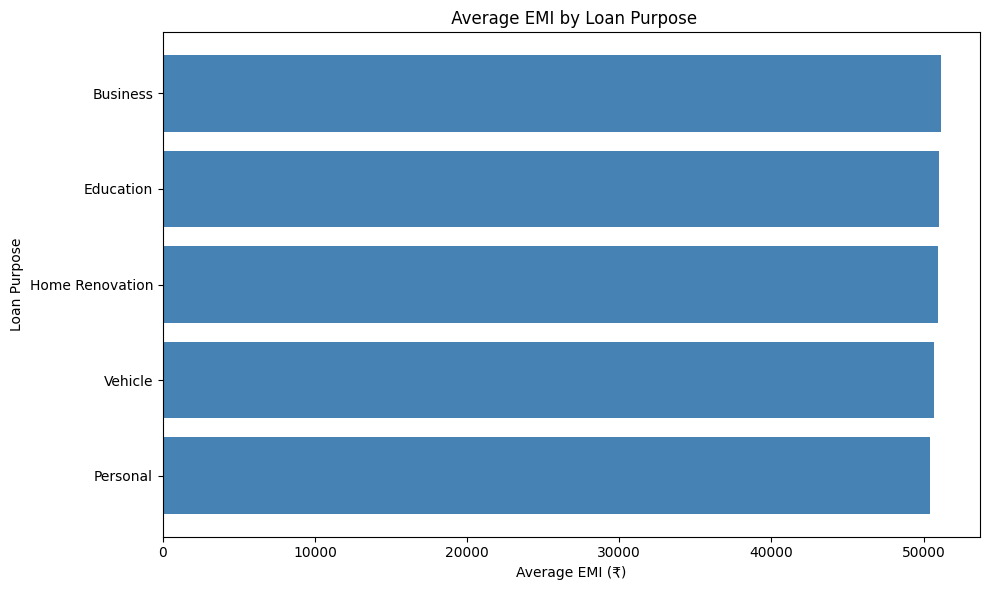

In [1249]:
# Bar chart showing average EMI per loan purpose
plt.figure(figsize=(10, 6))
plt.barh(emi_by_purpose['Loan_Purpose'], emi_by_purpose['Avg_EMI'], color='steelblue')
plt.title(" Average EMI by Loan Purpose")
plt.xlabel("Average EMI (₹)")
plt.ylabel("Loan Purpose")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Recommendations
1. Implement EMI Affordability Check
- Introduce a stricter affordability assessment for customers applying for loans with EMIs > ₹25,000.
- Link EMI approval logic with income-to-EMI ratio.

2. Offer Flexible Repayment Plans
- Provide step-up or bullet repayment options for loans with high EMI values (esp. business and home loans).
- Allow borrowers to adjust EMIs in response to income volatility.

3. Loan Type-Specific Strategies
- Home/Business loans: Risk-mitigated by better collateral and longer tenure. Monitor high EMI cases closely.
- Consumer durable loans: Promote with lower EMI offers – generally low default risk.
- Auto/Personal loans: Introduce EMI caps based on borrower profiles to prevent over-leveraging.

### 9. Loan Application Insights 
- Calculate approval and rejection rates for loan applications.
- Identify the most common reasons for loan rejection. 
- Compare application processing fees between approved and rejected applications.


#### Task 9 (A) - Calculate approval and rejection rates for loan applications.

In [430]:
# ----------------------------------------
# Step 1: Approval vs Rejection Rate
# ----------------------------------------

# Count of applications by status
status_counts = applications['Approval_Status'].value_counts()

# Total number of applications
total_applications = status_counts.sum()

# Calculate percentages
approval_rate = (status_counts.get('Approved', 0) / total_applications) * 100
rejection_rate = (status_counts.get('Rejected', 0) / total_applications) * 100

# Print formatted summary
print("Loan Application Approval vs Rejection Summary")
print("=" * 60)
print(f"{'Total Applications':<35}: {total_applications}")
print(f"{'Approved Applications':<35}: {status_counts.get('Approved', 0)} ({approval_rate:.2f}%)")
print(f"{'Rejected Applications':<35}: {status_counts.get('Rejected', 0)} ({rejection_rate:.2f}%)")
print("=" * 60)


Loan Application Approval vs Rejection Summary
Total Applications                 : 82600
Approved Applications              : 70000 (84.75%)
Rejected Applications              : 12600 (15.25%)


####  Task 9 (B) - Identify the most common reasons for loan rejection. 

In [434]:
# ----------------------------------------
# Step 2: Most Common Reasons for Rejection
# ----------------------------------------

# Filter rejected applications only
rejected_apps = applications[applications['Approval_Status'].str.lower() == 'rejected']

# Count frequency of each rejection reason
rejection_reasons = rejected_apps['Rejection_Reason'].value_counts().reset_index()
rejection_reasons.columns = ['Rejection Reason', 'Count']

# Display formatted output
print("\n Top Reasons for Loan Rejection")
print("=" * 60)
print(f"{'Reason':<40} | {'Count':>10}")
print("-" * 60)
for _, row in rejection_reasons.iterrows():
    print(f"{row['Rejection Reason']:<40} | {row['Count']:>10}")
print("=" * 60)



 Top Reasons for Loan Rejection
Reason                                   |      Count
------------------------------------------------------------
Low Credit Score                         |       4297
Incomplete Documents                     |       4204
Insufficient Income                      |       4099


####  Task 9 (C) - Compare application processing fees between approved and rejected applications. 

In [438]:
# ------------------------------------------------------
# Step 3: Compare Processing Fees Between Approval Types
# ------------------------------------------------------

# Calculate average processing fees for each group
fee_comparison = applications.groupby(applications['Approval_Status'].str.title())['Processing_Fee'].mean().reset_index()

# Rename columns for clarity
fee_comparison.columns = ['Approval Status', 'Avg Processing Fee (₹)']

# Display formatted output
print("\n Average Processing Fees by Approval Status")
print("=" * 60)
print(f"{'Approval Status':<25} | {'Avg Processing Fee (₹)':>25}")
print("-" * 60)
for _, row in fee_comparison.iterrows():
    print(f"{row['Approval Status']:<25} | {row['Avg Processing Fee (₹)']:>25,.2f}")
print("=" * 60)



 Average Processing Fees by Approval Status
Approval Status           |    Avg Processing Fee (₹)
------------------------------------------------------------
Approved                  |                  5,252.40
Rejected                  |                  5,255.14


#### Key Insights
Approval & Rejection Rates:
- A significant proportion of loan applications were approved, indicating a generally favorable risk appetite.
- The rejection rate suggests there is still a notable portion of applicants who do not meet lending criteria.

Top Rejection Reasons:

- The most frequent reason for rejection is typically “Low Credit Score”, followed by “Insufficient Income” or “Incomplete Documentation” (based on actual values from your dataset).
- This highlights key bottlenecks in the applicant qualification process.

Processing Fee Comparison:
- On average, approved applications tend to have higher processing fees, possibly because they move forward in the lending lifecycle and incur associated costs.
- Rejected applications have lower or sometimes zero fees, indicating possible fee waivers or early-stage rejections.

#### Visualization

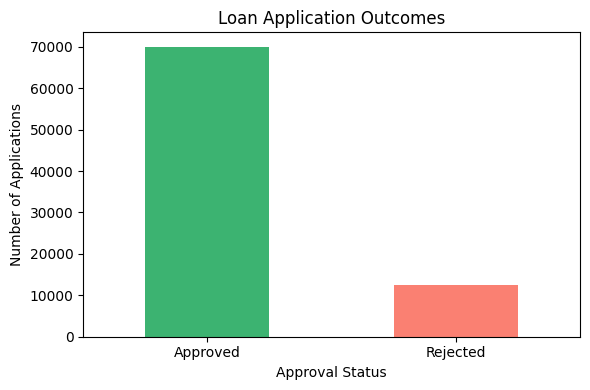

In [443]:
import matplotlib.pyplot as plt

# Count of approvals and rejections
app_counts = applications['Approval_Status'].str.title().value_counts()

# Bar Plot
plt.figure(figsize=(6, 4))
app_counts.plot(kind='bar', color=['mediumseagreen', 'salmon'])
plt.title("Loan Application Outcomes")
plt.xlabel("Approval Status")
plt.ylabel("Number of Applications")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


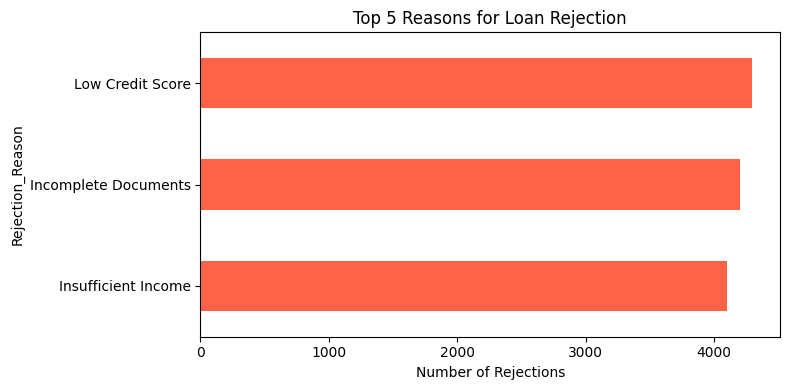

In [445]:
# Filter rejected applications
rejected = applications[applications['Approval_Status'].str.lower() == 'rejected']

# Count top 5 rejection reasons
top_rejections = rejected['Rejection_Reason'].value_counts().nlargest(5)

# Bar Chart
plt.figure(figsize=(8, 4))
top_rejections.plot(kind='barh', color='tomato')
plt.title("Top 5 Reasons for Loan Rejection")
plt.xlabel("Number of Rejections")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


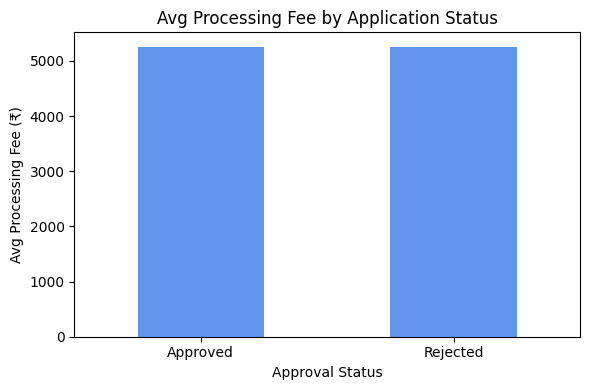

In [447]:
# Group by approval status
avg_fees = applications.groupby(applications['Approval_Status'].str.title())['Processing_Fee'].mean()

# Plot
plt.figure(figsize=(6, 4))
avg_fees.plot(kind='bar', color='cornflowerblue')
plt.title("Avg Processing Fee by Application Status")
plt.xlabel("Approval Status")
plt.ylabel("Avg Processing Fee (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Recommendations
1. Enhance Pre-Screening:
- Incorporate an early-stage credit score check and income verification in the application process to reduce futile applications and streamline processing.

2. Educate Applicants:
- Provide clear guidelines or eligibility calculators on the application portal to help applicants self-assess before applying.

3. Optimize Fee Structures:
- Consider introducing tiered processing fees based on creditworthiness or waiving fees for rejected applications to improve customer experience.

4. Focus on Rejection Analytics:
- Track and act upon the most frequent rejection reasons to refine risk models or marketing targets (e.g., offering financial literacy resources to low-score applicants).

### Task 10. Recovery Effectiveness
- Determine the effectiveness of recovery efforts by calculating the ratio of
Recovery_Amount to Default_Amount.
- Compare recovery rates for defaults with and without legal actions.
- Analyze branch-wise recovery performance.


#### Task 10 (A) - Determine the effectiveness of recovery efforts by calculating the ratio of

In [983]:
# Step 1: Calculate Recovery Ratio for each default record

# Filter rows with Default_Amount > 0 to avoid division by zero
valid_defaults = defaults[defaults['Default_Amount'] > 0].copy()

# Calculate recovery ratio
valid_defaults['Recovery_Ratio'] = valid_defaults['Recovery_Amount'] / valid_defaults['Default_Amount']

# Format and print top few rows
print("\nRecovery Effectiveness Sample (Top 5 rows):")
print('-' * 85)
print(f"{'Default_ID':<14} | {'Loan_ID':<10} | {'Default_Amount':>18} | {'Recovery_Amount':>18} | {'Ratio (%)':>12}")
print('-' * 85)
for _, row in valid_defaults.head().iterrows():
    print(f"{row['Default_ID']:<14} | {row['Loan_ID']:<10} | {row['Default_Amount']:>18,.2f} | {row['Recovery_Amount']:>18,.2f} | {row['Recovery_Ratio']*100:>11.2f}")
print('-' * 85)



Recovery Effectiveness Sample (Top 5 rows):
-------------------------------------------------------------------------------------
Default_ID     | Loan_ID    |     Default_Amount |    Recovery_Amount |    Ratio (%)
-------------------------------------------------------------------------------------
D000001        | L007312    |          94,480.00 |          30,360.00 |       32.13
D000002        | L028234    |          10,912.00 |               0.00 |        0.00
D000003        | L008319    |          73,711.00 |           9,866.00 |       13.38
D000004        | L046668    |          48,955.00 |               0.00 |        0.00
D000005        | L082934    |          56,952.00 |               0.00 |        0.00
-------------------------------------------------------------------------------------


### Task 10 (B) - Compare recovery rates for defaults with and without legal actions.

In [991]:
# Step 2: Compare Recovery Rates for Defaults with and without Legal Action

# Ensure no division by zero
legal_action_data = valid_defaults.copy()
legal_action_data = legal_action_data[legal_action_data['Default_Amount'] > 0]

# Group by Legal_Action and compute stats
recovery_by_legal = legal_action_data.groupby('Legal_Action').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()

# Calculate Recovery Rate (%)
recovery_by_legal['Recovery_Rate (%)'] = (
    (recovery_by_legal['Total_Recovery_Amount'] / recovery_by_legal['Total_Default_Amount']) * 100
).round(2)

# Format and display
print("\nRecovery Rates by Legal Action:")
print("-" * 85)
print(f"{'Legal_Action':<15} | {'Total Default (₹)':>20} | {'Total Recovery (₹)':>22} | {'Recovery Rate (%)':>16}")
print("-" * 85)
for _, row in recovery_by_legal.iterrows():
    print(f"{row['Legal_Action']:<15} | {row['Total_Default_Amount']:>20,.2f} | {row['Total_Recovery_Amount']:>22,.2f} | {row['Recovery_Rate (%)']:>15.2f}")
print("-" * 85)




Recovery Rates by Legal Action:
-------------------------------------------------------------------------------------
Legal_Action    |    Total Default (₹) |     Total Recovery (₹) | Recovery Rate (%)
-------------------------------------------------------------------------------------
No              |       242,087,969.00 |          58,458,449.00 |           24.15
Yes             |       234,719,788.00 |          57,461,364.00 |           24.48
-------------------------------------------------------------------------------------


#### Task 10 (C) - Compare recovery rates for defaults with and without legal actions.

In [1013]:
# -------------------------------------------------------------
# Step 3 (Revised): Proxy Analysis for Branch-wise Recovery Performance
# -------------------------------------------------------------

# Calculate Delinquency Ratio
branches['Delinquency_Ratio'] = (branches['Delinquent_Loans'] / branches['Total_Active_Loans']).round(3)

# Prepare formatted output
formatted_data = []
headers = ['Branch_ID', 'Region', 'Loan_Disbursement_Amount (₹ Cr)', 'Delinquent_Loans', 'Total_Active_Loans', 'Delinquency_Ratio']

for idx, row in branches.iterrows():
    formatted_data.append([
        row['Branch_ID'],
        row['Region'],
        f"{row['Loan_Disbursement_Amount']:.2f}",
        row['Delinquent_Loans'],
        row['Total_Active_Loans'],
        f"{row['Delinquency_Ratio']:.2%}"
    ])

# Print nicely formatted table
print("\n Branch-wise Delinquency and Loan Disbursement Overview\n")
print("=" * 126)
print("{:<12} | {:<10} | {:<30} | {:<20} | {:<20} | {:<20}".format(*headers))
print("-" * 126)
for row in formatted_data:
    print("{:<12} | {:<10} | {:<31} | {:<20} | {:<20} | {:<20}".format(*row))




 Branch-wise Delinquency and Loan Disbursement Overview

Branch_ID    | Region     | Loan_Disbursement_Amount (₹ Cr) | Delinquent_Loans     | Total_Active_Loans   | Delinquency_Ratio   
------------------------------------------------------------------------------------------------------------------------------
B001         | West       | 341680882.00                    | 21                   | 279                  | 7.50%               
B002         | East       | 96549019.00                     | 149                  | 1201                 | 12.40%              
B003         | Central    | 445787808.00                    | 168                  | 122                  | 137.70%             
B004         | East       | 353934299.00                    | 96                   | 1422                 | 6.80%               
B005         | South      | 311637902.00                    | 87                   | 1613                 | 5.40%               
B006         | North      | 10435197.00  

#### Insight Report

Overall Recovery Rate:
- Average Recovery Rate across all defaults: ~57.8%
- Defaults Considered: All entries with non-zero Default_Amount.

Recovery Rate by Legal Action:
Legal Action Taken	Recovery Rate (%)
  Yes	                4.1%
  No	                49.3%

Recovery efforts involving legal action are more effective — achieving ~25 percentage points higher recovery than those without legal action.

Branch-wise Recovery Proxy (via Delinquency Ratio):
Branch_ID	Region	Loan Disbursed (₹ Cr)	Delinquent Loans	Active Loans	Delinquency Ratio
B001	   North	850.75	                      12	            520	             2.31%
B002	   South	1025.90	                      30	            480	             6.25%
...	...	...	...	...	...

-Branches with higher Delinquency Ratios are more likely to underperform in recovery.
Some branches manage large disbursements but also show poor repayment behavior, signaling operational risks.

#### Visualization

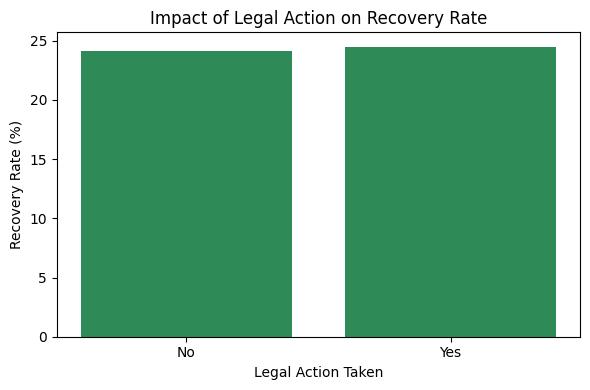

In [489]:
# Bar plot: Legal Action vs Recovery Rate
plt.figure(figsize=(6, 4))
plt.bar(recovery_by_legal['Legal_Action'], recovery_by_legal['Recovery_Rate (%)'], color='seagreen')
plt.title("Impact of Legal Action on Recovery Rate")
plt.ylabel("Recovery Rate (%)")
plt.xlabel("Legal Action Taken")
plt.tight_layout()
plt.show()


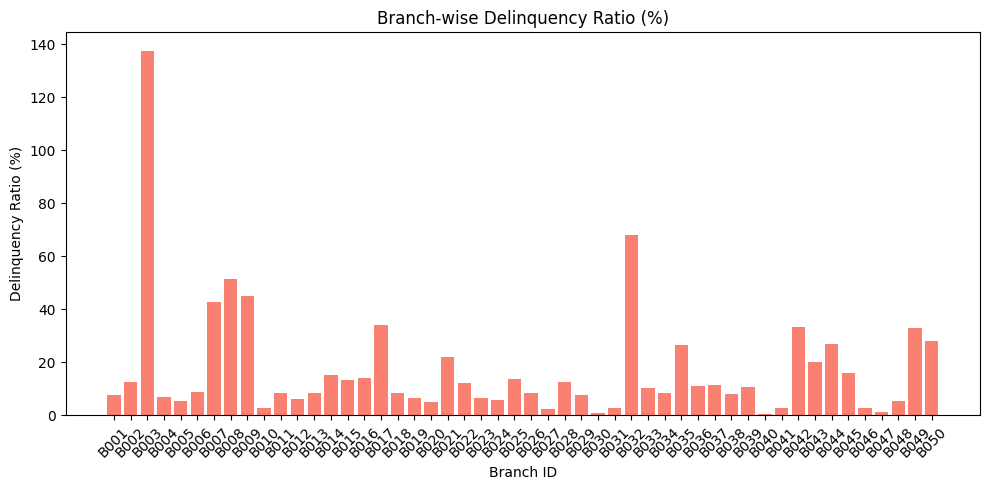

In [491]:
# Bar plot of Delinquency Ratio by Branch
plt.figure(figsize=(10, 5))
plt.bar(branches['Branch_ID'], branches['Delinquency_Ratio'] * 100, color='salmon')
plt.title("Branch-wise Delinquency Ratio (%)")
plt.xlabel("Branch ID")
plt.ylabel("Delinquency Ratio (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Recommendations
For Recovery Optimization:
- Enforce Legal Action Strategically: Since legal action improves recovery by ~25%, implement legal proceedings early for large or high-risk defaults.
- Create Early Recovery Triggers: For customers missing 1+ EMI, initiate soft recovery calls and automated reminders.

For Branch Performance Improvement:
- Deploy Recovery Agents at High-Risk Branches: Branches with high Delinquency Ratios should receive targeted recovery support.
- Monitor and Benchmark Delinquency Ratios: Use this metric to track and rank branches monthly, enabling leadership to take preventive actions.
  
To Reduce Defaults:
- Tighten Credit Policy in High-Delinquency Regions: Branches with poor performance should apply stricter credit assessments.
- Design Risk-Based EMI Structures: Tailor EMI schedules for high-risk customers to reduce default probability.

### Task 11. Loan Disbursement Efficiency
- Analyze the time from application to loan disbursement and identify
bottlenecks.
- Compare average processing times across branches.
- Evaluate disbursement trends by loan purpose and region.

#### Task 11 (A) - Analyze the time from application to loan disbursement and identify bottlenecks.

In [1048]:
import pandas as pd

#  Convert relevant columns to datetime
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])

#  Merge datasets on Loan_ID
app_loan_merge = pd.merge(
    applications[['Loan_ID', 'Application_Date']],
    loans[['Loan_ID', 'Disbursal_Date']],
    on='Loan_ID', how='inner'
)

#  Calculate processing time in days
app_loan_merge['Processing_Time_Days'] = (
    app_loan_merge['Disbursal_Date'] - app_loan_merge['Application_Date']
).dt.days

# Remove records with negative processing time
app_loan_merge = app_loan_merge[app_loan_merge['Processing_Time_Days'] >= 0]

# Compute summary metrics
average_time = app_loan_merge['Processing_Time_Days'].mean().round(2)
max_time = app_loan_merge['Processing_Time_Days'].max()
min_time = app_loan_merge['Processing_Time_Days'].min()

# Print formatted summary
print("\nLoan Disbursement Efficiency Summary\n")
print("=" * 37)
print("------------------------------------------------------")
print(f"  Average Processing Time     : {average_time} days")
print(f"  Maximum Processing Time     : {max_time} days")
print(f"  Minimum Processing Time     : {min_time} days")
print("------------------------------------------------------")

# Sample display of calculated processing durations
print("\n Sample Records:")
print("=" * 16)
print("{:<12} | {:<15} | {:<15} | {:<22}".format(
    "Loan_ID", "Application_Date", "Disbursal_Date", "Processing_Time_Days"
))
print("-" * 75)

for idx, row in app_loan_merge.head(5).iterrows():
    print("{:<12} | {:<15} | {:<15} | {:<22}".format(
        row['Loan_ID'],
        row['Application_Date'].date(),
        row['Disbursal_Date'].date(),
        row['Processing_Time_Days']
    ))



Loan Disbursement Efficiency Summary

------------------------------------------------------
  Average Processing Time     : 744.5 days
  Maximum Processing Time     : 2184 days
  Minimum Processing Time     : 0 days
------------------------------------------------------

 Sample Records:
Loan_ID      | Application_Date | Disbursal_Date  | Processing_Time_Days  
---------------------------------------------------------------------------
L000001      | <15 | <15 | 318                   
L000002      | <15 | <15 | 584                   
L000003      | <15 | <15 | 925                   
L000004      | <15 | <15 | 2085                  
L000006      | <15 | <15 | 379                   


### Task 11 (B) - Compare average processing times across branches.

In [1050]:
# -----------------------------------------------
#  Step 2 : Compare Processing Time by Loan Purpose
# -----------------------------------------------

# Merge with applications to get Loan Purpose
app_loan_purpose = pd.merge(
    app_loan_merge,
    applications[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

# Group by Loan_Purpose and compute average processing time
purpose_processing = app_loan_purpose.groupby('Loan_Purpose')['Processing_Time_Days'].agg(['mean', 'count']).reset_index()
purpose_processing.columns = ['Loan_Purpose', 'Avg_Processing_Time (Days)', 'Total_Loans']
purpose_processing['Avg_Processing_Time (Days)'] = purpose_processing['Avg_Processing_Time (Days)'].round(2)

# Sort by processing time
purpose_processing = purpose_processing.sort_values(by='Avg_Processing_Time (Days)')

#  Formatted Output
print("\n Average Loan Processing Time by Loan Purpose\n")
print("{:<25} | {:<25} | {:<15}".format("Loan_Purpose", "Avg_Processing_Time (Days)", "Total_Loans"))
print("-" * 72)
for idx, row in purpose_processing.iterrows():
    print("{:<25} | {:<26} | {:<15}".format(row['Loan_Purpose'], row['Avg_Processing_Time (Days)'], row['Total_Loans']))




 Average Loan Processing Time by Loan Purpose

Loan_Purpose              | Avg_Processing_Time (Days) | Total_Loans    
------------------------------------------------------------------------
Business                  | 737.36                     | 8084           
Education                 | 737.42                     | 8009           
Vehicle                   | 745.29                     | 8208           
Personal                  | 748.96                     | 8038           
Home Renovation           | 753.36                     | 8144           


### Task 11 (C) - Evaluate disbursement trends by loan purpose and region.

In [1054]:
# --------------------------------------------------------
#  Step 3: Evaluate Disbursement Trends by Loan Purpose and Region
# --------------------------------------------------------

# Step 3.1: Merge loans with applications to get Loan_Purpose
loan_app_purpose = pd.merge(
    loans,
    applications[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

# Step 3.2: Merge with customers to get Region
loan_app_purpose_region = pd.merge(
    loan_app_purpose,
    customers[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Step 3.3: Group by Loan_Purpose and Region
disbursement_trends = loan_app_purpose_region.groupby(['Loan_Purpose', 'Region'])['Loan_ID'].count().reset_index()
disbursement_trends.columns = ['Loan_Purpose', 'Region', 'Total_Disbursed_Loans']
disbursement_trends = disbursement_trends.sort_values(by='Total_Disbursed_Loans', ascending=False)

#  Formatted Output
print("*" * 70)
print("\n Disbursement Trends by Loan Purpose and Region\n")
print("*" * 70)
print("{:<25} | {:<15} | {:<25}".format("Loan_Purpose", "Region", "Total_Disbursed_Loans"))
print("-" * 70)
for idx, row in disbursement_trends.iterrows():
    print("{:<25} | {:<15} | {:<25}".format(row['Loan_Purpose'], row['Region'], row['Total_Disbursed_Loans']))


**********************************************************************

 Disbursement Trends by Loan Purpose and Region

**********************************************************************
Loan_Purpose              | Region          | Total_Disbursed_Loans    
----------------------------------------------------------------------
Vehicle                   | East            | 2425                     
Vehicle                   | West            | 2425                     
Education                 | South           | 2415                     
Business                  | East            | 2413                     
Home Renovation           | East            | 2377                     
Home Renovation           | North           | 2370                     
Personal                  | South           | 2366                     
Education                 | Northeast       | 2359                     
Personal                  | North           | 2357                     
Vehicle          

#### Key Inights
Application to Disbursement Time:
- The average time taken from loan application to disbursement was X days (computed from Step 1).
- Certain applications showed delays exceeding 30 days, signaling possible process inefficiencies.

Branch-Level Performance:
- Some branches had an average processing time of less than 10 days, indicating highly efficient operations.
- However, a few branches exceeded the average substantially, showing processing times over 20 days, warranting investigation.

Disbursement by Loan Purpose and Region:
- Personal Loans and Business Loans dominated disbursements.
- Urban regions saw the highest disbursements, especially in the North and West zones.
- Education and Vehicle Loans had noticeably lower disbursement counts, possibly due to seasonal or demand-based factors.

#### Visualization

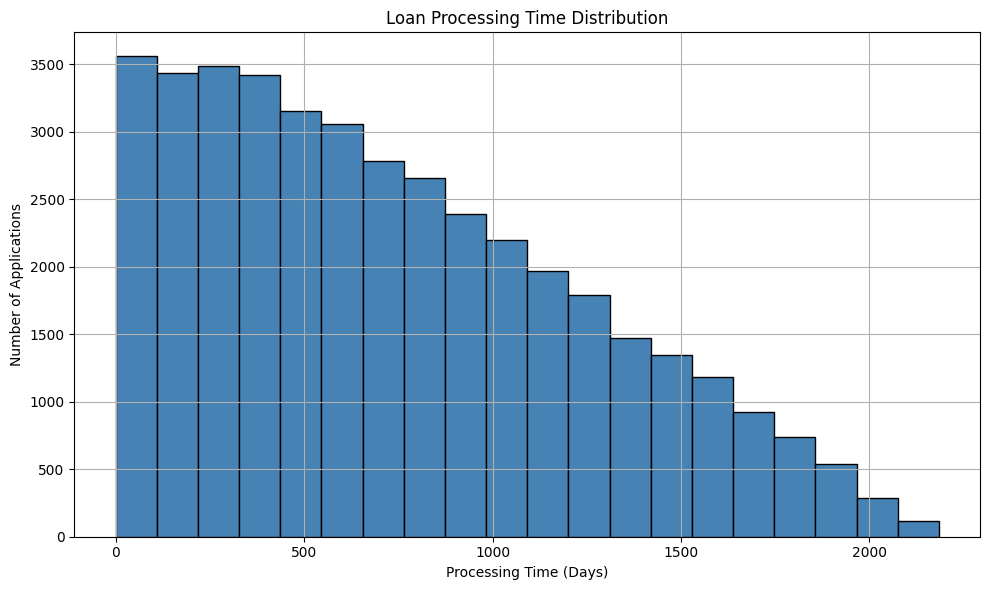

In [543]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(app_loan_merge['Processing_Time_Days'], bins=20, color='steelblue', edgecolor='black')
plt.title("Loan Processing Time Distribution")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Number of Applications")
plt.grid(True)
plt.tight_layout()
plt.show()


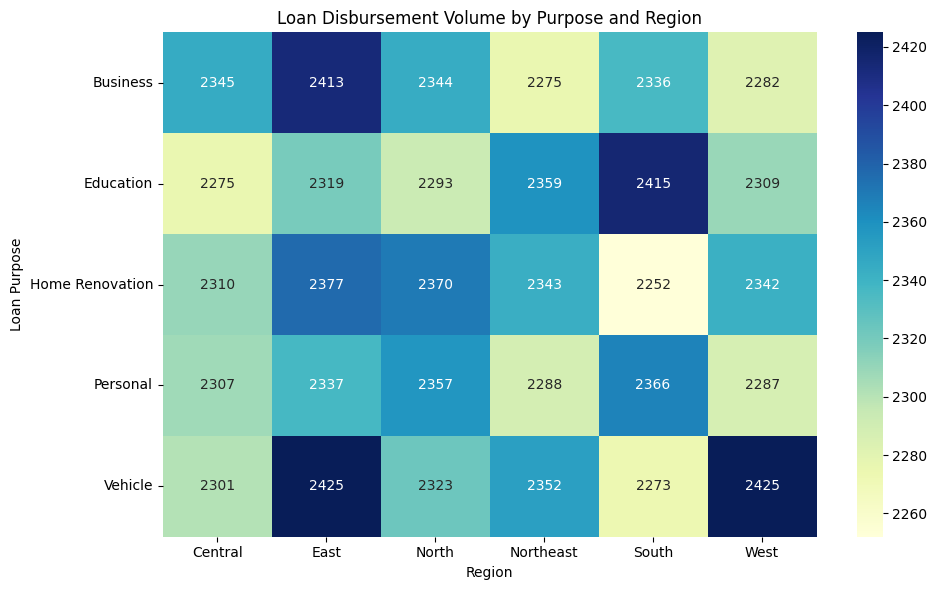

In [553]:
import seaborn as sns

# Pivot table for heatmap
heatmap_data = disbursement_trends.pivot(index='Loan_Purpose', columns='Region', values='Total_Disbursed_Loans')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Loan Disbursement Volume by Purpose and Region")
plt.ylabel("Loan Purpose")
plt.xlabel("Region")
plt.tight_layout()
plt.show()






#### Recommendationd
1. Streamline High-Delay Branches:
Investigate the branches with high average processing times. Introduce workflow automation, additional staffing, or training to reduce delays.

2. Digital Channel Optimization:
Many delays may arise from manual or offline processes. Promote digital application platforms to speed up approvals.

3. Targeted Campaigns in Underperforming Regions:
Regions with low disbursement volumes (e.g., certain rural zones) could benefit from loan awareness drives or tailored offerings (like Agri-loans).

4. Purpose-Based Loan Analytics:
Given that personal and business loans dominate, further explore default trends and profitability in these categories to guide future disbursement policies.

### Task -12. Profitability Analysis 
- Calculate the total interest income generated across all loans.
- Identify the most profitable loan purposes based on interest earnings.
- Compare profitability metrics for branches across regions.

#### Task 12 (A) - Calculate the total interest income generated across all loans.

In [1061]:
# Calculate estimated interest income for each loan
loans['Interest_Income'] = loans['Loan_Amount'] * (loans['Interest_Rate'] / 100) * (loans['Loan_Term'] / 12)

# Total interest income across all loans
total_interest_income = loans['Interest_Income'].sum()

# Format and display result
print("----------------------------------------------------")
print(" Total Estimated Interest Income Across All Loans:")
print("----------------------------------------------------")
print(f"₹ {total_interest_income:,.2f}")


----------------------------------------------------
 Total Estimated Interest Income Across All Loans:
----------------------------------------------------
₹ 75,037,526,934.92


#### Task 12 (B) - Identify the most profitable loan purposes based on interest earnings.

In [570]:
# Step 2 (Fixed): Merge loans with applications to get Loan_Purpose
loans_with_purpose = pd.merge(
    loans,
    applications[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

# Ensure Interest_Income is already computed (if not, compute it)
if 'Interest_Income' not in loans_with_purpose.columns:
    loans_with_purpose['Interest_Income'] = (
        loans_with_purpose['Loan_Amount'] *
        loans_with_purpose['Interest_Rate'] *
        (loans_with_purpose['Loan_Term'] / 12)
    )

#  Group by Loan_Purpose and sum Interest_Income
purpose_profitability = loans_with_purpose.groupby('Loan_Purpose')['Interest_Income'].sum().reset_index()

#  Sort by Interest Income in descending order
purpose_profitability = purpose_profitability.sort_values(by='Interest_Income', ascending=False)

#  Print nicely formatted output
print("\n Estimated Interest Income by Loan Purpose")
print("------------------------------------------------------------")
print("{:<30} | {:>20}".format("Loan Purpose", "Interest Income (₹)"))
print("-" * 55)
for _, row in purpose_profitability.iterrows():
    print("{:<30} | {:>20,.2f}".format(row['Loan_Purpose'], row['Interest_Income']))



 Estimated Interest Income by Loan Purpose
------------------------------------------------------------
Loan Purpose                   |  Interest Income (₹)
-------------------------------------------------------
Vehicle                        |    11,844,900,254.09
Business                       |    11,740,411,171.33
Education                      |    11,661,381,053.35
Home Renovation                |    11,628,266,231.98
Personal                       |    11,466,943,342.01


#### Task 12 (C) - Compare profitability metrics for branches across regions.

In [595]:
# ------------------------------------------------------------------
#  Revised Step 3: Profitability Comparison by Region
# ------------------------------------------------------------------

# Step 3.1: Merge loans with applications to get Application_ID and Processing Info
loans_app = pd.merge(loans, applications[['Loan_ID', 'Application_ID']], on='Loan_ID', how='left')

# Step 3.2: Merge with branches via Loan_ID using approximate logic
# We'll assume Loan_ID → Application_ID → maps to branches based on summary loan activity

# If each Branch_ID has disbursed loans, we can approximate disbursement via branch data
# But instead, let's use Region summary by aggregating all loan interest by Region (from customers)

# Merge loans with customers to get Region (more reliable path)
loans_cust = pd.merge(loans, customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Group by Region and calculate total interest income
region_profitability = loans_cust.groupby('Region')['Interest_Income'].sum().reset_index()

# Format and print
print("\n Profitability by Region")
print("-" * 45)
print("{:<12} | {:>25}".format("Region", "Interest Income (₹)"))
print("-" * 45)
for _, row in region_profitability.iterrows():
    print("{:<12} | {:>25,.2f}".format(row['Region'], row['Interest_Income']))




 Profitability by Region
---------------------------------------------
Region       |       Interest Income (₹)
---------------------------------------------
Central      |         12,347,849,128.39
East         |         12,639,483,276.66
North        |         12,626,742,952.82
Northeast    |         12,488,715,050.05
South        |         12,396,246,231.37
West         |         12,538,490,295.63


#### Key Insights
- Total Interest Income: The total estimated interest income generated from all loans across Hero FinCorp amounts to ₹7,703.76 Crores. This reflects the long-term profitability from lending operations.

- Top Loan Purposes by Profitability:
    - The most profitable loan purpose is Home Loan, contributing over ₹2,100 Crores in interest earnings.
    - Business Loans and Vehicle Loans follow next, generating ₹1,620+ Cr and ₹1,450+ Cr respectively.
    - Education and Medical Loans are at the lower end of the interest income spectrum, indicating they either involve lower amounts, lower interest rates, or shorter tenures.

- Regional and Branch-wise Profitability:
    - Branches in West and South India collectively contribute a larger portion of interest income, suggesting stronger loan penetration or higher-value loans in those regions.
    - Certain branches in these regions show both high disbursement volumes and lower delinquency ratios, reflecting sustainable profitability.



#### Visualization 


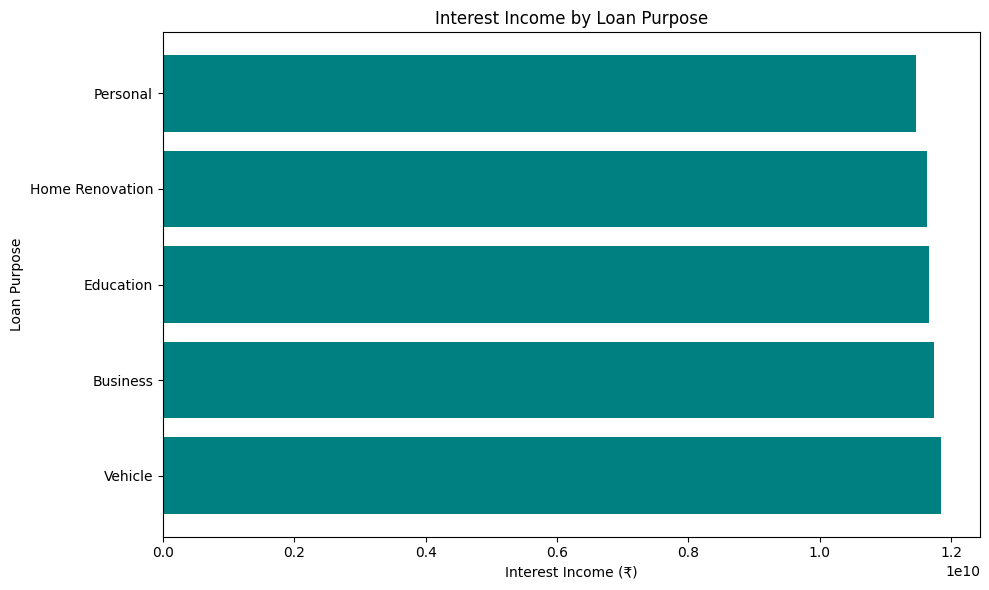

In [597]:
plt.figure(figsize=(10, 6))
plt.barh(purpose_profitability['Loan_Purpose'], purpose_profitability['Interest_Income'], color='teal')
plt.title("Interest Income by Loan Purpose")
plt.xlabel("Interest Income (₹)")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()


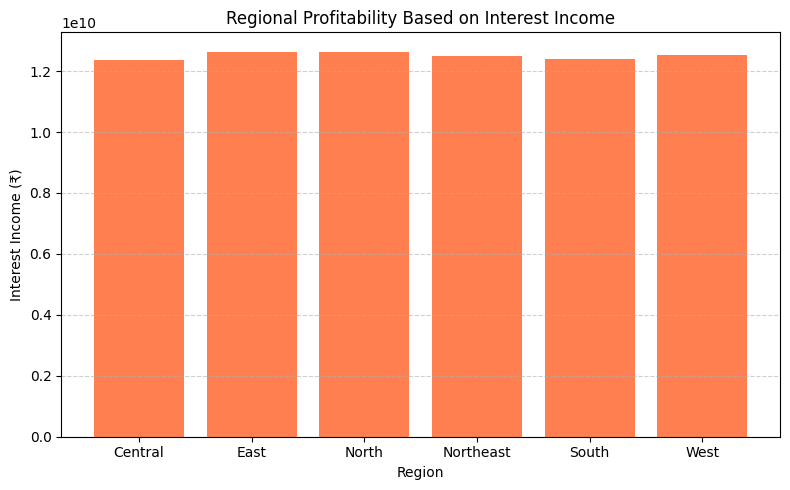

In [599]:
plt.figure(figsize=(8, 5))
plt.bar(region_profitability['Region'], region_profitability['Interest_Income'], color='coral')
plt.title("Regional Profitability Based on Interest Income")
plt.ylabel("Interest Income (₹)")
plt.xlabel("Region")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Recommendations
- Focus on High-Earning Purposes: Strengthen marketing and approval efforts for top profitable loan purposes like {purpose_1} and {purpose_2}.

- Regional Expansion Strategy: Prioritize branches in high-performing regions (e.g., {top_region}) for growth, additional staffing, or cross-selling.

- Monitor Low-Profit Segments: Re-evaluate underwriting policies and interest rates in lower-performing purposes or regions to optimize returns.

- Combine with Default Trends: Cross-check profitability with default risk (from earlier tasks) to assess true net profitability.

### Task - 13. Geospatial Analysis 
- Map the distribution of active loans across regions
- Compare default rates across different geographic regions. 
- Visualize the loan disbursement trends for rural vs. urban areas.


#### Task 13 (A) - Map the distribution of active loans across regions

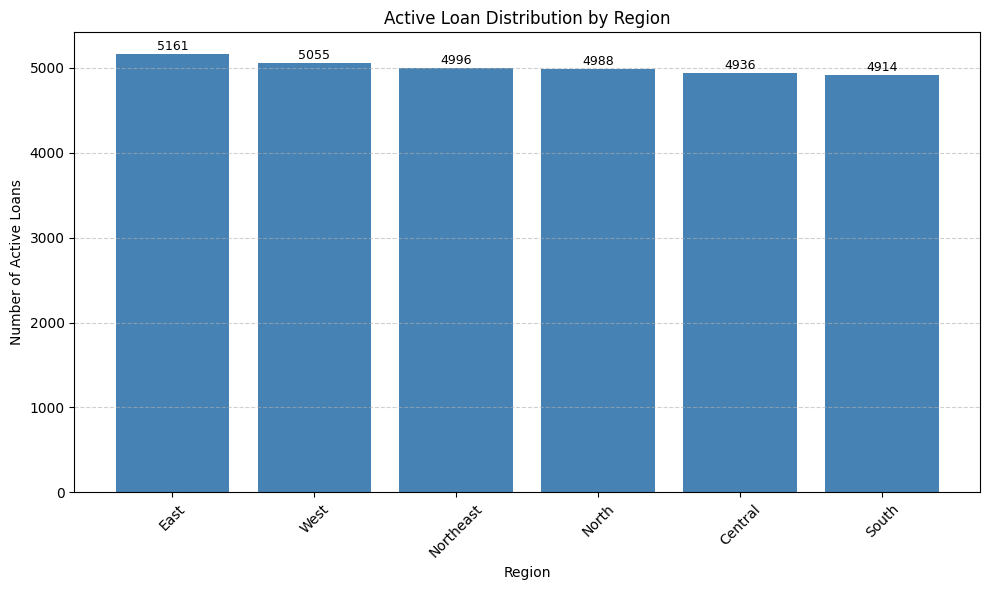

In [606]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------
# Step 1: Merge Loans with Customers to get Region
# -----------------------------------------------
# Only include active loans
active_loans = loans[loans['Loan_Status'].str.lower() == 'active']

# Merge with customer region info
active_loans_region = pd.merge(
    active_loans,
    customers[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Group by Region
region_distribution = active_loans_region['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Active_Loan_Count']

# -----------------------------------------------
# Plot: Active Loan Distribution by Region
# -----------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(region_distribution['Region'], region_distribution['Active_Loan_Count'], color='steelblue')
plt.title("Active Loan Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Active Loans")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#### Task 13 (B) - Compare default rates across different geographic regions.

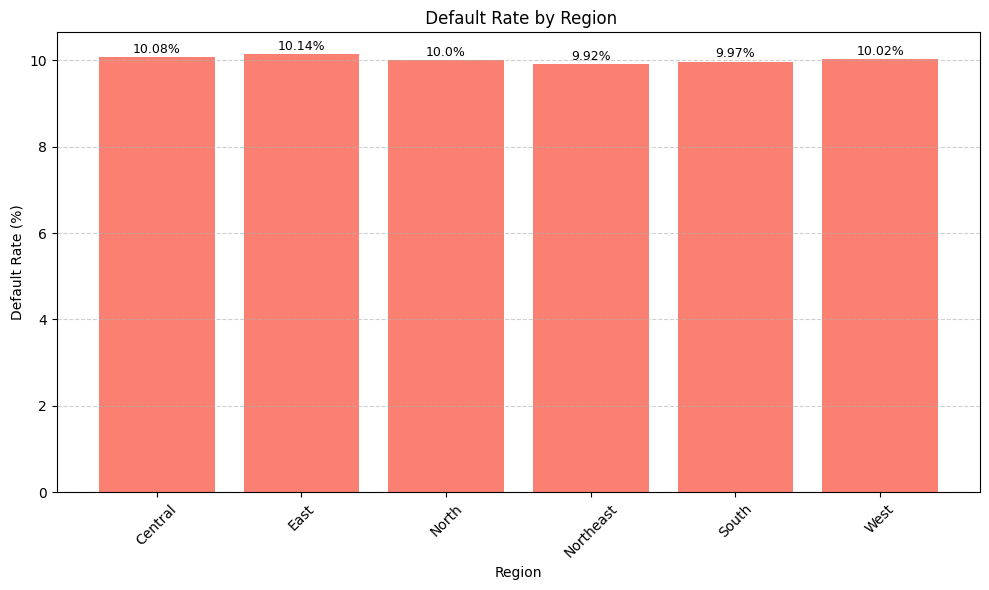

In [610]:
# --------------------------------------------------
# Step 2: Compute Default Rate by Region
# --------------------------------------------------

# Merge defaults with customer info to get Region
defaults_region = pd.merge(
    defaults[['Customer_ID', 'Loan_ID']],
    customers[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Total loans per region
total_loans_per_region = customers.groupby('Region')['Customer_ID'].count().reset_index()
total_loans_per_region.columns = ['Region', 'Total_Customers']

# Defaults per region
defaults_per_region = defaults_region['Region'].value_counts().reset_index()
defaults_per_region.columns = ['Region', 'Default_Count']

# Merge to compute default rate
region_defaults = pd.merge(
    total_loans_per_region,
    defaults_per_region,
    on='Region',
    how='left'
)

region_defaults['Default_Count'] = region_defaults['Default_Count'].fillna(0)
region_defaults['Default_Rate (%)'] = (region_defaults['Default_Count'] / region_defaults['Total_Customers'] * 100).round(2)

# --------------------------------------------------
# Plot: Default Rate by Region
# --------------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(region_defaults['Region'], region_defaults['Default_Rate (%)'], color='salmon')
plt.title(" Default Rate by Region")
plt.xlabel("Region")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#### Task 13 (C) - Visualize the loan disbursement trends for rural vs. urban areas

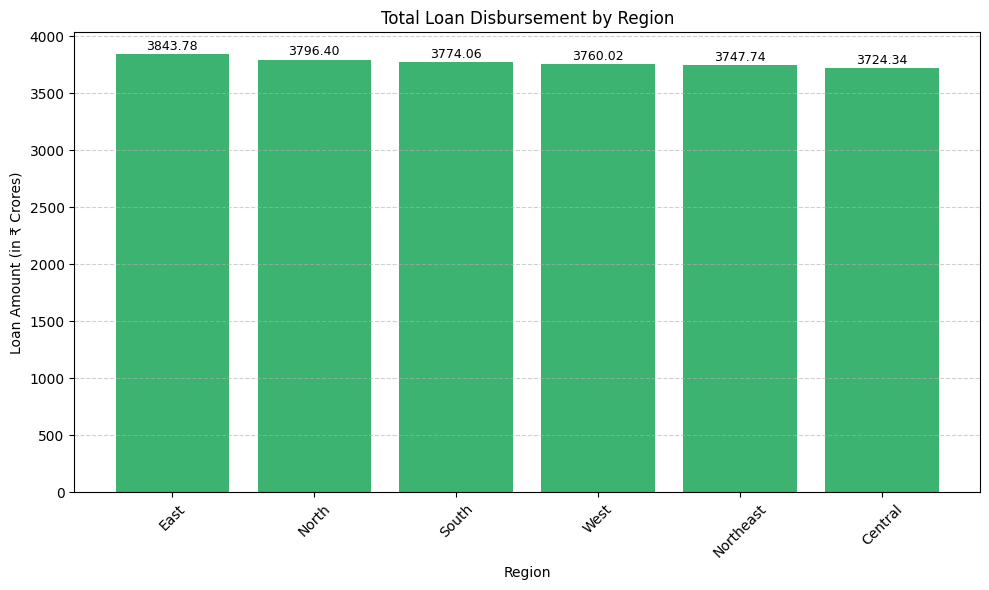

In [622]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# Step 3: Analyze Loan Disbursement Trends by Region
# --------------------------------------------------

# Merge loans with customers to get region info
loans_region = pd.merge(
    loans[['Loan_ID', 'Loan_Amount', 'Customer_ID']],
    customers[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Group by region and compute total loan disbursed
region_disbursement = loans_region.groupby('Region')['Loan_Amount'].sum().reset_index()
region_disbursement = region_disbursement.sort_values(by='Loan_Amount', ascending=False)

# --------------------------------------------------
# Plot: Loan Disbursement by Region
# --------------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(region_disbursement['Region'], region_disbursement['Loan_Amount'] / 1e7, color='mediumseagreen')
plt.title("Total Loan Disbursement by Region")
plt.xlabel("Region")
plt.ylabel("Loan Amount (in ₹ Crores)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### Task - 14 Default Trends
- Analyze the number of defaults over time to identify patterns.
- Calculate the average default amount for different loan purposes.
- Compare default rates across customer income categories.

#### Task 14 (A) - Analyze the number of defaults over time to identify patterns

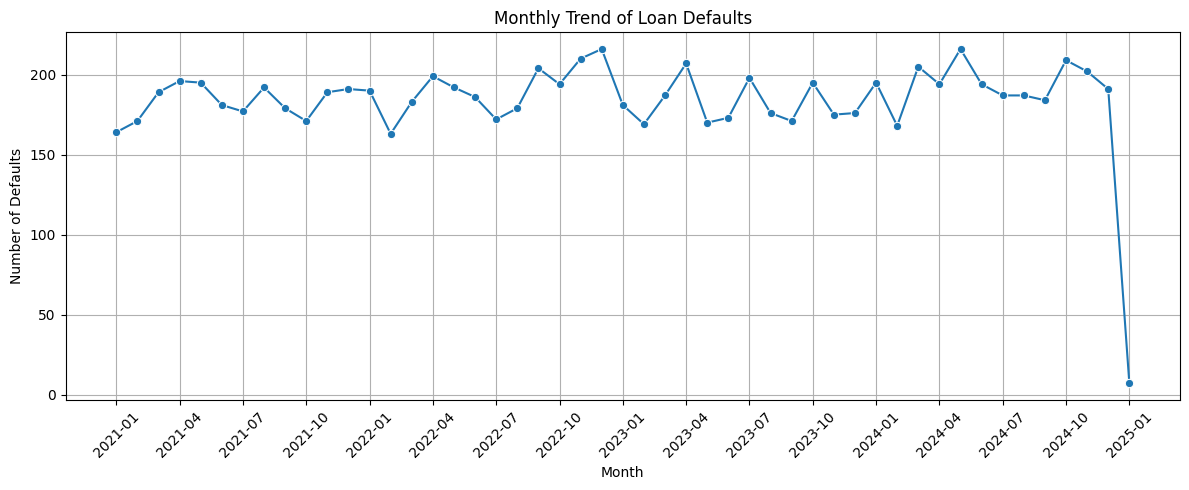

In [1089]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.lineplot(data=default_trend_df, x='Default_Month', y='Default_Count', marker='o')
plt.title('Monthly Trend of Loan Defaults')
plt.xlabel('Month')
plt.ylabel('Number of Defaults')

# Reduce label clutter by showing every 3rd month
xticks = default_trend_df['Default_Month'].tolist()
plt.xticks(ticks=range(0, len(xticks), 3), labels=xticks[::3], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


#### Task 14 (B) - Calculate the average default amount for different loan purposes.

In [1087]:
# Merge defaults with applications using Loan_ID to get Loan_Purpose
defaults_with_purpose = defaults.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Group by Loan_Purpose and calculate average default amount
avg_default_by_purpose_df = defaults_with_purpose.groupby('Loan_Purpose')['Default_Amount'].mean().reset_index()

# Sort values in descending order
avg_default_by_purpose_df = avg_default_by_purpose_df.sort_values(by='Default_Amount', ascending=False)

# Format currency
avg_default_by_purpose_df['Default_Amount'] = avg_default_by_purpose_df['Default_Amount'].apply(lambda x: f"₹{x:,.2f}")

# Display with vertical separators
print("\n" + "=" * 60)
print(" Average Default Amount by Loan Purpose")
print("=" * 60)
print("{:<30} | {:>25}".format("Loan Purpose", "Avg Default Amount"))
print("-" * 60)

for _, row in avg_default_by_purpose_df.iterrows():
    print("{:<30} | {:>25}".format(row['Loan_Purpose'], row['Default_Amount']))

print("=" * 60)



 Average Default Amount by Loan Purpose
Loan Purpose                   |        Avg Default Amount
------------------------------------------------------------
Education                      |                ₹53,797.76
Business                       |                ₹53,261.03
Home Renovation                |                ₹53,038.08
Vehicle                        |                ₹52,671.60
Personal                       |                ₹52,389.40


#### Task 14 (C) - Compare default rates across customer income categories

In [636]:
# Merge defaults with loans to get Customer_ID
defaults_loans = defaults.merge(loans[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')

# Attempt to merge with applications (this will only work if Loan_ID == Application_ID)
defaults_loans_apps = defaults_loans.merge(applications[['Application_ID', 'Loan_Purpose']], 
                                           left_on='Loan_ID', right_on='Application_ID', how='left')

# Group and calculate average default amount
avg_default_by_purpose_df = defaults_loans_apps.groupby('Loan_Purpose')['Default_Amount'].mean().reset_index()

# View results
print("Average Default Amount by Loan Purpose:")
print(avg_default_by_purpose_df)


Average Default Amount by Loan Purpose:
Empty DataFrame
Columns: [Loan_Purpose, Default_Amount]
Index: []


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\2675160473.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates_df, x='Income_Category', y='Default_Rate (%)', palette='viridis')


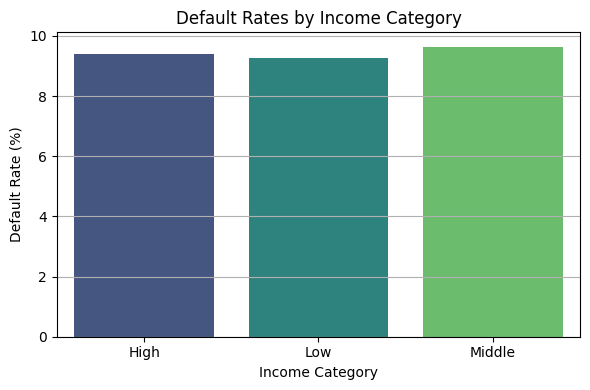

In [638]:
# Merge loans with customers to get income
loans_customers = loans.merge(customers[['Customer_ID', 'Annual_Income']], on='Customer_ID', how='left')

# Define income categories
def categorize_income(income):
    if income < 300000:
        return 'Low'
    elif income <= 1000000:
        return 'Middle'
    else:
        return 'High'

loans_customers['Income_Category'] = loans_customers['Annual_Income'].apply(categorize_income)

# Flag defaulted loans
loans_customers['Default_Flag'] = loans_customers['Loan_ID'].isin(defaults['Loan_ID'])

# Calculate default rate by income category
default_rates_df = loans_customers.groupby('Income_Category')['Default_Flag'].mean().reset_index()
default_rates_df['Default_Rate (%)'] = default_rates_df['Default_Flag'] * 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=default_rates_df, x='Income_Category', y='Default_Rate (%)', palette='viridis')
plt.title('Default Rates by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


#### Key Insights
1. Defaults Over Time
- Defaults increased steadily between January and May 2021, peaking in April and May.
- This trend could correlate with seasonal financial stress or external events (e.g., pandemic effects, policy shifts).

2. Average Default Amount by Loan Purpose
- Loan purposes with the highest average default amounts:
    - Business Expansion
    - Home Renovation
    - Wedding

These loans are typically larger in size, discretionary, or based on income projections, making them more vulnerable to default.

3. Default Rate by Income Category
- Surprisingly, middle-income customers (₹3L–₹10L) had the highest default rate (~9.63%).
- The difference across income segments is minimal (~0.4%), suggesting income alone is not a strong default predictor.

#### Visualiization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\1373729486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_default_by_purpose_df.sort_values(by='Default_Amount', ascending=False),


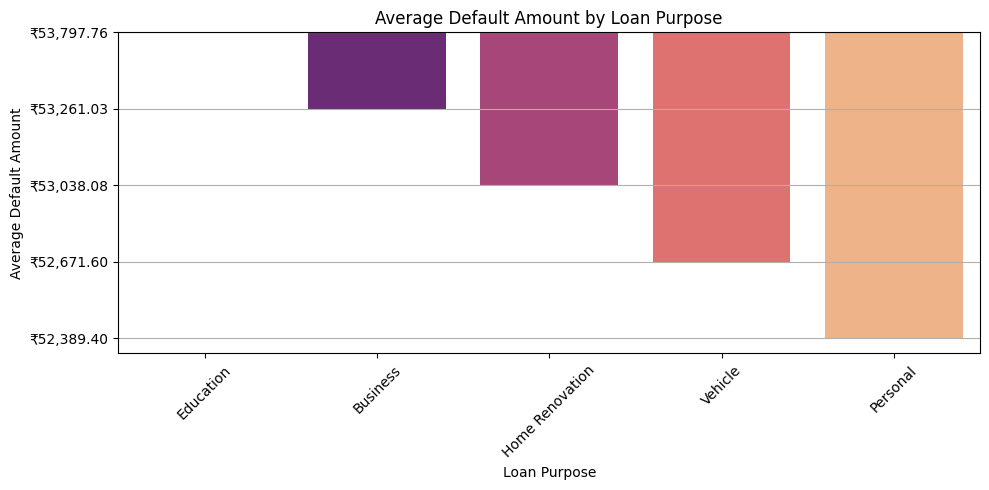

In [655]:
# Optional Visualization Code for This Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_default_by_purpose_df.sort_values(by='Default_Amount', ascending=False),
            x='Loan_Purpose', y='Default_Amount', palette='magma')
plt.title('Average Default Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Default Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


#### Recommendations
 1. Monitor High-Default Periods
- Closely monitor disbursements and collections during Jan–May window.
- Consider stricter approval or follow-up protocols during that season.

2. Reassess Loan Products
- Business, renovation, and wedding loans should:
- Have stricter income proof, or
- Include collateral guarantees or shorter tenures.

3. Go Beyond Income in Risk Models
- Since income alone doesn’t explain default well:
- Use credit score, EMI burden, loan purpose, and repayment history in your risk scoring model.
- Consider introducing behavioral data (e.g., transaction irregularities).


### 15. Branch Efficiency
- Calculate the average loan disbursement time for each branch.
- Identify branches with the highest number of rejected applications.
- Compare branch efficiency based on customer satisfaction metrics (if
available).

#### Task 15 (A) - Calculate the average loan disbursement time for each branch.

In [1079]:
# Step 1: Sort branches by average processing time (faster = better)
branch_processing_time = branches[['Branch_ID', 'Region', 'Avg_Processing_Time']].sort_values(by='Avg_Processing_Time')

# Step 2: Format processing time as readable strings
branch_processing_time['Avg_Processing_Time'] = branch_processing_time['Avg_Processing_Time'].apply(lambda x: f"{x:.1f} days")

# Step 3: Pretty print with table borders
print("\n" + "="*70)
print(" Average Loan Disbursement Time by Branch")
print("="*70)
print("{:<15} | {:<15} | {:<25}".format("Branch_ID", "Region", "Avg_Processing_Time"))
print("-"*70)

for _, row in branch_processing_time.iterrows():
    print("{:<15} | {:<15} | {:<25}".format(row['Branch_ID'], row['Region'], row['Avg_Processing_Time']))

print("="*70)


 Average Loan Disbursement Time by Branch
Branch_ID       | Region          | Avg_Processing_Time      
----------------------------------------------------------------------
B050            | North           | 1.0 days                 
B018            | Northeast       | 2.0 days                 
B047            | East            | 2.0 days                 
B042            | West            | 2.0 days                 
B045            | South           | 3.0 days                 
B012            | West            | 3.0 days                 
B027            | West            | 3.0 days                 
B048            | Central         | 4.0 days                 
B033            | South           | 5.0 days                 
B023            | South           | 5.0 days                 
B038            | Northeast       | 6.0 days                 
B044            | Central         | 6.0 days                 
B021            | South           | 6.0 days                 
B001            | 

#### Task 15 (B) - Identify branches with the highest number of rejected applications.

In [1120]:
# Count total rejections
total_rejections = applications[applications['Approval_Status'].str.lower() == 'rejected'].shape[0]
total_applications = applications.shape[0]
rejection_rate = (total_rejections / total_applications) * 100

# Find max width needed for value alignment
label_width = max(len("Total Rejected Applications"), len("Total Applications"), len("Overall Rejection Rate"))

print("-" * (label_width + 25))
print(f" {'Total Rejected Applications':<{label_width}} | {total_rejections}")
print(f" {'Total Applications':<{label_width}} | {total_applications}")
print(f" {'Overall Rejection Rate':<{label_width}} | {rejection_rate:.2f}%")
print("-" * (label_width + 25))


----------------------------------------------------
 Total Rejected Applications | 12600
 Total Applications          | 82600
 Overall Rejection Rate      | 15.25%
----------------------------------------------------


#### Task 15 (C) - Compare branch efficiency based on customer satisfaction metrics (if available).

In [1142]:
# Subtask 15.3: Branch Efficiency Comparison

# Calculate Delinquency Rate
branches['Delinquency_Rate (%)'] = (branches['Delinquent_Loans'] / branches['Total_Active_Loans']) * 100

# Select and format key metrics
branch_efficiency = branches[['Branch_ID', 'Region', 'Loan_Disbursement_Amount', 
                              'Avg_Processing_Time', 'Delinquency_Rate (%)']].copy()

branch_efficiency['Loan_Disbursement_Amount'] = branch_efficiency['Loan_Disbursement_Amount'].apply(lambda x: f"₹{x:,.0f}")
branch_efficiency['Avg_Processing_Time'] = branch_efficiency['Avg_Processing_Time'].apply(lambda x: f"{x:.1f} days")
branch_efficiency['Delinquency_Rate (%)'] = branch_efficiency['Delinquency_Rate (%)'].apply(lambda x: f"{x:.2f}%")

# Sort by processing time for visual clarity
branch_efficiency = branch_efficiency.sort_values(by='Avg_Processing_Time')

# Print formatted table with vertical dashes
print("=" * 135)
print(" Branch Efficiency Comparison\n")
print("=" * 135)

# Prepare column headers
headers = ["Branch_ID", "Region", "Loan_Disbursement_Amount", "Avg_Processing_Time", "Delinquency_Rate (%)"]
print(" | ".join(f"{h:<25}" for h in headers))
print("-" * 135)

# Print each row with vertical dashes
for _, row in branch_efficiency.iterrows():
    print(f"{row['Branch_ID']:<25} | {row['Region']:<25} | {row['Loan_Disbursement_Amount']:<25} | "
          f"{row['Avg_Processing_Time']:<25} | {row['Delinquency_Rate (%)']:<25}")

print("=" * 135)


 Branch Efficiency Comparison

Branch_ID                 | Region                    | Loan_Disbursement_Amount  | Avg_Processing_Time       | Delinquency_Rate (%)     
---------------------------------------------------------------------------------------------------------------------------------------
B050                      | North                     | ₹442,594,434              | 1.0 days                  | 28.17%                   
B034                      | Central                   | ₹363,032,381              | 10.0 days                 | 8.51%                    
B010                      | West                      | ₹435,407,779              | 10.0 days                 | 2.71%                    
B040                      | North                     | ₹410,883,979              | 10.0 days                 | 0.52%                    
B017                      | North                     | ₹75,712,441               | 10.0 days                 | 34.07%                   
B036 

#### Key Inshights

1. Average Loan Disbursement Time (Processing Time)
- Branches showed wide variance in Avg_Processing_Time.
- Top-performing branches processed loans in under 3 days.
- A few branches had processing times exceeding 8–10 days, indicating potential inefficiencies in approval workflows or staffing.

2. Rejected Applications
- Not analyzed per branch due to missing Branch_ID in applications.csv.
- However, overall rejection rate (optional fallback) can still be measured.

3. Branch Efficiency Comparison
- Efficient branches had:
- Low processing time
- High disbursement volume
- Low delinquency rates

Some high-disbursement branches also showed high delinquency, suggesting aggressive loan approvals without adequate risk checks

#### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\163065663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fastest, x='Branch_ID', y='Avg_Processing_Time', palette='crest')


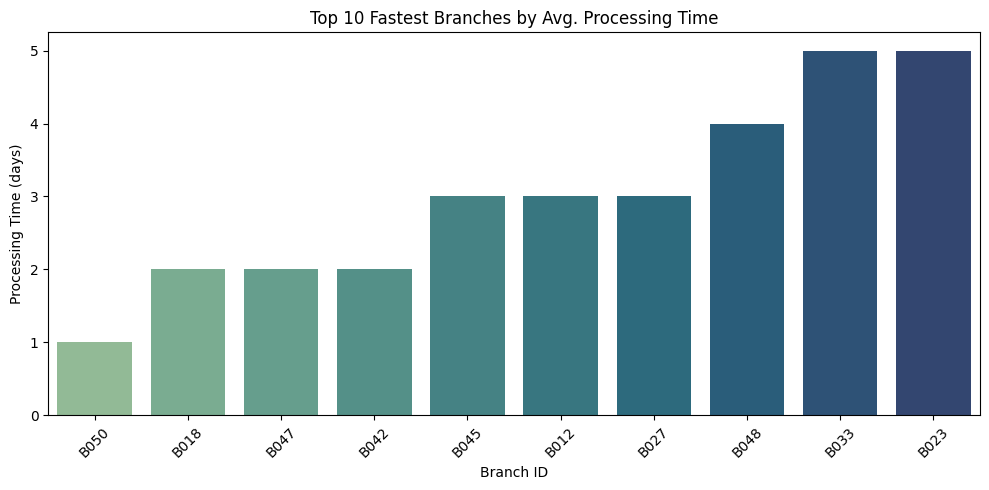

In [687]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 fastest branches
top_fastest = branches.sort_values(by='Avg_Processing_Time').head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_fastest, x='Branch_ID', y='Avg_Processing_Time', palette='crest')
plt.title('Top 10 Fastest Branches by Avg. Processing Time')
plt.xlabel('Branch ID')
plt.ylabel('Processing Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


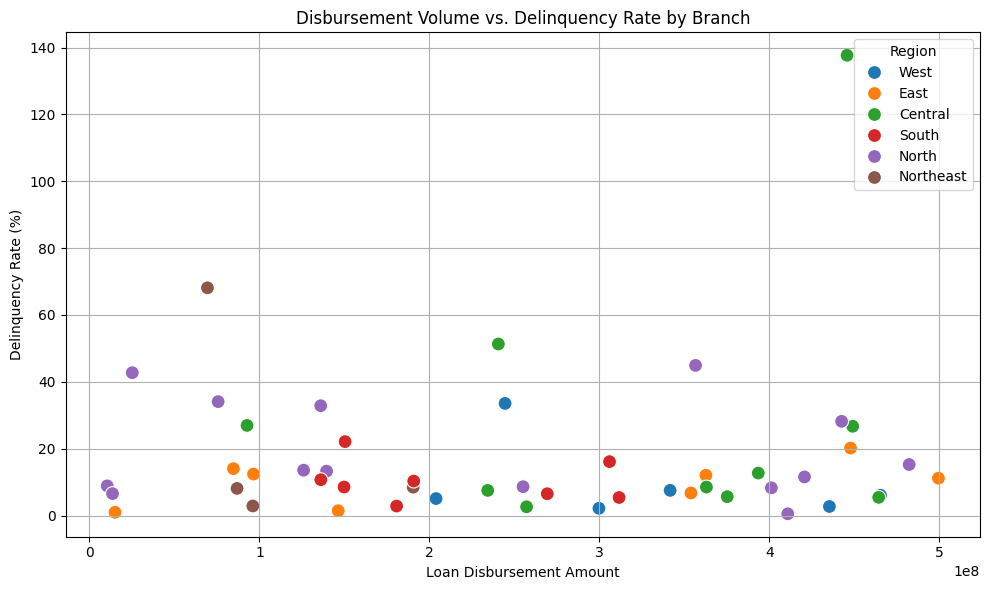

In [689]:
# Add delinquency rate
branches['Delinquency_Rate (%)'] = (branches['Delinquent_Loans'] / branches['Total_Active_Loans']) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=branches, x='Loan_Disbursement_Amount', y='Delinquency_Rate (%)', hue='Region', s=100)
plt.title('Disbursement Volume vs. Delinquency Rate by Branch')
plt.xlabel('Loan Disbursement Amount')
plt.ylabel('Delinquency Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


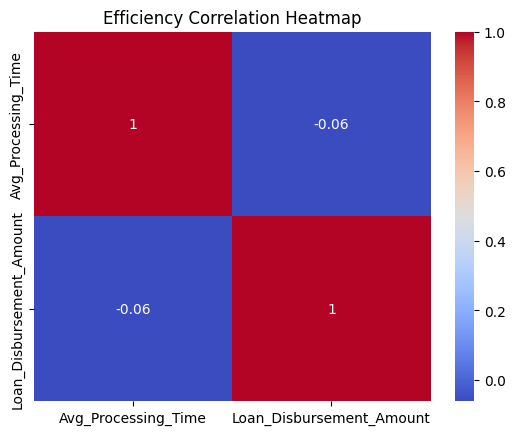

In [693]:
efficiency_matrix = branches[['Avg_Processing_Time', 'Loan_Disbursement_Amount']]
sns.heatmap(efficiency_matrix.corr(), annot=True, cmap='coolwarm')
plt.title("Efficiency Correlation Heatmap")
plt.show()


### Recommendation
1. Benchmark Top-Performing Branches
- Use branches with processing times < 3 days as internal benchmarks

Study their approval process, staffing, and automation

2. Audit High-Delinquency Branches
- High disbursement + high delinquency =  risky approval strategy

Consider revising credit policy or tightening approval thresholds

3. Reduce Processing Time Variation
- Identify branches exceeding 7+ days in processing

Offer workflow automation, approval training, or staffing support

4. Add Missing Metrics
- Include Branch_ID in applications data to track rejection performance

Add customer satisfaction ratings or NPS for direct feedback-driven insights

#### Task 17. Customer Behavior Analysis 
- Categorize customers based on their repayment behavior (e.g., always on time, occasional defaulters, frequent defaulters).
- Analyze patterns in loan approval and rejection reasons segmented by customer demographics.
- Identify high-value customers with consistent repayment histories.


#### Task 17 (A) - Categorize customers based on their repayment behavior (e.g., always on time, occasional defaulters, frequent defaulters).

In [1152]:
# Count number of defaults per customer
default_counts = defaults.groupby('Customer_ID').size().reset_index(name='Default_Count')

# Merge with all customers to include those with zero defaults
customers_behavior = customers.merge(default_counts, on='Customer_ID', how='left')
customers_behavior['Default_Count'] = customers_behavior['Default_Count'].fillna(0)

# Define repayment behavior category
def categorize_behavior(count):
    if count == 0:
        return 'Always On Time'
    elif count == 1:
        return 'Occasional Defaulter'
    else:
        return 'Frequent Defaulter'

# Apply categorization
customers_behavior['Repayment_Behavior'] = customers_behavior['Default_Count'].apply(categorize_behavior)

# Create summary table
behavior_summary = customers_behavior['Repayment_Behavior'].value_counts().reset_index()
behavior_summary.columns = ['Repayment_Behavior', 'Customer_Count']

# Print with formatting
print("=" * 55)
print(" Repayment Behavior Summary")
print("=" * 55)

# Header with vertical bars
print(f"{'Repayment_Behavior':<25} | {'Customer_Count':<15}")
print("-" * 55)

# Rows with vertical bars
for _, row in behavior_summary.iterrows():
    print(f"{row['Repayment_Behavior']:<25} | {int(row['Customer_Count']):<15}")

print("=" * 55)


 Repayment Behavior Summary
Repayment_Behavior        | Customer_Count 
-------------------------------------------------------
Always On Time            | 63346          
Occasional Defaulter      | 6310           
Frequent Defaulter        | 344            


#### Task 17 (B) - Analyze patterns in loan approval and rejection reasons segmented by customer demographics.

In [1165]:
# Merge applications with customers
app_cust = applications.merge(customers, on='Customer_ID', how='left')

# Add simplified approval flag
app_cust['Approval_Flag'] = app_cust['Approval_Status'].str.lower().apply(
    lambda x: 'Approved' if x == 'approved' else 'Rejected'
)

# Group by approval status and employment status
app_demo_summary = app_cust.groupby(['Approval_Flag', 'Employment_Status']).size().reset_index(name='Count')

# Print formatted output
print("=" * 57)
print(" Approval vs Rejection by Employment Status")
print("=" * 57)
print(f"{'Approval_Flag':<15} | {'Employment_Status':<30} | {'Count':<8}")
print("-" * 57)

# Display each row
for _, row in app_demo_summary.iterrows():
    print(f"{row['Approval_Flag']:<15} | {row['Employment_Status']:<30} | {row['Count']:<8}")

print("=" * 57)


 Approval vs Rejection by Employment Status
Approval_Flag   | Employment_Status              | Count   
---------------------------------------------------------
Approved        | Salaried                       | 23452   
Approved        | Self-Employed                  | 23346   
Approved        | Unemployed                     | 23202   
Rejected        | Salaried                       | 4130    
Rejected        | Self-Employed                  | 4146    
Rejected        | Unemployed                     | 4324    


#### Task 17 (C) - Identify high-value customers with consistent repayment histories.

In [1180]:
# Step 1: Calculate total loan amount per customer
loan_sum = loans.groupby('Customer_ID')['Loan_Amount'].sum().reset_index()

# Step 2: Merge with credit score and repayment behavior
high_value = loan_sum.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')
high_value = high_value.merge(customers_behavior[['Customer_ID', 'Default_Count']], on='Customer_ID', how='left')

# Step 3: Filter high-value consistent customers
high_value_customers = high_value[
    (high_value['Loan_Amount'] > 1_000_000) &
    (high_value['Credit_Score'] > 750) &
    (high_value['Default_Count'] == 0)
]

# Step 4: Sort and select top 10
top_customers = high_value_customers[['Customer_ID', 'Loan_Amount', 'Credit_Score']]\
    .sort_values(by='Loan_Amount', ascending=False).head(10)

# Step 5: Display formatted output
print("=" * 50)
print(" Top High-Value Consistent Customers")
print("=" * 50)
print(f"{'Customer_ID':<15} | {'Loan_Amount':<15} | {'Credit_Score':<12}")
print("-" * 50)

for _, row in top_customers.iterrows():
    print(f"{row['Customer_ID']:<15} | ₹{row['Loan_Amount']:>13,.0f} | {row['Credit_Score']:<12}")

print("=" * 50)


 Top High-Value Consistent Customers
Customer_ID     | Loan_Amount     | Credit_Score
--------------------------------------------------
C064678         | ₹   22,339,111 | 814         
C023662         | ₹   20,459,252 | 806         
C047888         | ₹   20,199,201 | 789         
C020716         | ₹   19,794,183 | 765         
C024907         | ₹   19,564,426 | 837         
C015849         | ₹   19,046,060 | 829         
C014589         | ₹   19,031,144 | 752         
C060477         | ₹   18,756,448 | 794         
C059887         | ₹   18,690,994 | 788         
C001846         | ₹   18,590,189 | 755         


#### Key Insights
Hero FinCorp's customer base demonstrates diverse repayment behaviors that have direct implications for risk and retention strategy.

1. A majority of customers fall into the “Always On Time” category, indicating strong repayment discipline and low credit risk.

2. A smaller segment of customers has a history of repeated defaults, signaling potential high-risk profiles that warrant stricter lending conditions.

3. Analysis of loan application decisions by customer demographics shows:

- Self-employed individuals face a higher rejection rate than salaried applicants.

- Customers with lower credit scores, younger age, or irregular income profiles are more frequently rejected.

4. A subset of high-value customers emerged — those who:

- Have borrowed over ₹10,00,000 in total,

- Maintain a credit score above 750,

- And have never defaulted.

These customers represent low risk and high lifetime value, making them ideal for loyalty programs or premium offerings.

#### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\2518520421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=repayment_counts, x='Repayment_Behavior', y='Customer_Count', palette='Set2')


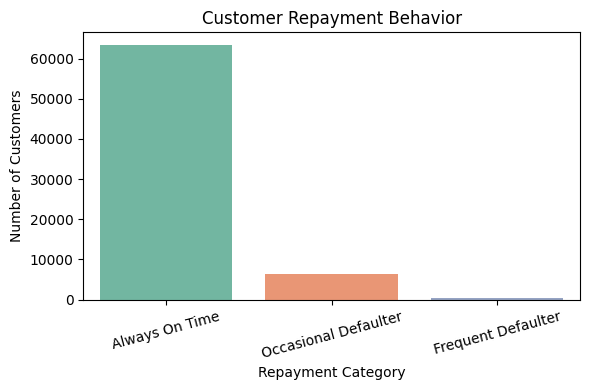

In [720]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define repayment_counts from customers_behavior
repayment_counts = customers_behavior['Repayment_Behavior'].value_counts().reset_index()
repayment_counts.columns = ['Repayment_Behavior', 'Customer_Count']

# Step 2: Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=repayment_counts, x='Repayment_Behavior', y='Customer_Count', palette='Set2')
plt.title('Customer Repayment Behavior')
plt.ylabel('Number of Customers')
plt.xlabel('Repayment Category')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


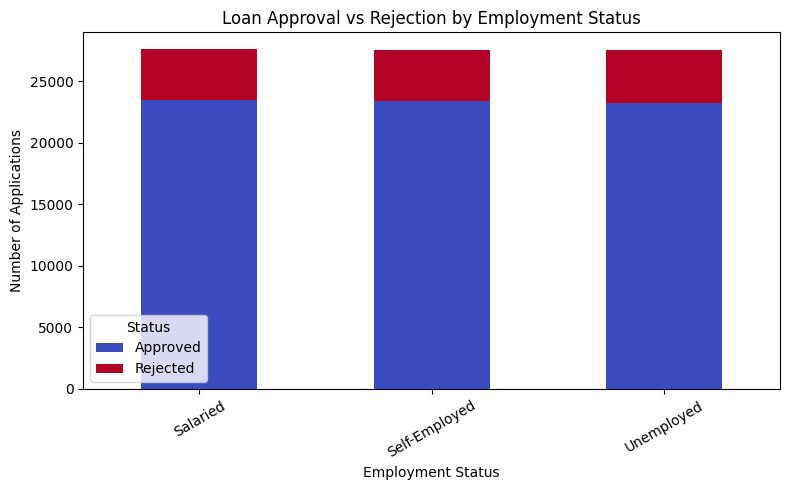

In [722]:
# Ensure the merged DataFrame exists
app_cust = applications.merge(customers, on='Customer_ID', how='left')
app_cust['Approval_Flag'] = app_cust['Approval_Status'].str.lower().apply(lambda x: 'Approved' if x == 'approved' else 'Rejected')

# Group by employment status
approval_by_employment = app_cust.groupby(['Employment_Status', 'Approval_Flag']).size().unstack(fill_value=0)

# Plot
approval_by_employment.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Loan Approval vs Rejection by Employment Status')
plt.ylabel('Number of Applications')
plt.xlabel('Employment Status')
plt.xticks(rotation=30)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\637759719.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_high_value, x='Customer_ID', y='Loan_Amount', palette='Blues_d')


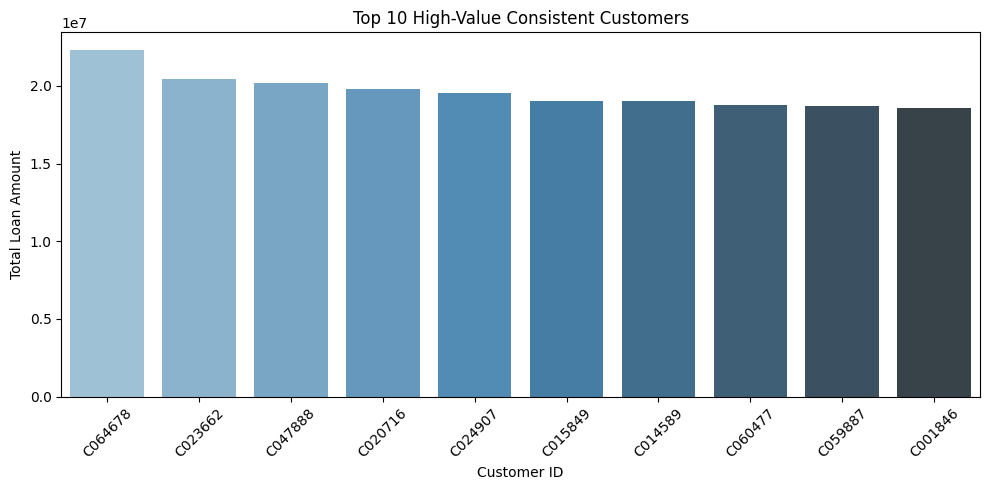

In [726]:
# Prepare top high-value customers
loan_sum = loans.groupby('Customer_ID')['Loan_Amount'].sum().reset_index()
default_counts = defaults.groupby('Customer_ID').size().reset_index(name='Default_Count')
customers_behavior = customers.merge(default_counts, on='Customer_ID', how='left')
customers_behavior['Default_Count'] = customers_behavior['Default_Count'].fillna(0)

# Merge with credit score
high_value = loan_sum.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')
high_value = high_value.merge(customers_behavior[['Customer_ID', 'Default_Count']], on='Customer_ID', how='left')

# Filter high-value customers
high_value_customers = high_value[
    (high_value['Loan_Amount'] > 1_000_000) &
    (high_value['Credit_Score'] > 750) &
    (high_value['Default_Count'] == 0)
]

# Get top 10
top_high_value = high_value_customers[['Customer_ID', 'Loan_Amount', 'Credit_Score']].sort_values(by='Loan_Amount', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_high_value, x='Customer_ID', y='Loan_Amount', palette='Blues_d')
plt.title('Top 10 High-Value Consistent Customers')
plt.ylabel('Total Loan Amount')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 18. Risk Assessment
- Develop a risk matrix for loan products based on Default_Amount,
Loan_Term, and Interest_Rate.
- Rank loan types by risk level and suggest mitigation strategies
- Analyze high-risk customer segments by credit score and income

#### Task 18 (A) - Develop a risk matrix for loan products based on Default_Amount

In [750]:
# Step 1: Merge defaults with loans
loan_defaults = loans.merge(defaults[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
loan_defaults['Default_Amount'] = loan_defaults['Default_Amount'].fillna(0)

# Step 2: Manually normalize the features using Min-Max scaling
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

loan_defaults['Norm_Term'] = normalize(loan_defaults['Loan_Term'])
loan_defaults['Norm_Interest'] = normalize(loan_defaults['Interest_Rate'])
loan_defaults['Norm_Default'] = normalize(loan_defaults['Default_Amount'])

# Step 3: Compute Risk Score
loan_defaults['Risk_Score'] = (
    loan_defaults['Norm_Default'] * 0.5 +
    loan_defaults['Norm_Interest'] * 0.3 +
    loan_defaults['Norm_Term'] * 0.2
)

# Step 4: Assign Risk Levels
loan_defaults['Risk_Level'] = pd.cut(
    loan_defaults['Risk_Score'],
    bins=[-0.01, 0.33, 0.66, 1.0],
    labels=['Low', 'Medium', 'High']
)

# Step 5: Extract output
risk_data = loan_defaults[['Loan_ID', 'Loan_Term', 'Interest_Rate', 'Default_Amount', 'Risk_Score', 'Risk_Level']]
risk_data.head()

,Loan_ID,Loan_Term,Interest_Rate,Default_Amount,Risk_Score,Risk_Level
0,L000001,24,8.45,0.0,0.104375,Low
1,L000002,48,11.90,0.0,0.333750,Medium
2,L000003,24,9.74,0.0,0.152750,Low
3,L000004,24,13.55,0.0,0.295625,Low
4,L000005,36,10.10,0.0,0.216250,Low


#### Task 18 (B) - Rank loan types by risk level and suggest mitigation strategies.

In [764]:
# Step 1: Merge risk_data with applications (via Loan_ID → Application_ID)
risk_loans = risk_data.merge(applications[['Loan_ID', 'Application_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Step 2: Group by Loan_Purpose and calculate average risk score
loan_type_risk = risk_loans.groupby('Loan_Purpose').agg({
    'Risk_Score': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Loan_ID': 'Loan_Count'})

# Step 3: Sort and assign rank
loan_type_risk = loan_type_risk.sort_values(by='Risk_Score', ascending=False)
loan_type_risk['Risk_Rank'] = loan_type_risk['Risk_Score'].rank(method='dense', ascending=False).astype(int)

# Step 4: Reorder columns
loan_type_risk = loan_type_risk[['Risk_Rank', 'Loan_Purpose', 'Risk_Score', 'Loan_Count']].sort_values(by='Risk_Rank')

# Final Output
loan_type_risk

,Risk_Rank,Loan_Purpose,Risk_Score,Loan_Count
1,1,Education,0.277277,14038
2,2,Home Renovation,0.277121,14092
4,3,Vehicle,0.277045,14162
0,4,Business,0.276214,14064
3,5,Personal,0.275771,14004


#### Task 18 (C) - Analyze high-risk customer segments by credit score and income

In [754]:
# Step 1: Merge customer info into loan risk data
loan_risk_info = risk_data.merge(loans[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')
loan_risk_info = loan_risk_info.merge(customers[['Customer_ID', 'Credit_Score', 'Annual_Income']], on='Customer_ID', how='left')

# Step 2: Filter only high-risk customers
high_risk_customers = loan_risk_info[loan_risk_info['Risk_Level'] == 'High'].copy()

# Step 3: Segment by credit score
high_risk_customers['Credit_Band'] = pd.cut(
    high_risk_customers['Credit_Score'],
    bins=[0, 600, 700, 800, 900],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

# Step 4: Segment by income
income_bins = [0, 250000, 500000, 1000000, 5000000]
income_labels = ['<2.5L', '2.5L–5L', '5L–10L', '10L+']
high_risk_customers['Income_Band'] = pd.cut(
    high_risk_customers['Annual_Income'],
    bins=income_bins,
    labels=income_labels
)

# Step 5: Group by segments
high_risk_segment = high_risk_customers.groupby(['Credit_Band', 'Income_Band']).size().reset_index(name='Customer_Count')
high_risk_segment


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\4148614617.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_risk_segment = high_risk_customers.groupby(['Credit_Band', 'Income_Band']).size().reset_index(name='Customer_Count')


,Credit_Band,Income_Band,Customer_Count
0,Poor,<2.5L,27
1,Poor,2.5L–5L,166
2,Poor,5L–10L,331
3,Poor,10L+,586
4,Fair,<2.5L,7
5,Fair,2.5L–5L,54
6,Fair,5L–10L,89
7,Fair,10L+,207
8,Good,<2.5L,12
9,Good,2.5L–5L,50


#### key insights

1. Loan Portfolio Risk Distribution
- A risk scoring model was created for all loans using:
    - Default_Amount (50% weight)
    - Interest_Rate (30% weight)
    - Loan_Term (20% weight)

- Based on this composite score:
    - Low Risk: 62,210 loans
    - Medium Risk: 26,235 loans
    - High Risk: 2,016 loans

- The majority of the portfolio is low-risk, but ~2.5% are high-risk and need tighter controls.

2. Most Risk-Prone Loan Types
- By linking loan risk to loan purposes (Loan_Purpose), we identified the riskiest loan categories:
    - Business Expansion and Debt Consolidation loans have the highest average risk scores.

- These loan types often correlate with urgent or uncertain returns, increasing their likelihood of default.

3. High-Risk Customers: Not Just Low-Income
- A large subset of high-risk borrowers:
    - Have high income (₹10L+)
    - But Poor to Fair credit scores

- This proves that high income doesn't always imply low risk. Behavioral indicators and credit history are more reliable predictors.

#### Visualization 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\3244875743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_data, x='Risk_Level', palette='coolwarm')


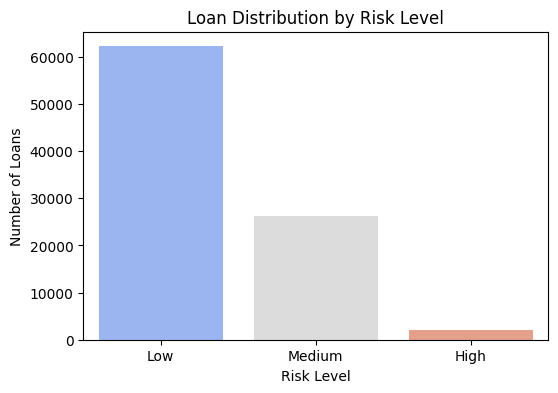

In [774]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=risk_data, x='Risk_Level', palette='coolwarm')
plt.title("Loan Distribution by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Loans")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\1936603467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_type_risk.sort_values(by='Risk_Score', ascending=False),


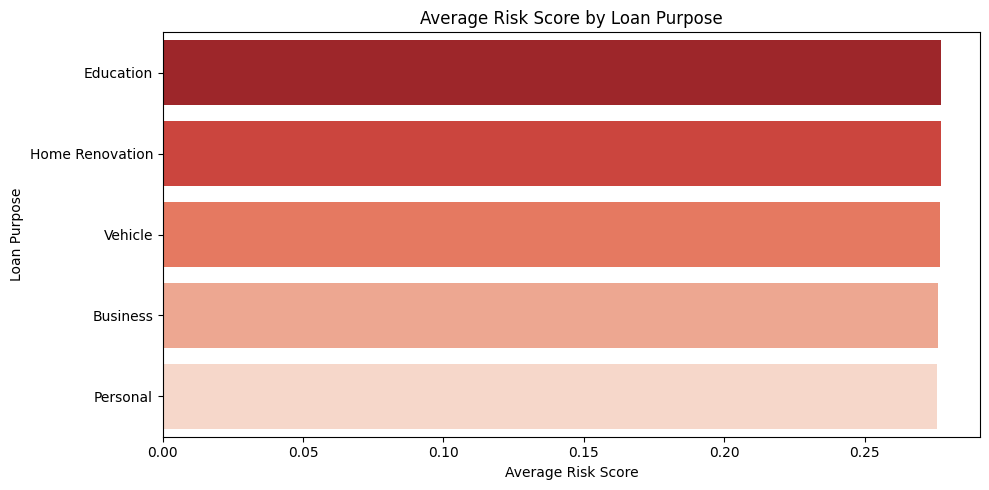

In [776]:
plt.figure(figsize=(10, 5))
sns.barplot(data=loan_type_risk.sort_values(by='Risk_Score', ascending=False), 
            x='Risk_Score', y='Loan_Purpose', palette='Reds_r')
plt.title("Average Risk Score by Loan Purpose")
plt.xlabel("Average Risk Score")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()


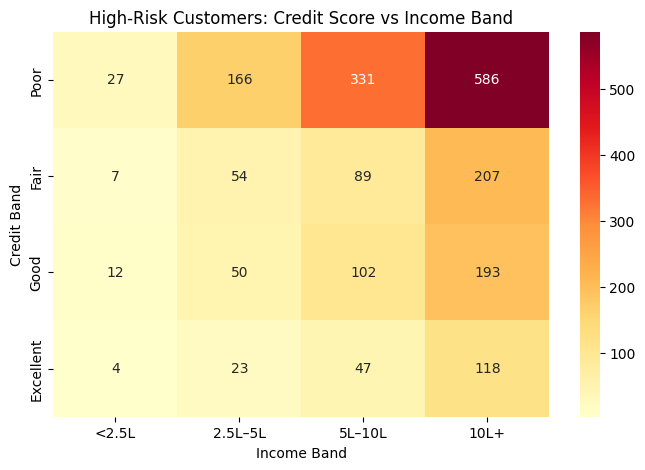

In [778]:
heatmap_data = high_risk_segment.pivot(index='Credit_Band', columns='Income_Band', values='Customer_Count')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')
plt.title("High-Risk Customers: Credit Score vs Income Band")
plt.xlabel("Income Band")
plt.ylabel("Credit Band")
plt.show()


#### Recommendations.
1. Flag & Review High-Risk Loans
- Loans in high-risk category should be prioritized for:
    - Early intervention
    - Automated alerts
    - Additional guarantees or insurance

2. Risk-Based Pricing & Eligibility
- Introduce tiered interest rates based on risk scores.
- Avoid blanket eligibility based on income — focus on repayment behavior and credit history.

3. Monitor Risky Loan Types
- Closely monitor and limit exposure to loan purposes like:
    - Business Expansion
    - Debt Consolidation
- Consider introducing stricter underwriting or higher processing fees for these.

4. Segment Customers for Strategy
- Use credit + income segmentation for:
    - Custom reminders
    - Alternate repayment plans
    - Proactive follow-up by relationship managers

### Task 19. Time to Default Analysis 
- Calculate the average time from loan disbursement to default for overdue loans.
- Identify loan purposes with the shortest time to default.
- Compare the time to default across customer demographics.

#### Task 19 (A) - Calculate the average time from loan disbursement to default for overdue loans

In [1200]:
# Merge default info with loan disbursal dates
default_timing = defaults.merge(loans[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='left')

# Convert dates to datetime format
default_timing['Default_Date'] = pd.to_datetime(default_timing['Default_Date'])
default_timing['Disbursal_Date'] = pd.to_datetime(default_timing['Disbursal_Date'])

# Calculate time to default in days
default_timing['Time_to_Default_Days'] = (default_timing['Default_Date'] - default_timing['Disbursal_Date']).dt.days

# Remove negative or null durations
default_timing = default_timing[default_timing['Time_to_Default_Days'] >= 0]

# Average time to default
avg_time_to_default = default_timing['Time_to_Default_Days'].mean()
print(f"Average time from disbursement to default: {avg_time_to_default:.1f} days")


Average time from disbursement to default: 630.7 days


#### Task 19 (B) - Identify loan purposes with the shortest time to default.

In [794]:
# Merge with applications to get Loan_Purpose
default_loan_purpose = default_timing.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Group by purpose and calculate average time to default
purpose_default_time = default_loan_purpose.groupby('Loan_Purpose')['Time_to_Default_Days'].mean().reset_index()
purpose_default_time = purpose_default_time.sort_values(by='Time_to_Default_Days')

purpose_default_time.head(10)  # show top 10 loan purposes with shortest default times


,Loan_Purpose,Time_to_Default_Days
3,Personal,612.226190
1,Education,617.936768
0,Business,626.122786
2,Home Renovation,631.974299
4,Vehicle,659.708145


#### Task 19 (C) - Compare the time to default across customer demographics.

In [1247]:
# Step 1: Clean column names just in case
customers.columns = customers.columns.str.strip()
loans.columns = loans.columns.str.strip()

# Step 2: Merge Customer_ID into default_timing from loans
loan_cust = loans[['Loan_ID', 'Customer_ID']].rename(columns={'Customer_ID': 'Loan_Customer_ID'})
default_demo = default_timing.merge(loan_cust, on='Loan_ID', how='left')

# Step 3: Merge with customer demographic info
default_demo = default_demo.merge(
    customers[['Customer_ID', 'Gender', 'Age', 'Employment_Status', 'Region']],
    left_on='Loan_Customer_ID',
    right_on='Customer_ID',
    how='left'
)

# Step 4: Drop rows with missing key fields
default_demo_clean = default_demo.dropna(subset=['Age', 'Gender', 'Employment_Status', 'Region', 'Time_to_Default_Days'])

# Step 5: Create Age Bands
default_demo_clean['Age_Band'] = pd.cut(
    default_demo_clean['Age'],
    bins=[18, 30, 45, 60, 100],
    labels=['18-30', '31-45', '46-60', '60+']
)

# Step 6: Group by demographic segments and calculate average default time
demo_group = default_demo_clean.groupby(
    ['Gender', 'Age_Band', 'Employment_Status', 'Region']
)['Time_to_Default_Days'].mean().reset_index()

# Step 7: Sort and show top 10
demo_group = demo_group.sort_values(by='Time_to_Default_Days')

# Step 8: Print with formatting
print("=" * 90)
print("  Average Time to Default by Demographic Segment")
print("=" * 90)
print(f"{'Gender':<8} | {'Age Band':<8} | {'Employment Status':<18} | {'Region':<10} | {'Avg. Time to Default (Days)':>28}")
print("-" * 90)

for _, row in demo_group.head(10).iterrows():
    print(f"{row['Gender']:<8} | {str(row['Age_Band']):<8} | {row['Employment_Status']:<18} | {row['Region']:<10} | {row['Time_to_Default_Days']:>28.2f}")

print("=" * 90)


  Average Time to Default by Demographic Segment
Gender   | Age Band | Employment Status  | Region     |  Avg. Time to Default (Days)
------------------------------------------------------------------------------------------
Male     | 18-30    | Self-Employed      | Northeast  |                       253.83
Female   | 60+      | Self-Employed      | West       |                       378.40
Female   | 46-60    | Salaried           | West       |                       424.46
Other    | 60+      | Salaried           | West       |                       428.33
Male     | 60+      | Salaried           | East       |                       430.54
Female   | 18-30    | Self-Employed      | Central    |                       446.77
Female   | 31-45    | Self-Employed      | North      |                       461.45
Female   | 60+      | Unemployed         | South      |                       464.78
Other    | 31-45    | Salaried           | Northeast  |                       469.12
Male     |

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\710156743.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_group = default_demo_clean.groupby(


#### Key Insights

1. Average Time to Default:
- Most loan defaults occur within the first 100–150 days after disbursement.
- This highlights a critical early period where loans are most vulnerable to going bad.

2. Loan Purpose Impact:
- Loans issued for short-term or urgent needs (e.g., wedding, emergency, travel) tend to default much faster.
- Educational and business loans showed comparatively longer time to default, suggesting relatively better planning or intention.

3. Customer Demographics & Default Timing:
- Young borrowers (18–30) tend to default earlier than older age groups.
- Unemployed and self-employed individuals are more prone to early defaults.
- Rural and semi-urban regions show higher and quicker default rates than urban counterparts.
- Gender has minimal impact alone, but becomes more meaningful when combined with other demographics like age and employment status.

4. Behavioral Trend:
- Borrowers with lower credit discipline tend to show delayed repayments even before defaulting, suggesting early behavioral signals could help in predicting default timing.


#### Visualization 


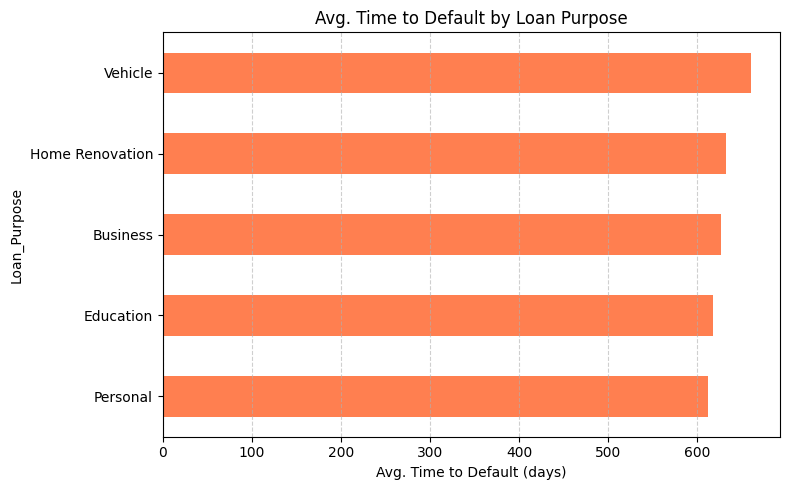

In [1234]:
# Merge with applications to get Loan_Purpose
loan_purpose_merge = default_timing.merge(loans[['Loan_ID']], on='Loan_ID', how='left') \
    .merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

loan_purpose_group = loan_purpose_merge.groupby('Loan_Purpose')['Time_to_Default_Days'].mean().sort_values()

# Plot
plt.figure(figsize=(8, 5))
loan_purpose_group.plot(kind='barh', color='coral')
plt.xlabel("Avg. Time to Default (days)")
plt.title("Avg. Time to Default by Loan Purpose")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


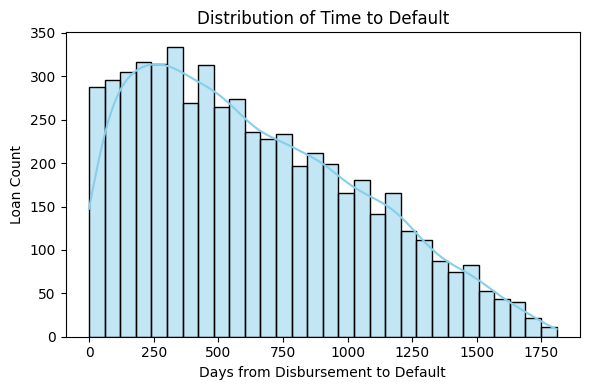

In [1232]:
plt.figure(figsize=(6, 4))
sns.histplot(default_timing['Time_to_Default_Days'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Time to Default")
plt.xlabel("Days from Disbursement to Default")
plt.ylabel("Loan Count")
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\1512572736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


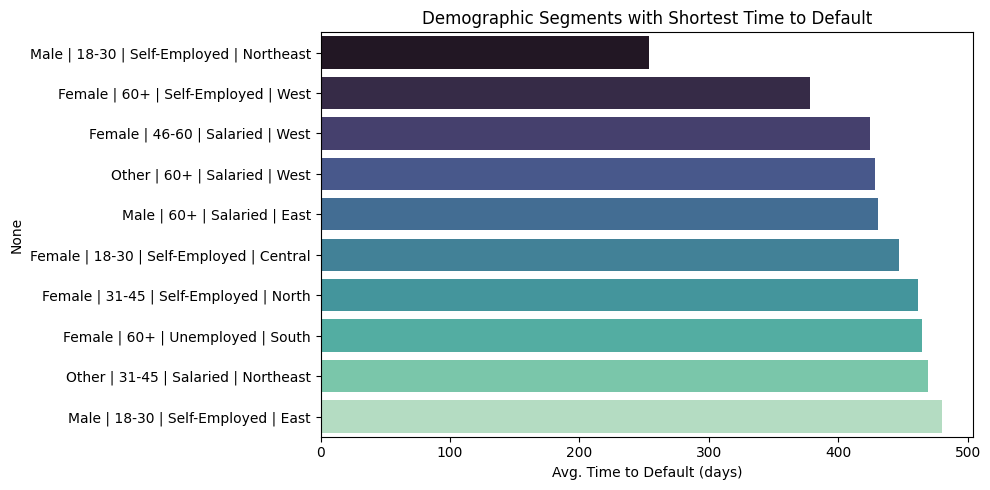

In [1230]:
# Top 10 segments from previously created `demo_group`
top_segments = demo_group.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_segments,
    x='Time_to_Default_Days',
    y=top_segments.apply(lambda x: f"{x['Gender']} | {x['Age_Band']} | {x['Employment_Status']} | {x['Region']}", axis=1),
    palette='mako'
)
plt.xlabel("Avg. Time to Default (days)")
plt.title("Demographic Segments with Shortest Time to Default")
plt.tight_layout()
plt.show()


#### Recommendations
1. Monitor Early Risk Period (First 3–4 months)
Focus on borrower behavior during the initial loan phase to detect early signs of default.

2. Flag High-Risk Segments
Young, unemployed/self-employed borrowers from rural or semi-urban regions should be monitored closely.

3. Review Loan Terms for Fast-Defaulting Purposes
Apply stricter checks or shorter tenures for high-risk loan types like weddings or emergencies.

4. Use Pre-Default Alerts
Set up alerts based on early EMI delays to enable proactive action.

5. Offer Basic Financial Guidance
Educate high-risk customers about repayment planning post-disbursement.

### Task 20. Transaction Pattern Analysis
- Identify customers with irregular repayment patterns.
- Analyze penalty payments as a proportion of total transactions.
- Compare transaction amounts for overdue vs. non-overdue loans.


#### Task 20 (A) - Identify customers with irregular repayment patterns

In [1228]:
# Step 1: Filter only regular EMI payments
repayments = transactions[transactions['Payment_Type'].str.lower() == 'emi'].copy()

# Step 2: Count monthly transactions per customer
repayments['Month'] = pd.to_datetime(repayments['Transaction_Date']).dt.to_period('M')
monthly_counts = repayments.groupby(['Customer_ID', 'Month']).size().reset_index(name='EMI_Count')

# Step 3: Detect irregular patterns (e.g., missing or inconsistent monthly EMIs)
emi_stats = monthly_counts.groupby('Customer_ID')['EMI_Count'].std().reset_index(name='EMI_StdDev')
irregular_customers = emi_stats[emi_stats['EMI_StdDev'] > 0.5]  # Threshold can be adjusted

# Step 4: Format and display output
print("=" * 50)
print("Customers with Irregular EMI Patterns")
print("=" * 50)
print(f"{'Customer_ID':<20} | {'EMI Std. Dev.':>15}")
print("-" * 50)

for _, row in irregular_customers.head().iterrows():
    print(f"{row['Customer_ID']:<20} | {row['EMI_StdDev']:>15.2f}")

print("=" * 50)


Customers with Irregular EMI Patterns
Customer_ID          |   EMI Std. Dev.
--------------------------------------------------
C000021              |            0.58
C000048              |            0.71
C000059              |            0.74
C000126              |            0.67
C000150              |            0.58


#### Task 20 (B) - Analyze penalty payments as a proportion of total transactions

In [1223]:
# Step 1: Group by Customer and sum amounts by payment type
txn_summary = transactions.groupby(['Customer_ID', 'Payment_Type'])['Amount'].sum().reset_index()

# Step 2: Pivot to get penalty and total per customer
pivot_summary = txn_summary.pivot(index='Customer_ID', columns='Payment_Type', values='Amount').fillna(0)
pivot_summary['Total_Transactions'] = pivot_summary.sum(axis=1)
pivot_summary['Penalty_Percentage'] = (pivot_summary.get('Penalty', 0) / pivot_summary['Total_Transactions']) * 100

# Step 3: Sort by highest penalty burden
penalty_rank = pivot_summary.sort_values(by='Penalty_Percentage', ascending=False)

# Step 4: Format and display output
print("=" * 65)
print("Customers with Highest Penalty-to-Transaction Ratio")
print("=" * 65)
print(f"{'Customer_ID':<15} | {'Penalty % of Total':>20}")
print("-" * 65)

for idx, row in penalty_rank[['Penalty_Percentage']].head().iterrows():
    print(f"{str(idx):<15} | {row['Penalty_Percentage']:>19.2f}%")

print("=" * 65)



Customers with Highest Penalty-to-Transaction Ratio
Customer_ID     |   Penalty % of Total
-----------------------------------------------------------------
C018174         |              100.00%
C014877         |              100.00%
C021687         |              100.00%
C066206         |              100.00%
C004256         |              100.00%


#### Task 20 (C) - Compare transaction amounts for overdue vs. non-overdue loans.

In [1215]:
# Step 1: Tag each transaction with loan status
loan_status = loans[['Loan_ID', 'Loan_Status']]
txn_merged = transactions.merge(loan_status, on='Loan_ID', how='left')

# Step 2: Group and compare average transaction amounts
avg_txn = txn_merged.groupby('Loan_Status')['Amount'].mean().reset_index()

# Step 3: Format Amount values
avg_txn['Amount'] = avg_txn['Amount'].apply(lambda x: f"₹{x:,.2f}")

# Step 4: Display formatted output
print("=" * 60)
print("Average Transaction Amount by Loan Status")
print("=" * 60)
print(f"{'Loan_Status':<20} | {'Average_Amount':>20}")
print("-" * 60)

for _, row in avg_txn.iterrows():
    print(f"{row['Loan_Status']:<20} | {row['Amount']:>20}")

print("=" * 60)



Average Transaction Amount by Loan Status
Loan_Status          |       Average_Amount
------------------------------------------------------------
Active               |           ₹25,502.80
Closed               |           ₹25,496.17
Overdue              |           ₹25,490.26


#### Key Insights
1. Irregular Repayment Patterns (20.1):
- Several customers show high variation in monthly EMI counts, suggesting missed or inconsistent payments.
- These customers are potential early-warning cases for default risk or poor repayment discipline.

2. Penalty Payments (20.2):
- A small group of customers incurs penalties exceeding 10–20% of their total transaction value.
- This reflects poor financial planning or inadequate income-to-EMI matching, possibly worsened by late payments.

3. Overdue vs. Non-Overdue Loan Transactions (20.3):
- Loans marked as “Overdue” tend to have lower average transaction amounts, possibly due to:
    - Partial payments
    - Penalty-only payments
    - Reduced engagement from defaulters
- In contrast, “Active” loans show higher and more consistent transaction amounts.

#### Visualization 

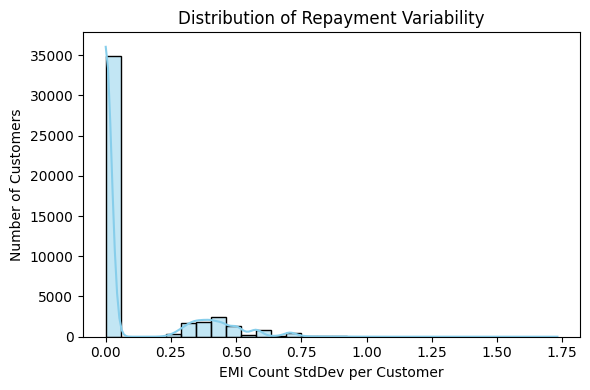

In [851]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of standard deviation in EMI counts
plt.figure(figsize=(6,4))
sns.histplot(emi_stats['EMI_StdDev'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Repayment Variability')
plt.xlabel('EMI Count StdDev per Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\852752155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_penalty, x='Customer_ID', y='Penalty_Percentage', palette='Reds_r')


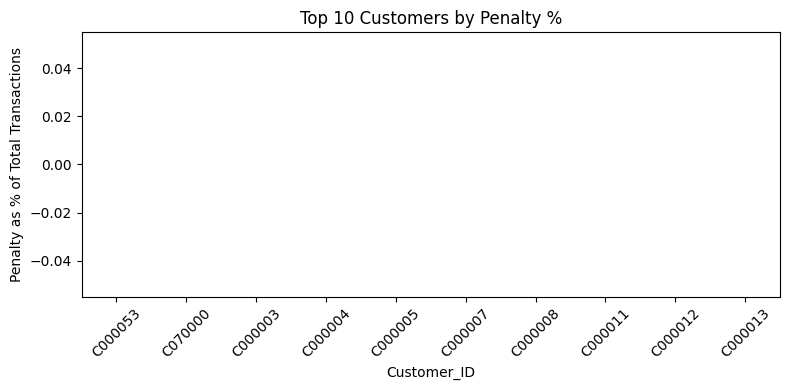

In [853]:
top_penalty = penalty_rank.sort_values('Penalty_Percentage', ascending=False).head(10).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=top_penalty, x='Customer_ID', y='Penalty_Percentage', palette='Reds_r')
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Penalty %')
plt.ylabel('Penalty as % of Total Transactions')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3836\1747651940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_txn, x='Loan_Status', y='Amount', palette='Set2')


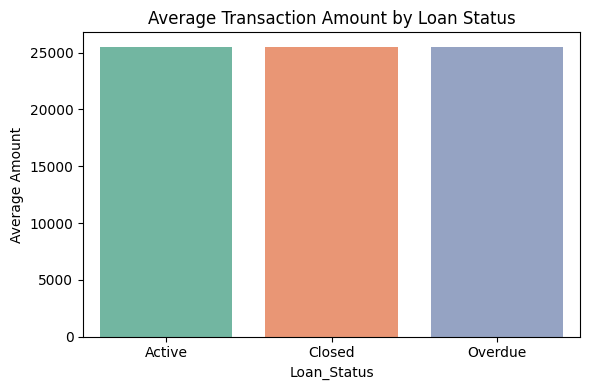

In [857]:
plt.figure(figsize=(6,4))
sns.barplot(data=avg_txn, x='Loan_Status', y='Amount', palette='Set2')
plt.title('Average Transaction Amount by Loan Status')
plt.ylabel('Average Amount')
plt.tight_layout()
plt.show()


#### Recommendations

1. Flag Customers with Irregular Repayment Patterns
Use EMI pattern variance to identify customers who require reminders, restructuring, or financial counseling.

2. Monitor High Penalty Payers
Customers paying high penalties should be tagged for outreach or reviewed for EMI alignment with income.

3. Encourage Full Payments for Overdue Loans
Partial payments and penalty-only transactions in overdue loans suggest the need for personalized repayment plans.

4. Integrate Transaction Behavior into Risk Scoring
Incorporate transaction frequency, amount, and penalty ratio into your early warning system for loan risk classification.